In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive"

/content/drive/My Drive


In [ ]:
import numpy as np
import matplotlib.pyplot as mplot
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib as mpl
import pandas as pd
import seaborn as sns #Need to install
import scipy.stats as stats
import pylab
import warnings
import math
import keras
from sklearn.linear_model import LinearRegression
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)



Cotton(lint)


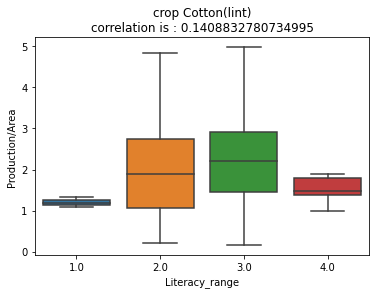

Cashewnut


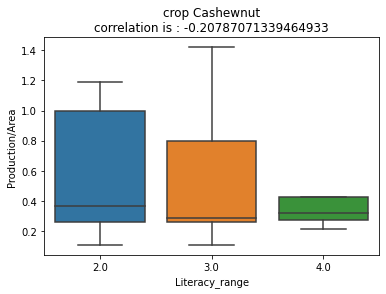

Potato


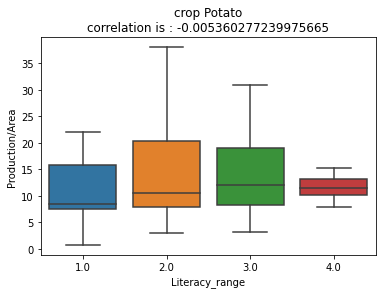

Niger seed


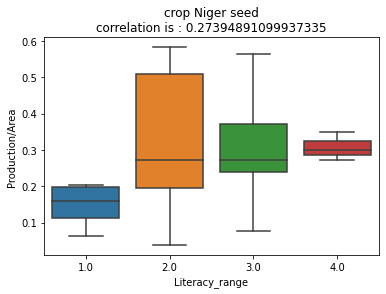

Wheat


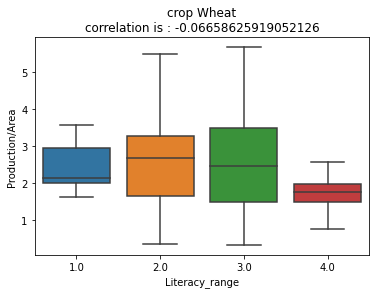

Brinjal


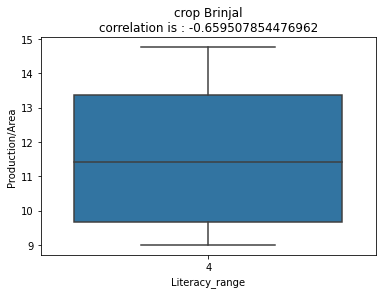

Small millets


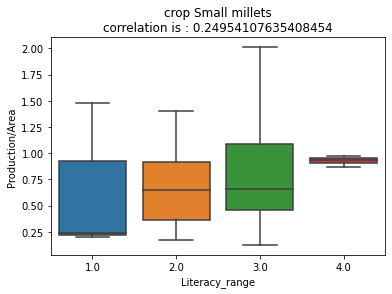

Turmeric


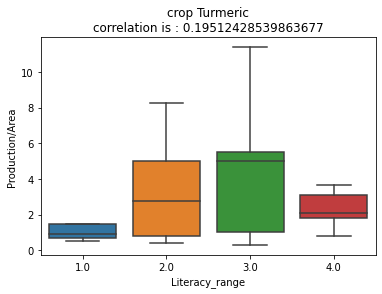

Sannhamp


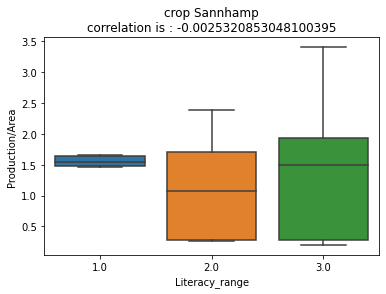

Mango


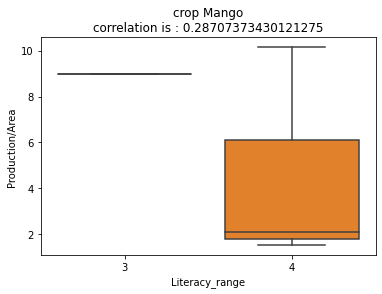

Urad


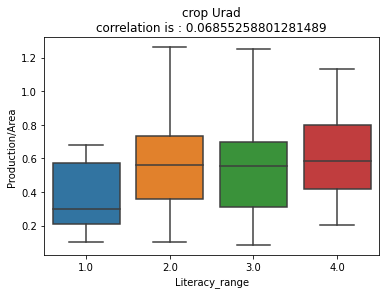

Peas & beans (Pulses)


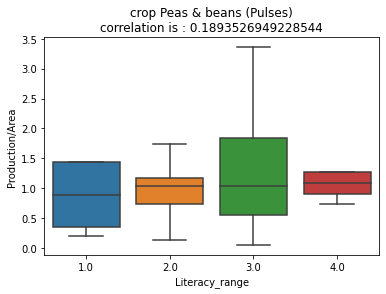

Cardamom


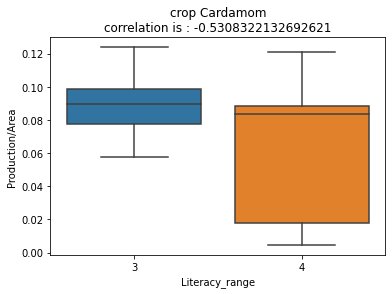

Masoor


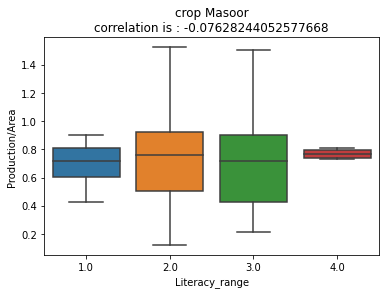

Dry chillies


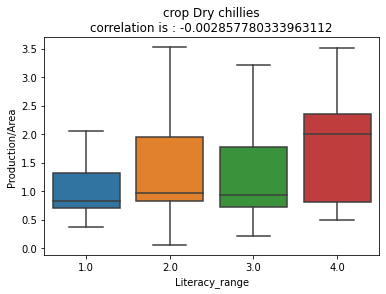

Banana


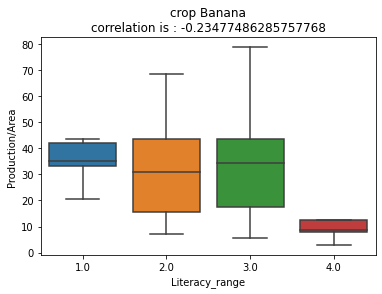

Sunflower


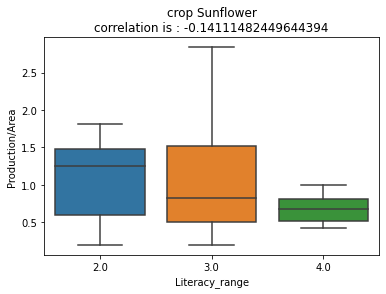

other oilseeds


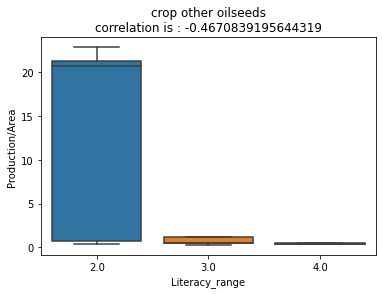

Groundnut


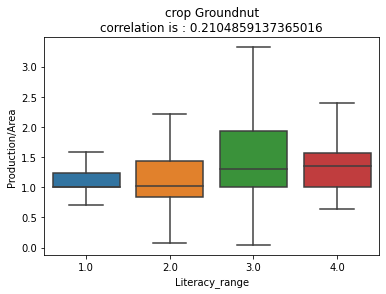

Arecanut


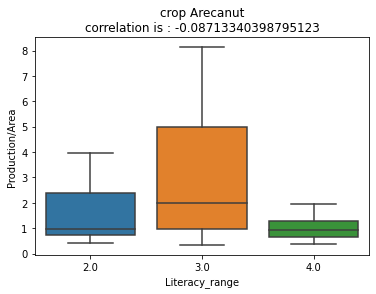

Jute


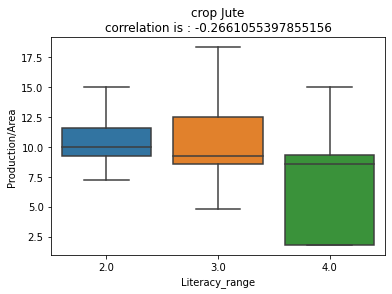

Rapeseed &Mustard


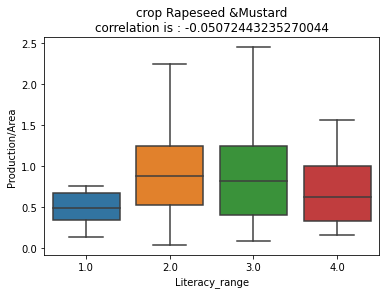

Linseed


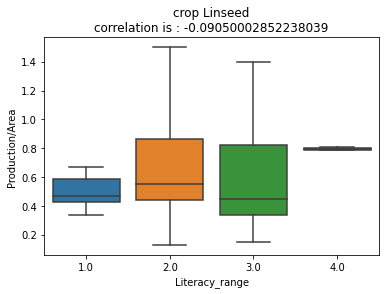

Coconut 


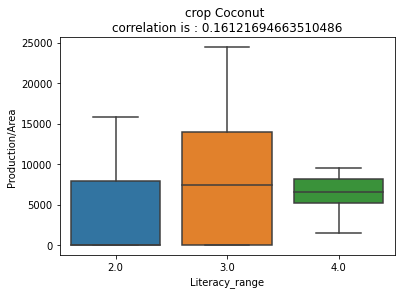

Bajra


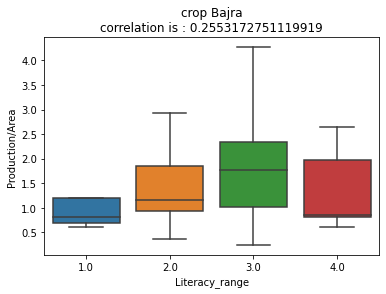

Paddy


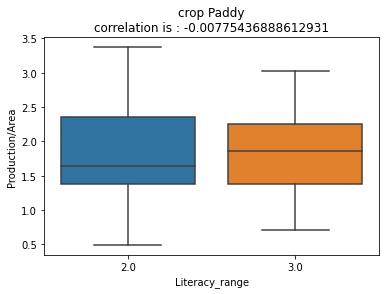

Ragi


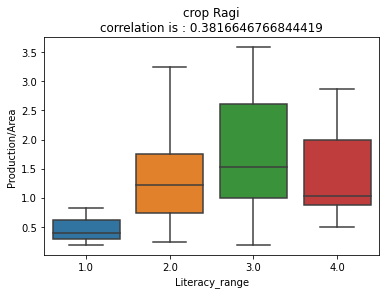

Guar seed


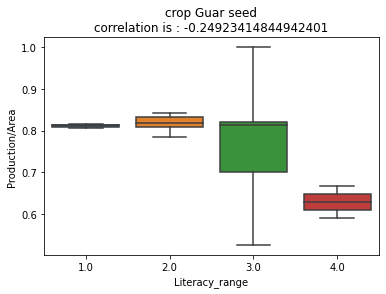

Jowar


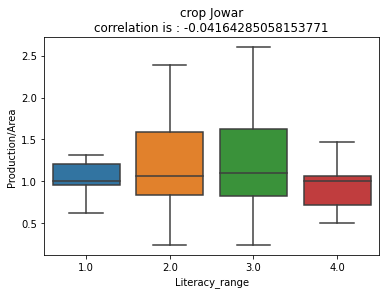

Rice


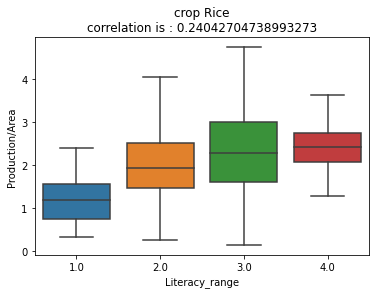

Black pepper


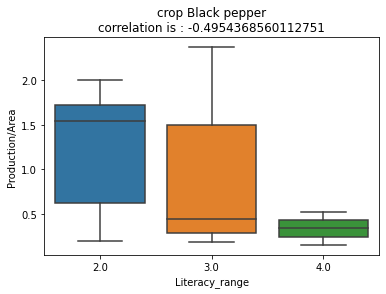

Oilseeds total


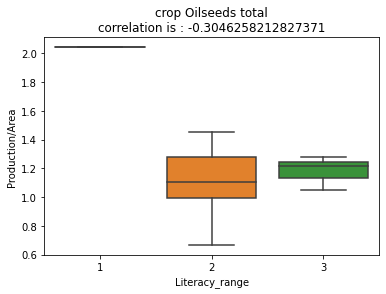

Dry ginger


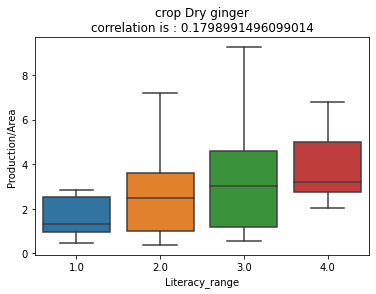

Maize


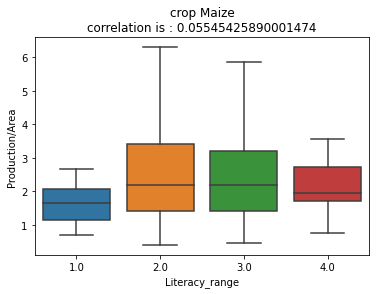

Sugarcane


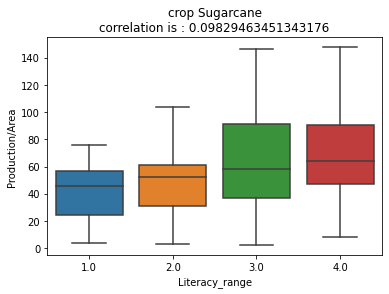

Horse-gram


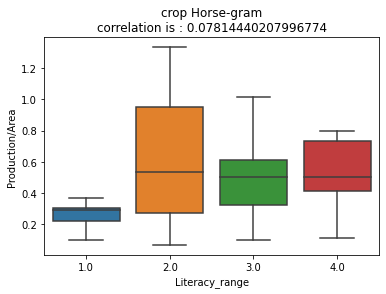

Other  Rabi pulses


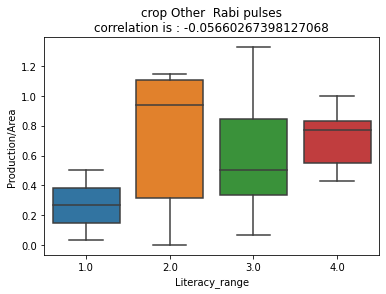

Sesamum


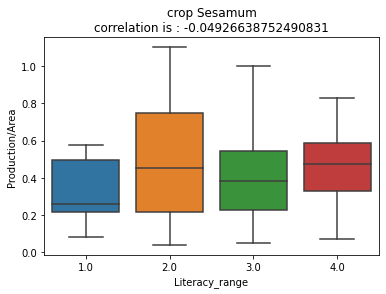

Garlic


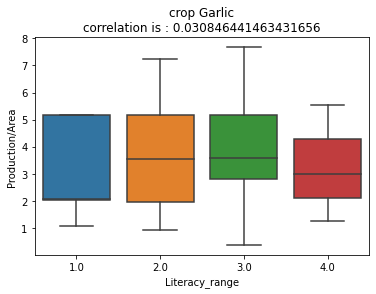

Blackgram


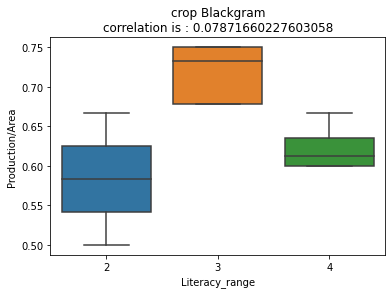

Moong(Green Gram)


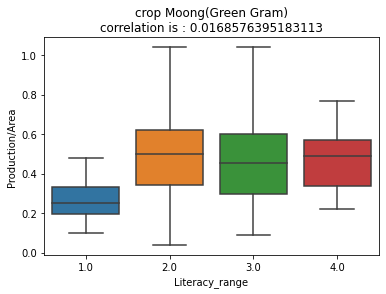

Tapioca


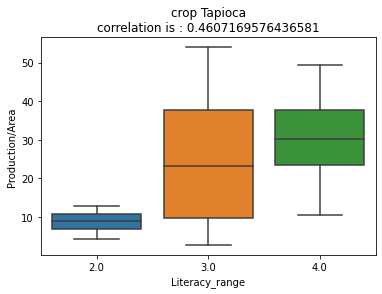

Tobacco


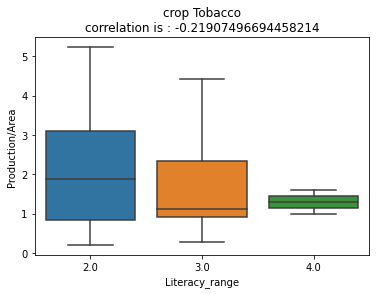

Safflower


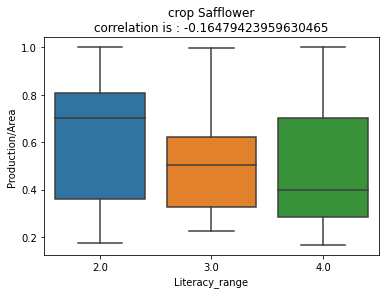

Orange


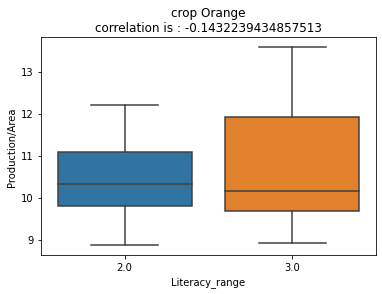

Papaya


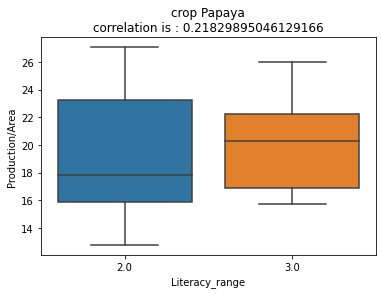

Barley


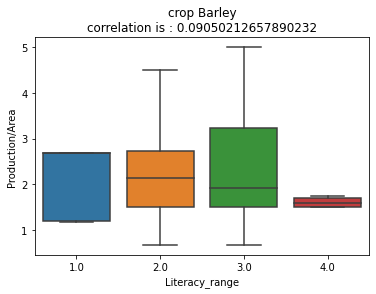

Onion


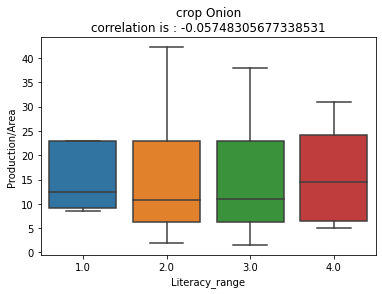

Castor seed


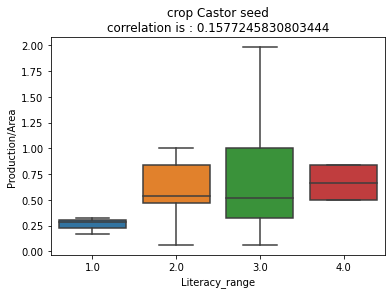

Coriander


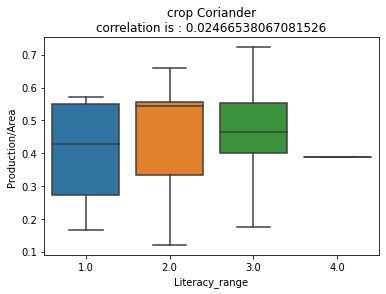

Moth


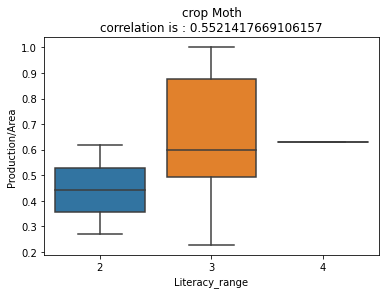

Cowpea(Lobia)


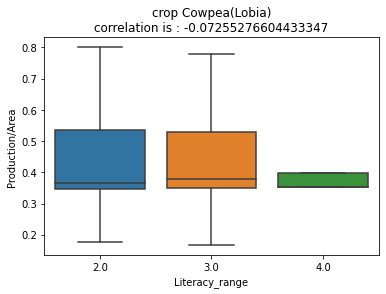

Gram


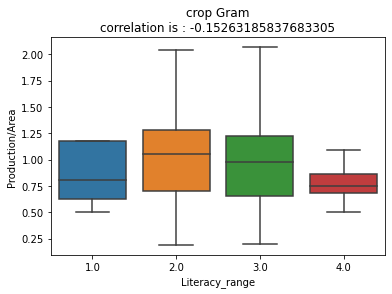

Mesta


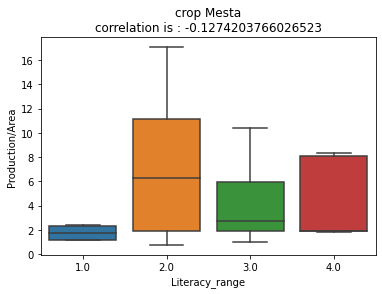

Other Kharif pulses


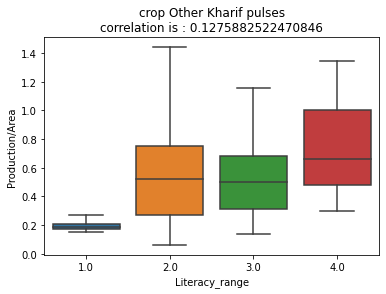

Soyabean


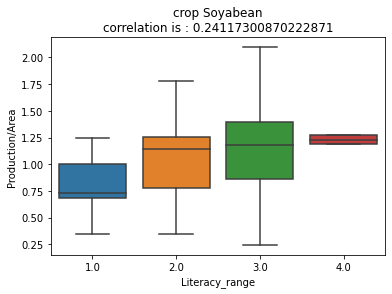

Pineapple


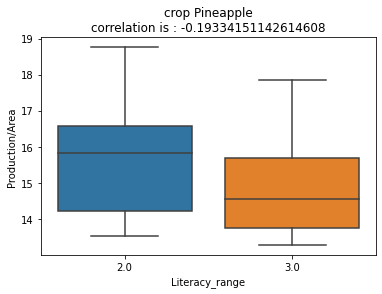

Sweet potato


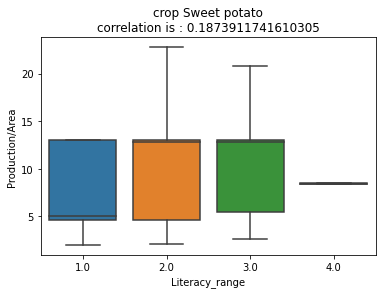

Arhar/Tur


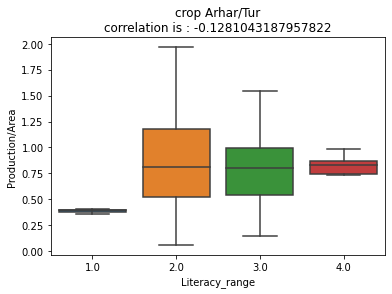

Other Cereals & Millets


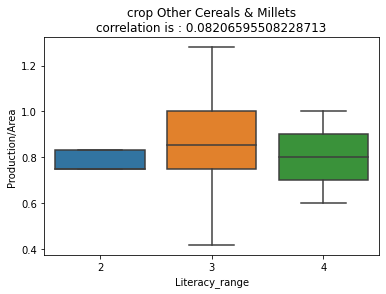

Khesari


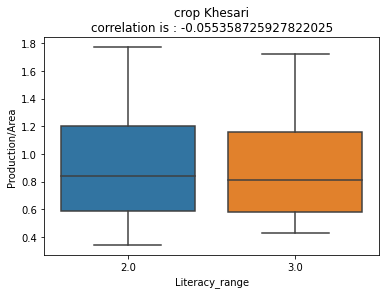

Ginger


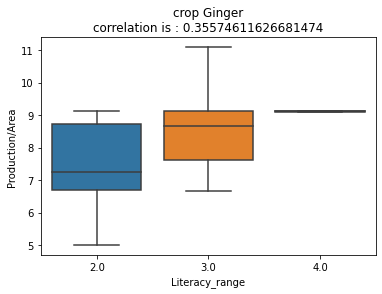

{'Cotton(lint)': 0.1408832780734995, 'Cashewnut': -0.20787071339464933, 'Potato': -0.005360277239975665, 'Niger seed': 0.27394891099937335, 'Wheat': -0.06658625919052126, 'Brinjal': -0.659507854476962, 'Small millets': 0.24954107635408454, 'Turmeric': 0.19512428539863677, 'Sannhamp': -0.0025320853048100395, 'Mango': 0.28707373430121275, 'Urad': 0.06855258801281489, 'Peas & beans (Pulses)': 0.1893526949228544, 'Cardamom': -0.5308322132692621, 'Masoor': -0.07628244052577668, 'Dry chillies': -0.002857780333963112, 'Banana': -0.23477486285757768, 'Sunflower': -0.14111482449644394, 'other oilseeds': -0.4670839195644319, 'Groundnut': 0.2104859137365016, 'Arecanut': -0.08713340398795123, 'Jute': -0.2661055397855156, 'Rapeseed &Mustard': -0.05072443235270044, 'Linseed': -0.09050002852238039, 'Coconut ': 0.16121694663510486, 'Bajra': 0.2553172751119919, 'Paddy': -0.00775436888612931, 'Ragi': 0.3816646766844419, 'Guar seed': -0.24923414844942401, 'Jowar': -0.04164285058153771, 'Rice': 0.24042704

In [ ]:
literacy_df = {}
with open("Dataset/literacy.txt") as f:
    for line in f:
        x = line[:-1].split("\t")
        if len(x)==7:
            literacy_df[(x[1],x[2])] = x[-1]

crop_prod = pd.read_csv("Dataset/apy.csv",delimiter = ',')
crop_prod = crop_prod[['District_Name','State_Name','Crop','Crop_Year','Production','Area']]
crop_prod['Production/Area'] = crop_prod.apply(lambda row: row['Production']/row['Area'] if row['Production']==row['Production'] and row['Area']!=0 and row['Area']==row['Area'] else np.nan,axis=1)
# print(crop_prod[crop_prod['Production'].isnull() | crop_prod['Area'].isnull() | (crop_prod['Area']==0)])

crop_districts = set(crop_prod['District_Name'].tolist())
crop_states = set(crop_prod['State_Name'].tolist())

literacy_districts = set([x[0] for x in literacy_df.keys()])
literacy_states = set([x[1] for x in literacy_df.keys()])

def editDistDP(str1, str2, m, n):
    dp = [[0 for x in range(n + 1)] for x in range(m + 1)]
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                dp[i][j] = j    
            elif j == 0:
                dp[i][j] = i    
            elif str1[i-1] == str2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1+min(dp[i][j-1],dp[i-1][j],dp[i-1][j-1])    
 
    return dp[m][n]

crop_lit_state = {}
crop_lit_district = {}
for st1 in crop_states:
    mn = 3
    mn_state = ""
    for st2 in literacy_states:
        if st1.lower()==st2.lower():
            crop_lit_state[st1] = st2
        else:
            x = editDistDP(st1.lower(),st2.lower(),len(st1),len(st2))
            if x<=mn:
                mn = x 
                crop_lit_state[st1]=st2
crop_lit_state['Madhya Pradesh'] = 'Madhya Pradesh' 

for st1 in crop_districts:
    mn = 3
    mn_state = ""
    for st2 in literacy_districts:
        if st1.lower()==st2.lower():
            crop_lit_district[st1] = st2
            break
        else:
            x = editDistDP(st1.lower(),st2.lower(),len(st1),len(st2))
            if x<=mn:
                mn = x 
                crop_lit_district[st1]=st2

# print(crop_lit_district)
# print(len(crop_lit_district))
# print(set(crop_districts)-set(crop_lit_district.keys()))
# print(set(literacy_districts)-set(crop_lit_district.values()))

'''
BEMETARA': 'Jamtara
KONDAGAON': 'Bongaigaon
KHANDWA': 'Bhandara'
AMETHI': 'Amreli
'AMROHA': 'Amreli'
'SHAMLI': 'Shimla'
'PALGHAR': 'Sagar'
'MUMBAI': 'Samba'
SAMBHAL': 'Samba
HAPUR': 'Rampur'
'KASGANJ': 'Kannauj'
'NORTH GARO HILLS': 'South Garo Hills'
'HOWRAH': 'Haora'
'BALOD': 'Jalor'
'KADAPA': 'Nawada'
'KHOWAI': 'Kota
'GOMATI': 'Mohali'
'LONGDING': 'Longleng'
'HATHRAS': 'Chatra'
'DANG': 'Durg'
'GARIYABAND': 'Faridabad'
'''
hard_map = {'SPSR NELLORE' : 'Sri Potti Sriramulu Nellore', '24 PARAGANAS SOUTH':'South Twenty Four Parganas','24 PARAGANAS NORTH' : 'North Twenty Four Parganas'
,'BENGALURU URBAN' : 'Bangalore','HOOGHLY' : 'Hugli','DANG':'The Dangs'}
multi_hard_map = {'Mumbai' : ['Mumbai City','Mumbai Suburban']}
unmapped = ['GARIYABAND','HATHRAS','LONGDING','GOMATI','KHOWAI','KADAPA','BALOD','HOWRAH','NORTH GARO HILLS','KASGANJ','HAPUR','SAMBHAL','PALGHAR','SHAMLI','AMROHA','AMETHI','KHANDWA','BEMETARA','KONDAGAON']

for i in unmapped:
    del crop_lit_district[i]

for k,v in hard_map.items():
    crop_lit_district[k] = v

for k,v in multi_hard_map.items():
    crop_lit_district[k] = v



# print(crop_prod[crop_prod['Production/Area']>1000])

# print(crop_prod['Production/Area'].corr(crop_prod['Literacy']))
# crop_prod.to_csv('crop_production_lit.csv')
def func(row):
    if row['Literacy'] > 85:
        return 4
    elif row['Literacy']>70:
        return 3
    elif row['Literacy']>50:
        return 2
    elif row['Literacy']>0:
        return 1
crops = set(crop_prod['Crop'].tolist())
crop_corr = {}
for crop in crops:
    # print(crop)
    try:
        crop1_prod = crop_prod[crop_prod['Crop']==crop].reset_index(drop=True)
        crop1_prod = crop1_prod[crop1_prod['Crop_Year']==2011].reset_index(drop=True)
        crop1_prod['Literacy'] = crop1_prod.apply(lambda row : float(literacy_df[(crop_lit_district[row['District_Name']],crop_lit_state[row['State_Name']])]) if row['District_Name'] in crop_lit_district and row['State_Name'] in crop_lit_state and (crop_lit_district[row['District_Name']],crop_lit_state[row['State_Name']]) in literacy_df else np.nan,axis=1)
        crop1_prod['Literacy_range'] = crop1_prod.apply(lambda row : func(row),axis=1)
        crop1_prod = crop1_prod[(~crop1_prod['Production'].isnull()) & (~crop1_prod['Literacy'].isnull())] 
        crop_corr[crop] = crop1_prod['Production/Area'].corr(crop1_prod['Literacy'])

        
        # if crop_corr[crop]>0.2 or crop_corr[crop]<-0.2:
        print(crop)
        sns.boxplot(x="Literacy_range", y="Production/Area", data=crop1_prod,showfliers=False)
        plt.title("crop "+crop+"\ncorrelation is : "+str(crop_corr[crop])) 
        plt.show()
            # plt.plot(crop1_prod['Production/Area'],crop1_prod['Literacy'],'ro')
            
            # plt.show()
    except:
        continue
        # print(crop)
    # plt.plot(crop1_prod['Production/Area'],crop1_prod['Literacy'],'ro')
    # plt.show()

print(crop_corr)

**Merging dataset of production,temperature, rainfall**

In [ ]:

def get_rain_category(x,min1,max1,category_max = 5):
	diff = float(max1-min1)/category_max
	if x==x:
		return int(float(x-min1)/diff+1)
	else:
		return np.NaN

crop_prod = pd.read_csv("Dataset/apy.csv",delimiter = ',')

major_crops = ['Arhar/Tur','Bajra','Barley','Cotton(lint)','Gram','Groundnut','Jowar','Jute','Maize','Moong','Niger seed','Ragi','Rice','Safflower','Sesamum','Soyabean','Sugarcane','Sunflower','Urad','Wheat']

# crop_prod = crop_prod[crop_prod["Crop"]=="Rice"]
# crop_prod["production/Area"] = crop_prod.apply(lambda row : row["Production"]/row["Area"]*100 if row["Area"]!=0 else np.NaN,axis=1)
# crop_prod = crop_prod.drop(columns = ['Production'],axis=0)
# min1 = crop_prod["production/Area"].min()
# max1 = crop_prod["production/Area"].max()
# crop_prod["prod_category"] = crop_prod.apply(lambda row : get_prod_category(row["production/Area"],min1,max1,100),axis=1)
# print(crop_prod)

rainfall = pd.read_csv("Dataset/rainfall/rainfall1.csv")
rainfall = rainfall[['STATES','YEAR','ANNUAL']].reset_index(drop=True)
rainfall_dict = {}
for i in range(rainfall.shape[0]):
	rainfall_dict[(rainfall.loc[i,'STATES'],rainfall.loc[i,'YEAR'])] = rainfall.loc[i,'ANNUAL']

temperature = pd.read_csv("Dataset/Mean_Temp.csv")
temperature = temperature[['YEAR','ANNUAL']].reset_index(drop=True)
print(temperature.columns)
temperature_dict = {}

for i in range(temperature.shape[0]):
	temperature_dict[temperature.loc[i,'YEAR']] = temperature.loc[i,'ANNUAL']


def editDistDP(str1, str2, m, n):
    dp = [[0 for x in range(n + 1)] for x in range(m + 1)]
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                dp[i][j] = j    
            elif j == 0:
                dp[i][j] = i    
            elif str1[i-1] == str2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1+min(dp[i][j-1],dp[i-1][j],dp[i-1][j-1])    
 
    return dp[m][n]
 

crop_states = set(crop_prod['State_Name'].tolist())
rainfall_states = set(rainfall['STATES'].tolist())
# map_rainfall_crop = {}
map_crop_rainfall = {}
map_rainfall_crop = {}
for i in crop_states:
	mn = 3
	mn_state = ""
	for j in rainfall_states:
		if i.lower()==j.lower():
			map_crop_rainfall[i] = j
		else:
			x = editDistDP(i.lower(),j.lower(),len(i),len(j))
			if x<=mn:
				mn = x 
				map_crop_rainfall[i]=j





map_crop_rainfall['Madhya Pradesh'] = 'MADHYA PRADESH' 
map_crop_rainfall['Jammu and Kashmir '] = 'JAMMU & KASHMIR'
# map_rainfall_crop['LAKSHADWEEP'] = 
print(map_crop_rainfall)
print(len(list(map_crop_rainfall.keys())))
print(set(rainfall_states)-set(list(map_crop_rainfall.values())))
print(set(crop_states)-set(list(map_crop_rainfall.keys())))
print(crop_states)




merged_csv = crop_prod
merged_csv = merged_csv[(~merged_csv['State_Name'].isin(set(crop_states)-set(list(map_crop_rainfall.keys())))) & (merged_csv['Crop_Year']>=2000)].reset_index(drop=True)
# rainfall = rainfall[~rainfall['STATES'].isin(set(rainfall_states)-set(list(map_rainfall_crop.keys())))]
merged_csv['rainfall'] = merged_csv.apply(lambda row: rainfall_dict[(map_crop_rainfall[row['State_Name']],row['Crop_Year'])],axis=1)
merged_csv['temperature'] = merged_csv.apply(lambda row: temperature_dict[row['Crop_Year']],axis=1)

# merged_csv = pd.concat([crop_prod,rainfall.rename(columns={'STATES':'State_Name','ANNUAL':'rainfall'})],axis=1,join='')
# merged_csv = pd.concat([merged_csv,temperature.rename(columns = {'YEAR' : 'Crop_Year','ANNUAL':'temperature'})], axis=1, join='')
# merged_csv = merged_csv.loc[:, ~merged_csv.columns.duplicated()]
# print(merged_csv.shape)



merged_csv = merged_csv[~merged_csv['Production'].isna()].reset_index(drop=True)





# enc = OneHotEncoder(handle_unknown='ignore')
# enc_df = pd.DataFrame(enc.fit_transform(X[['Season']]).toarray())
# X = X.join(enc_df)


# # print(dum_df.shape)
# # y = y.fillna(0)
# # X = X.join(dum_df)
# # print(dum_df.shape[1])
# print(crop_prod.shape)
# print(merged_csv.shape)
# print(list(X_train.columns))
# # print(dum_df.shape)
# # print(y.head())
# print(merged_csv.columns)



# for i in range(len(y_pred)):
# 	print(y_pred[i],y_test[i])


# crop_prod = crop_prod[(crop_prod['Crop']=='Rice')].reset_index(drop=True)
# districts = set(crop_prod['District_Name'].tolist())
# for district in districts:
#     df = crop_prod[(crop_prod['District_Name']==district)]
#     if df.shape[0]!=0:
#         plt.plot(df['Crop_Year'],df['Production'],'ro')
#         plt.show()
merged_csv.shape

Index(['YEAR', 'ANNUAL'], dtype='object')
{'Kerala': 'KERALA', 'West Bengal': 'WEST BENGAL', 'Madhya Pradesh': 'MADHYA PRADESH', 'Tamil Nadu': 'TAMIL NADU', 'Karnataka': 'KARNATAKA', 'Gujarat': 'GUJARAT', 'Andaman and Nicobar Islands': 'ANDAMAN & NICOBAR ISLANDS', 'Arunachal Pradesh': 'ARUNACHAL PRADESH', 'Uttarakhand': 'UTTARAKHAND', 'Bihar': 'BIHAR', 'Rajasthan': 'RAJASTHAN', 'Uttar Pradesh': 'UTTAR PRADESH', 'Himachal Pradesh': 'HIMACHAL PRADESH', 'Telangana ': 'TELANGANA', 'Jharkhand': 'JHARKHAND', 'Odisha': 'ORISSA', 'Maharashtra': 'MAHARASHTRA', 'Goa': 'GOA', 'Haryana': 'HARYANA', 'Andhra Pradesh': 'ANDHRA PRADESH', 'Punjab': 'PUNJAB', 'Chhattisgarh': 'CHHATTISGARH', 'Meghalaya': 'MEGHALAYA', 'Tripura': 'TRIPURA', 'Jammu and Kashmir ': 'JAMMU & KASHMIR'}
25
{'LAKSHADWEEP'}
{'Puducherry', 'Assam', 'Manipur', 'Dadra and Nagar Haveli', 'Mizoram', 'Nagaland', 'Sikkim', 'Chandigarh'}
{'Kerala', 'West Bengal', 'Madhya Pradesh', 'Tamil Nadu', 'Dadra and Nagar Haveli', 'Karnataka', 'Guja

(189720, 9)

In [ ]:
rainfall = pd.read_csv("Dataset/rainfall/district wise rainfall normal.csv")
rainfall_dict = {}
cols = list(rainfall.columns)
cols.remove('STATE_UT_NAME')
cols.remove('DISTRICT')
l= [cols.remove(x) for x in ['ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']]
print(cols)
for i in range(rainfall.shape[0]):
  st = rainfall.loc[i,"DISTRICT"]
  rainfall_dict[st] = rainfall.loc[i,"ANNUAL"]

crop_prod = pd.read_csv("Dataset/apy.csv",delimiter=',')
print(rainfall[['DISTRICT','ANNUAL']].sort_values(by='ANNUAL'))
print(rainfall_dict)


['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
          DISTRICT  ANNUAL
353   LADAKH (LEH)    94.6
374      JAISALMER   181.2
359         KARGIL   223.3
373  SRI GANGANAGA   252.9
370         BARMER   268.6
..             ...     ...
598          UDUPI  4306.0
12     UPPER SIANG  4402.1
46   EAST KHASI HI  6166.1
47   JAINTIA HILLS  6379.9
55      TAMENGLONG  7229.3

[641 rows x 2 columns]
{'NICOBAR': 2805.2, 'SOUTH ANDAMAN': 3015.7, 'N & M ANDAMAN': 2913.3, 'LOHIT': 3043.8, 'EAST SIANG': 4034.7, 'SUBANSIRI F.D': 1300.4, 'TIRAP': 3571.5, 'ANJAW (LOHIT)': 3043.8, 'LOWER DIBANG': 2553.3, 'CHANGLANG': 3543.9, 'PAPUM PARE': 3378.2, 'LOW SUBANSIRI': 1921.1, 'UPPER SIANG': 4402.1, 'WEST SIANG': 2440.7, 'DIBANG VALLEY': 2553.3, 'WEST KAMENG': 3399.4, 'EAST KAMENG': 2030.9, 'TAWANG(W KAME': 3399.4, 'KURUNG KUMEY': 2221.5, 'CACHAR': 2999.2, 'DARRANG': 1957.8, 'GOALPARA': 2575.3, 'KAMRUP': 1813.4, 'LAKHIMPUR': 2859.3, 'NORTH CACHAR': 1977.5, 'NAGAON': 1660

In [ ]:
district1 = set(crop_prod["District_Name"].tolist())
district2 = set(rainfall['DISTRICT'].tolist())
map_rainfall_crop = {}
map_district_rainfall = {}
for i in district1:
  mn = 3
  mn_state = ""
  for j in district2:
    if i.lower()==j.lower():
      map_district_rainfall[i] = j
      break
    else:
      x = editDistDP(i.lower(),j.lower(),len(i),len(j))
      if x<=mn:
        mn = x 
        map_district_rainfall[i]=j



d = {'BID':'BEED',
'GANGANAGAR':'SRI GANGANAGA',
'HAORA':'HOWRAH',
'HUGLI' : 'HOOGHLY',
'KHERI' : 'KHERI LAKHIMP',
 'TIRUCHCHIRAPPALLI':'TIRUCHIRAPPAL',
 'TIRUNELVELI-KATTABO':'TIRUNELVELI',
 'SINGHBHUM':'WEST SINGHBHUM',
 'KACHCHH':'KUTCH',
 'VADODARA':'BARODA',
 'THE-DANGS':'DANGS',
 'KENDUJHAR':'KEONDJHARGARH',
 'PHULABANI':'KANDHAMAL/PHU',
 'KOCH-BIHAR':'COOCH BEHAR',
 'BARDDHAMAN':'BURDWAN'}



for dist in d.keys():
  map_district_rainfall[dist]=d[dist]

for k,v in map_district_rainfall.items():
	map_rainfall_crop[v] = k

multi_d = {'CHAMPARAN':['EAST CHAMPARAN','WEST CHAMPARAN'],
'KANPUR' : ['KANPUR NAGAR','KANPUR DEHAT'],
'MEDINIPUR':['EAST MIDNAPOR','WEST MIDNAPOR']
,'BANGLORE' : ['BANGALORE RUR','BANGALORE URB']
,'MUMBAI' : ['MUMBAI CITY','MUMBAI SUB']
}
dels = set(['KASGANJ','NUAPADA','RAMBAN','AMETHI','SHAMLI','SAMBHAL','NAVSARI','DHEMAJI','BOUDH','DOHAD','KHOWAI','MUMBAI','PATAN','SUKMA','KADAPA','SONIPAT','KONDAGAON','ANJAW','GANJAM','GORAKHPUR','BALOD','CHIRANG','AMROHA','HAPUR','ANAND','SHRAVASTI','TAPI','GARIYABAND','SURAJPUR','ALIRAJPUR','TAWANG','KANKER','ANUPPUR','BALESHWAR','NARMADA','PALWAL','NAMSAI','BEMTARA','PALGHAR','HATHRAS','RAMANAGARA'])
for i in dels:
  if i in map_district_rainfall:
    del map_district_rainfall[i]

residuals = set(crop_prod['District_Name'].tolist())-set(map_district_rainfall.keys())
print(len(map_district_rainfall))
print(len(residuals))

566
90


In [ ]:
print(map_district_rainfall)

{'KURUNG KUMEY': 'KURUNG KUMEY', 'SIVAGANGA': 'SIVAGANGA', 'FATEHABAD': 'FATEHABAD', 'FIROZEPUR': 'FEROZEPUR', 'SABAR KANTHA': 'SABARKANTHA', 'CHANDRAPUR': 'CHANDRAPUR', 'NALGONDA': 'NALGONDA', 'BEMETARA': 'JAMTARA', 'KIPHIRE': 'KEPHRIE', 'BHAGALPUR': 'BHAGALPUR', 'KAITHAL': 'KAITHAL', 'SAHARSA': 'SAHARSA', 'BUXAR': 'BUXAR', 'WARANGAL': 'WARANGAL', 'SONEPUR': 'SONEPUR', 'MUKTSAR': 'MUKTSAR', 'COIMBATORE': 'COIMBATORE', 'JALGAON': 'JALGAON', 'BHIND': 'BHIND', 'RI BHOI': 'RI-BHOI', 'MALAPPURAM': 'MALAPPURAM', 'KUSHI NAGAR': 'KUSHINAGAR', 'PALI': 'PALI', 'KULGAM': 'KOLLAM', 'BISHNUPUR': 'BISHNUPUR', 'GURGAON': 'GURGAON', 'PORBANDAR': 'PORBANDAR', 'KOTA': 'KOTA', 'IMPHAL EAST': 'IMPHAL EAST', 'KURUKSHETRA': 'KURUKSHETRA', 'DAUSA': 'DAUSA', 'PEREN': 'PEREN', 'UDHAMPUR': 'UDHAMPUR', 'GWALIOR': 'GWALIOR', 'SOUTH GARO HILLS': 'SOUTH GARO HI', 'SOLAPUR': 'SOLAPUR', 'GAJAPATI': 'GAJAPATI', 'HOSHANGABAD': 'HOSHANGABAD', 'NICOBARS': 'NICOBAR', 'BAGESHWAR': 'BAGESHWAR', 'CHAMBA': 'CHAMBA', 'JAISALM

In [ ]:
# def months(season):
# 	switcher = {
# 		"Kharif" : ['JUL', 'AUG', 'SEP', 'OCT'],
# 		"Rabi" : ['NOV', 'DEC', 'JAN', 'FEB','MAR'],
# 		"Summer" : ['APR', 'MAY', 'JUN'],
#     "WholeYear" : ['JAN', 'FEB','MAR','APR', 'MAY', 'JUN','JUL', 'AUG', 'SEP', 'OCT']
# 		}
# 	return switcher.get(season, "Invalid season")
# def get_rainfall(row):
#   season = ''.join(row['Season'].split())
#   # print(season)
#   mnths = months(season)
#   # print(mnths)
#   dist = row['District_Name']
#   rain = 0
#   for mnth in mnths:
#     # print(mnth)
#     rain+=rainfall_dict[(map_district_rainfall[dist],mnth)]
#   return rain
# print(set(df['Season'].tolist()))
cat_max=20


df = merged_csv

df = df[df['District_Name'].isin(map_district_rainfall.keys())].reset_index(drop=True)
df["rainfall"]=df.apply(lambda row : rainfall_dict[map_district_rainfall[row["District_Name"]]],axis=1)
# df.loc[df.Season == 'Winter     ', 'Season'] = 'Rabi       '
# df.loc[df.Season == 'Autumn     ','Season'] = 'Kharif     ' 
# df['rainfall1'] = df.apply(lambda row: get_rainfall(row),axis=1)
min_rain = df["rainfall"].min(axis=0)
max_rain =  df["rainfall"].max(axis=0)
diff = (max_rain-min_rain)/cat_max
cats = [(min_rain+diff*i,min_rain+diff*(i+1)) for i in range(cat_max)]
print(cats)
df['rain_cat'] = df.apply(lambda row:get_rain_category(row["rainfall"],min_rain,max_rain,cat_max),axis=1)
df['Production/Area'] = df.apply(lambda row:row['Production']/row['Area'],axis=1)
df = df.groupby(['rain_cat','Crop'])['Production/Area'].agg('mean').reset_index()
crops = set(df["Crop"].tolist())
optim_rain = {}
mx_prod = 0
opt_cat = ""
for crop in major_crops:
  df1 = df[df["Crop"]==crop].reset_index(drop=True)
  plt.plot(df1["rain_cat"],df1["Production/Area"])
  plt.xticks(range(1,cat_max+1))
  plt.title("Average yield vs rainfall range for "+str(crop))
  plt.ylabel("Average yield(Tonnes)")
  plt.xlabel("Rainfall category")
  plt.show()
  
  for i in range(df1.shape[0]):
    if df1.loc[i,"Production/Area"]>mx_prod:
      mx_prod=df1.loc[i,"Production/Area"]
      opt_cat = cats[df1.loc[i,"rain_cat"]-1]
  
  optim_rain[crop] = str(int(opt_cat[0]))+"-"+str(int(opt_cat[1]))

# df1 = merged_csv.groupby(['rain_cat','Crop'])['Production'].agg('median').reset_index()
# df1 = df1[df1["Crop"]=="Jute"]
# plt.plot(df["rain_cat"],df["Production"])
# plt.xticks(range(1,cat_max+1))
# plt.show()
# sns.boxplot(x="rain_cat", y="Production", data=df1,showfliers=False)
# merged_csv
print(optim_rain)
# print(crops)
l = [[a,b] for (a,b) in list(optim_rain.items())]
df2 = pd.DataFrame(l,columns=["Crop","Annual Rainfall Range"])
df2.to_csv("Dataset/rainfall_range.csv")

['Gram', 'Groundnut', 'Maize', 'Moong', 'Rapeseed', 'Rice', 'Sugarcane', 'Wheat']


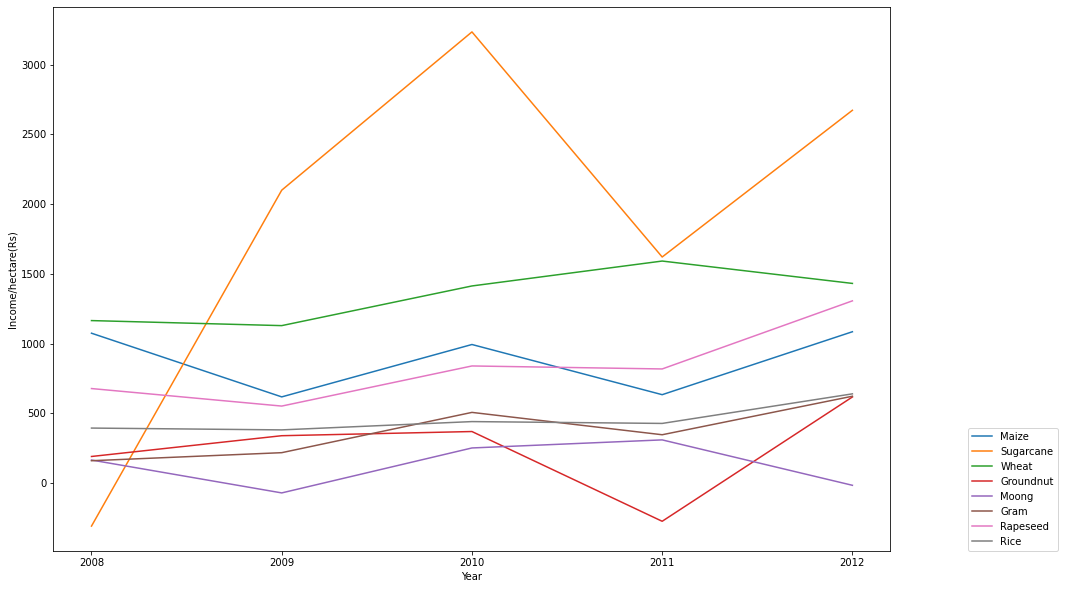

<Figure size 432x288 with 0 Axes>

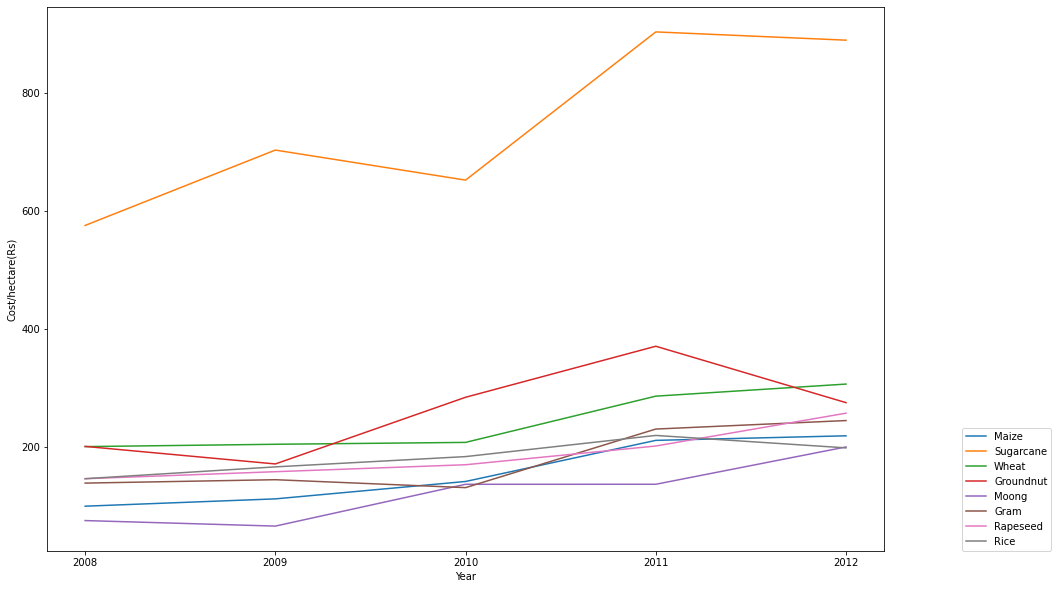

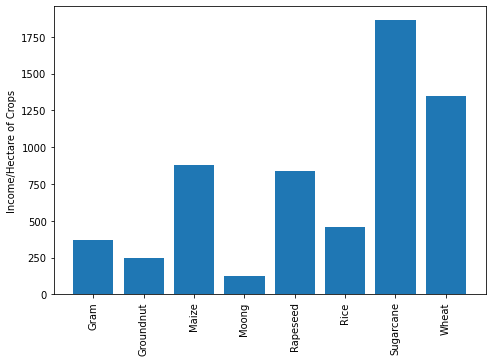

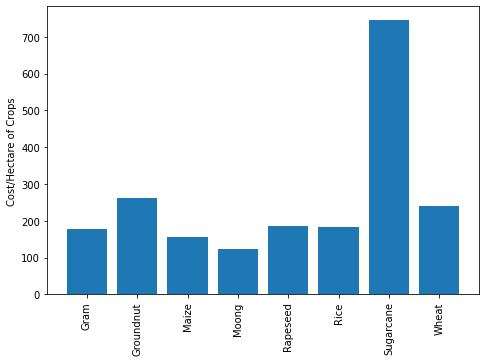

In [ ]:
income = pd.read_csv('Dataset/income.csv',delimiter=',')
income.loc[income["Crop"]=="Moong(Green Gram)","Crop"] = "Moong"
income.loc[income["Crop"]=="Rapeseed &Mustard","Crop"] = "Rapeseed"
# revenue['Revenue per hectare'] = revenue.apply(lambda row: row['Revenue per hectare']*10, axis=1)
plts = []
leg = []
price_slope = {}
crops = set(income['Crop'].tolist())

print(sorted(list(crops)))
plt.figure(figsize=(15,10))
for crop in crops:
  df = income[income['Crop']==crop].reset_index(drop=True)
  # print(df.loc[df['Crop_Year']==2002,'Price per quintal'])
#   st = df.loc[df['Year']==2008,:].reset_index().loc[0,'Income per quintal']
#   fin = df.loc[df['Year']==2013,:].reset_index().loc[0,'Income per quintal']
#   # print(st)
#   price_slope[crop] =  (fin - st)/10
  x, = plt.plot(df['Year'],df['New Income/Hect'])
  plts.append(x)
  leg.append(crop)
# plt
plt.xticks(range(2008, 2013))
plt.xlabel('Year')
plt.ylabel('Income/hectare(Rs)')
plt.legend(plts,leg,loc='lower right',borderaxespad=0.,bbox_to_anchor=(1.2, 0))
plt.savefig('crop_income.png',bbox_inches='tight')
plt.show()
plt.clf()
plts = []
leg = []
plt.figure(figsize=(15,10))
for crop in crops:
  df = income[income['Crop']==crop].reset_index(drop=True)
  # print(df.loc[df['Crop_Year']==2002,'Price per quintal'])
#   st = df.loc[df['Year']==2008,:].reset_index().loc[0,'Income per quintal']
#   fin = df.loc[df['Year']==2013,:].reset_index().loc[0,'Income per quintal']
#   # print(st)
#   price_slope[crop] =  (fin - st)/10
  x, = plt.plot(df['Year'],df['New Cost PerHectare'])
  plts.append(x)
  leg.append(crop)
# plt
plt.xticks(range(2008, 2013))
plt.xlabel('Year')
plt.ylabel('Cost/hectare(Rs)')
plt.legend(plts,leg,loc='lower right',borderaxespad=0.,bbox_to_anchor=(1.2, 0))
plt.savefig('crop_cost.png',bbox_inches='tight')

# plt.clf()
# revenue['yield'] = revenue.apply(lambda row: row['Production in quintals']*10/row['Area in Hectares'] if row['Crop']!='Sugarcane' else row['Production in quintals']*10/(10*row['Area in Hectares']),axis=1)
df = income.groupby(['Crop'])['New Income/Hect'].agg('mean').reset_index()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
crop = df['Crop'].tolist()
yld = df['New Income/Hect'].tolist()
bars =ax.bar(crop,yld)
# bars[-2].set_color('bl')
plt.xticks(rotation='vertical')
plt.ylabel('Income/Hectare of Crops')
plt.savefig('crop_income_bar.png')
plt.show()

df = income.groupby(['Crop'])['New Cost PerHectare'].agg('mean').reset_index()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
crop = df['Crop'].tolist()
yld = df['New Cost PerHectare'].tolist()
bars =ax.bar(crop,yld)
# bars[-2].set_color('bl')
plt.xticks(rotation='vertical')
plt.ylabel('Cost/Hectare of Crops')
# plt.savefig('crop_income_bar.png')
plt.savefig('crop_income_bar.png', bbox_inches='tight')

plt.show()

In [ ]:
df = merged_csv.fillna(0)
df = df[['Area','rainfall','State_Name','Crop_Year']]
df1 = df.groupby(['State_Name','Crop_Year','rainfall'])['Area'].agg('sum').reset_index()
# df1.reset_index(level=1, inplace=True)
# df1 = df1.groupby(['State_Name'])['Area','rainfall'].agg({'Area':'mean','rainfall':'mean'})
# df1.reset_index(level=0,inplace=True)
states = set(df1['State_Name'].tolist())
for state in states:
  small_df = df1[df1['State_Name']==state].reset_index(drop=True)
  
  corr = small_df['Area'].corr(small_df['rainfall'])
  if corr>=0.65: #or corr<=-0.2:
    plt.plot(small_df['rainfall'],small_df['Area'],'ro')
    plt.title("State : "+state+"\ncorr : "+str(corr))
    plt.xlabel("Rainfall(cm)")
    plt.ylabel("Cultivation Area(Hectare)")
    plt.rcParams.update({'font.size': 15})
    plt.show()
  if state=="West Bengal":
    plt.plot(small_df['rainfall'],small_df['Area'],'ro')
    plt.title("State : "+state+"\ncorr : "+str(corr))
    plt.xlabel("Rainfall(cm)")
    plt.ylabel("Cultivation Area(Hectare)")
    plt.rcParams.update({'font.size': 15})
    plt.show()


# crop_prod_sum.columns = crop_prod_sum.columns.droplevel(0)

    Crop_Year   Crop  Production
0        2002  Bajra   4713967.3
1        2003  Bajra  12060751.0
2        2004  Bajra   8051663.0
3        2005  Bajra   7118575.8
4        2006  Bajra   8334550.0
5        2007  Bajra   8857533.2
6        2008  Bajra   8900867.0
7        2009  Bajra   6517369.0
8        2010  Bajra  12269842.0
9        2011  Bajra   6073769.0
10       2012  Bajra   4877053.0


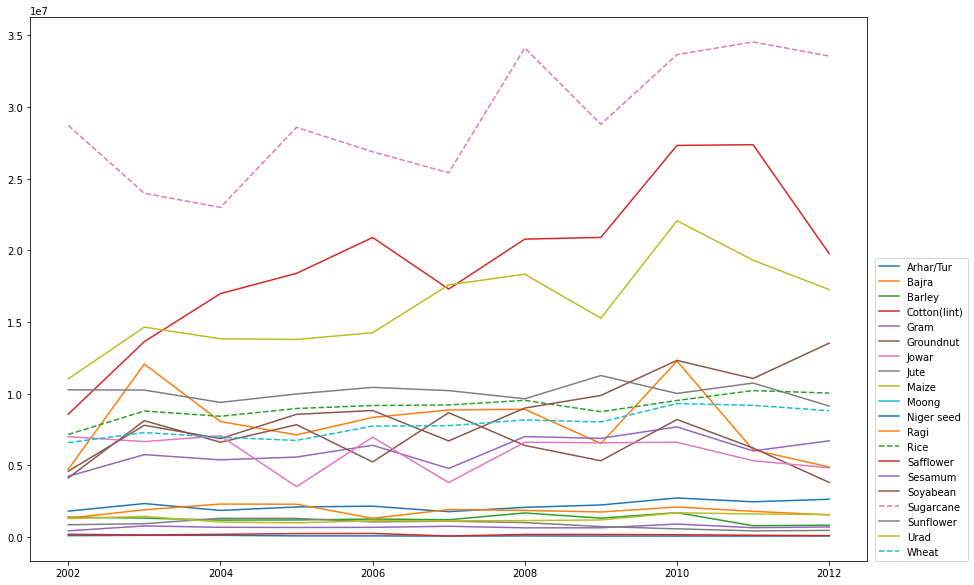

In [ ]:
crop_prod = pd.read_csv('Dataset/apy.csv',delimiter=',')
# crop_prod = crop_prod.fillna(0)
crop_prod = crop_prod.groupby(['Crop_Year','Crop'])['Production'].agg('sum').reset_index()
crop_prod = crop_prod[crop_prod['Crop_Year'].isin(range(2002,2013))].reset_index(drop=True)
plts = []
leg = []
plt.figure(figsize=(15,10))
for crop in major_crops:
  
  df = crop_prod[crop_prod['Crop']==crop].reset_index(drop=True)
  if crop=="Bajra":
    print(df)
  if crop in ['Sugarcane','Wheat','Rice']:
    x, =plt.plot(df['Crop_Year'],df['Production']/10,'--')
    plts.append(x)
    leg.append(crop)
  else:
    x, =plt.plot(df['Crop_Year'],df['Production'])
    plts.append(x)
    leg.append(crop)

 

plt.legend(plts,leg,loc='lower right',borderaxespad=0.,bbox_to_anchor = (1.12,0))

plt.show()


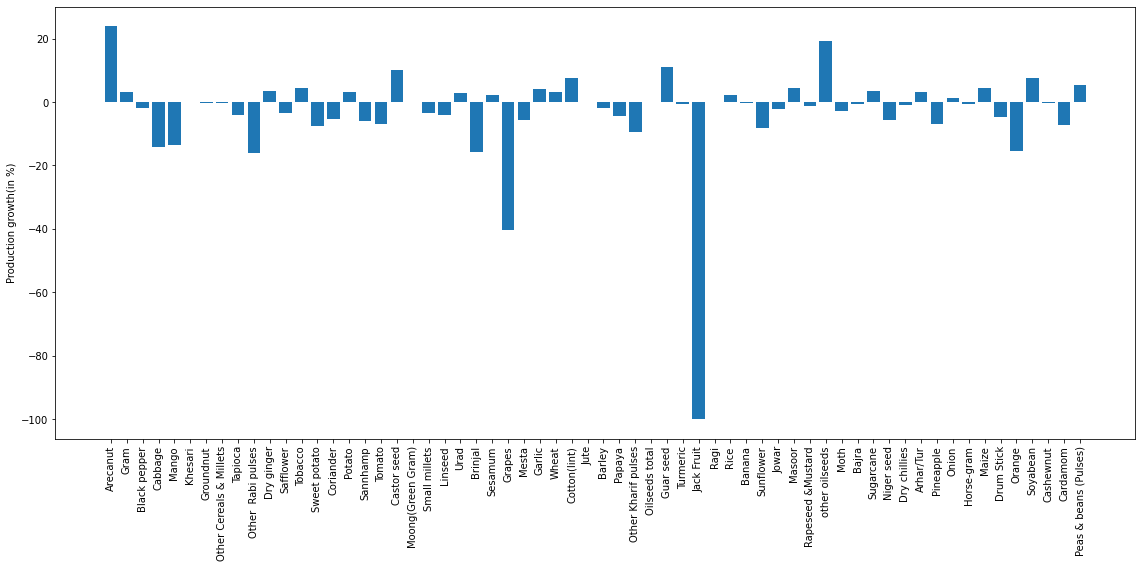

['Other Dry Fruit', 'Cabbage', 'Mango', 'Pear', 'Atcanut (Raw)', 'Sapota', 'Samai', 'Pome Granet', 'Cashewnut Processed', 'Ribed Guard', 'Peas  (vegetable)', 'Bottle Gourd', 'Redish', 'Bhindi', 'Carrot', 'Tomato', 'Cashewnut Raw', 'Brinjal', 'Paddy', 'Snak Guard', 'Grapes', 'Pome Fruit', 'Plums', 'Other Vegetables', 'Ber', 'Blackgram', 'Papaya', 'Bitter Gourd', 'Other Citrus Fruit', 'Tea', 'Jute & mesta', 'Cauliflower', 'Jack Fruit', 'Other Fresh Fruits', 'Yam', 'Pump Kin', 'Lemon', 'Cucumber', 'Ginger', 'Peach', 'Rubber', 'Turnip', 'Varagu', 'Cowpea(Lobia)', 'Water Melon', 'Pineapple', 'Beet Root', 'Ash Gourd', 'Pulses total', 'other fibres', 'Citrus Fruit', 'Apple', 'Drum Stick', 'Coffee', 'Orange', 'Korra', 'other misc. pulses', 'Lab-Lab', 'Litchi', 'Beans & Mutter(Vegetable)', 'Arcanut (Processed)']


In [ ]:
crops = set(crop_prod['Crop'].tolist()) - set(['Coconut '])
# crops = {'Gram', 'Ragi', 'Groundnut', 'Rice', 'Sunflower', 'Jowar', 'Safflower', 'Rapeseed &Mustard', 'Bajra', 'Niger seed', 'Sugarcane', 'Arhar/Tur', 'Maize', 'Moong(Green Gram)', 'Urad', 'Sesamum', 'Soyabean', 'Wheat', 'Cotton(lint)', 'Jute', 'Barley'}
slope_d = {}
W_slope = {}
crops_with_less_yearwise_data = []
for crop in crops:
  df3 = crop_prod[crop_prod['Crop']==crop]
  if df3.shape[0]<8:
    crops_with_less_yearwise_data.append(crop)
  df1 = crop_prod[(crop_prod['Crop_Year']<=2004) & (crop_prod['Crop']==crop)].reset_index(drop=True)
  df1 = df1[~df1.isna()]
  start = df1['Production'].mean(axis=0)
  df2 = crop_prod[(crop_prod['Crop_Year']>=2010) & (crop_prod['Crop']==crop)].reset_index(drop=True)
  df2 = df2[~df2.isna()]
  end = df2['Production'].mean(axis=0)
  if start!=0:
    if start==start and end==end:
      slope_d[crop] = (math.pow(end/start,1/9)-1)*100#(end-start)/start
  if start==start and end==end:
    W_slope[crop] = (end-start)/9

prod_slope = list(slope_d.items())
prod_slope = sorted(prod_slope,key = lambda x : x[1])
W_slope_l = list(W_slope.items())
W_slope_l = sorted(W_slope_l,key = lambda x : x[1])
W_slope

fig = plt.figure(figsize=(15, 6))
ax = fig.add_axes([0,0,1,1])
crops_l = list(slope_d.keys())

slopes = [slope_d[crop] for crop in crops_l]

bars =ax.bar(crops_l,slopes)
plt.xticks(rotation='vertical')
plt.ylabel('Production growth(in %)')
plt.show()


print(crops_with_less_yearwise_data)

**Train Test Split**

In [ ]:
## train and test production only on major crops
merged_csv_ = merged_csv[merged_csv['Crop'].isin(major_crops)].reset_index(drop=True)
## -----------------

## train and test production on non major crops
# merged_csv_ = merged_csv[~merged_csv['Crop'].isin(major_crops)].reset_index(drop=True)
## ----------------

## Crops with less yearwise production data are excluded

crops_with_less_yearwise_data = ['Bitter Gourd', 'Pome Fruit', 'Other Fresh Fruits', 'Jute & mesta', 'Peas  (vegetable)', 'Ber', 'Other Vegetables', 'Pineapple', 'Rubber', 'Cashewnut Processed', 'Plums', 'Cowpea(Lobia)', 'Tea', 'Drum Stick', 'Pome Granet', 'Water Melon', 'Lemon', 'Brinjal', 'Tomato', 'Blackgram', 'Yam', 'Ash Gourd', 'Bhindi', 'Korra', 'Turnip', 'Other Citrus Fruit', 'Cabbage', 'Citrus Fruit', 'Apple', 'Paddy', 'Litchi', 'Lab-Lab', 'Redish', 'Grapes', 'Varagu', 'Carrot', 'Ginger', 'Samai', 'Pulses total', 'Cucumber', 'Coffee', 'Beet Root', 'Jack Fruit', 'Pump Kin', 'Bottle Gourd', 'Cauliflower', 'Orange', 'Ribed Guard', 'other fibres', 'Pear', 'Mango', 'other misc. pulses', 'Other Dry Fruit', 'Papaya', 'Peach', 'Sapota', 'Cashewnut Raw', 'Snak Guard', 'Arcanut (Processed)', 'Atcanut (Raw)', 'Beans & Mutter(Vegetable)']
# merged_csv_ = merged_csv[~merged_csv['Crop'].isin(crops_with_less_yearwise_data)].reset_index(drop=True)
## -----------

merged_csv_ = pd.get_dummies(merged_csv_,columns = ["Season","Crop"],prefix = ['Season_is','Crop_is'])
merged_csv_ = merged_csv_.drop(columns = ['State_Name','District_Name'],axis=0)
merged_csv_ = merged_csv_.fillna(0).reset_index(drop=True)
# merged_csv_X = merged_csv_.drop(["Production","Crop_Year"],axis=1)
# merged_csv_Y = merged_csv_[["Production","Crop_Year"]]
# mm_scaler = preprocessing.MinMaxScaler()
# l = mm_scaler.fit_transform(merged_csv_X)
# merged_csv_ = pd.DataFrame(l, index=merged_csv_X.index, columns=merged_csv_X.columns)
# merged_csv_["Production"] = merged_csv_Y["Production"]
# merged_csv_["Crop_Year"] = merged_csv_Y["Crop_Year"]

merged_csv_train = merged_csv_[merged_csv_['Crop_Year']<=2008].reset_index(drop=True)
merged_csv_test = merged_csv_[merged_csv_['Crop_Year']>2008].reset_index(drop=True)
X_train = merged_csv_train.drop(columns=['Production'],axis=1)
y_train = merged_csv_train['Production']
X_test = merged_csv_test.drop(columns=['Production'],axis=1)
y_test = merged_csv_test['Production']
# y = merged_csv["production/Area"]
# X = merged_csv.drop(columns = ["production/Area"],axis=1)
# X["Season"] =X["Season"].astype('category')
# X["Season_Cat"] = X["Season"].cat.codes

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
print(X_train.shape,X_test.shape)
print(X_train.columns)

(60429, 29) (37574, 29)
Index(['Crop_Year', 'Area', 'rainfall', 'temperature', 'Season_is_Autumn     ',
       'Season_is_Kharif     ', 'Season_is_Rabi       ',
       'Season_is_Summer     ', 'Season_is_Whole Year ',
       'Season_is_Winter     ', 'Crop_is_Arhar/Tur', 'Crop_is_Bajra',
       'Crop_is_Barley', 'Crop_is_Cotton(lint)', 'Crop_is_Gram',
       'Crop_is_Groundnut', 'Crop_is_Jowar', 'Crop_is_Jute', 'Crop_is_Maize',
       'Crop_is_Niger seed', 'Crop_is_Ragi', 'Crop_is_Rice',
       'Crop_is_Safflower', 'Crop_is_Sesamum', 'Crop_is_Soyabean',
       'Crop_is_Sugarcane', 'Crop_is_Sunflower', 'Crop_is_Urad',
       'Crop_is_Wheat'],
      dtype='object')


**Linear Regression**

Random forest validation MAE =  110880.66040572415
0.18861044131768456


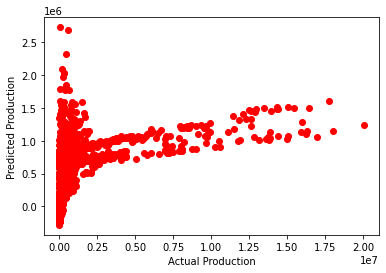

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
MAE = mean_absolute_error(y_test , y_pred)
print('Random forest validation MAE = ', MAE)
print(r2_score(y_test,y_pred))
plt.plot(y_test,y_pred,'ro')
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.show()

**Decision Tree**

Random forest validation MAE =  31189.126734710168
0.9056629893402154


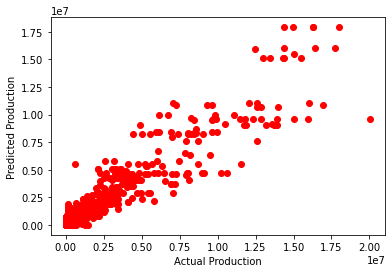

<bound method BaseEstimator.get_params of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')>


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
MAE = mean_absolute_error(y_test , y_pred)
print('Random forest validation MAE = ', MAE)
print(r2_score(y_test,y_pred))
plt.plot(y_test,y_pred,'ro')
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.show()
print(regressor.get_params)

**Random Forest**

Random forest validation MAE =  24796.177743976226
0.9386151498209708


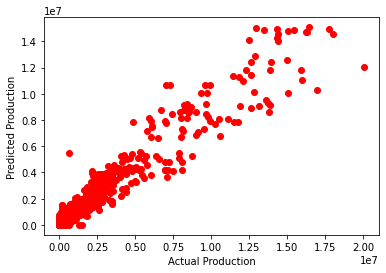

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>


In [ ]:
# random forest 
model = RandomForestRegressor()
model.fit(X_train,y_train)

# Get the mean absolute error on the validation data
y_pred = model.predict(X_test)
MAE = mean_absolute_error(y_test , y_pred)
print('Random forest validation MAE = ', MAE)
print(r2_score(y_test,y_pred))
plt.plot(y_test,y_pred,'ro')
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.show()
print(model.get_params)

**XGBoost**

[19:01:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost validation MAE =  31355.600254600493
0.9307684807435922


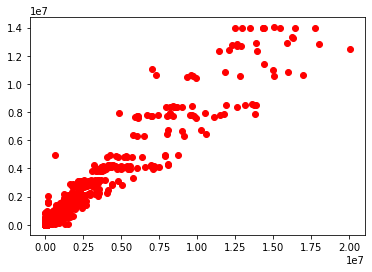

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)>


In [ ]:
## XGBOOST
XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train , verbose=False)

# Get the mean absolute error on the validation data :
y_pred = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , y_pred)
print('XGBoost validation MAE = ',MAE)

print(r2_score(y_test,y_pred))
plt.plot(y_test,y_pred,'ro')
plt.show()
print(XGBModel.get_params)

**ANN**

In [ ]:
# ANN
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

NN_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split = 0.2, callbacks=callbacks_list)
# wights_file = 'Weights-081--85248.93294.hdf5' # choose the best checkpoint 
# NN_model.load_weights(wights_file) # load it

y_pred = NN_model.predict(X_test)
# print(y_pred)
print(r2_score(y_test,y_pred))

No handles with labels found to put in legend.


{'MUKTSAR', 'KONDAGAON', 'CHHINDWARA', 'CHITTOOR', 'SIRMAUR', 'CHIKMAGALUR', 'WARDHA', 'JAIPUR', 'SHRAVASTI', 'KANNUR', 'MALDAH', 'LOWER DIBANG VALLEY', 'DOHAD', 'ALLAHABAD', 'UPPER SUBANSIRI', 'BANKURA', 'PARBHANI', 'SINGRAULI', 'JEHANABAD', 'JALAUN', 'MEERUT', 'JIND', 'KASGANJ', 'BARDHAMAN', 'DHUBRI', 'NALBARI', 'SIKAR', 'KODERMA', 'TIRUVANNAMALAI', 'BHILWARA', 'NANDED', 'NAWADA', 'DURG', 'DEOGARH', 'SATARA', 'KODAGU', 'GODDA', 'MUNGER', 'CHIRANG', 'BISHNUPUR', 'PURBI CHAMPARAN', 'FATEHGARH SAHIB', 'SHEOPUR', 'SONBHADRA', 'SENAPATI', 'BEED', 'CACHAR', 'NAGAPATTINAM', 'SIRSA', 'DAKSHIN KANNAD', 'ANUGUL', 'MORADABAD', 'GADAG', 'NABARANGPUR', 'SEONI', 'MEDINIPUR WEST', 'KOTTAYAM', 'GAYA', 'SONITPUR', 'BARGARH', 'JANJGIR-CHAMPA', 'SHEIKHPURA', 'KALAHANDI', 'BHAGALPUR', 'BEGUSARAI', 'BOKARO', 'DADRA AND NAGAR HAVELI', 'KULLU', 'KISHANGANJ', 'GHAZIPUR', 'RAJKOT', 'DARBHANGA', 'SHEOHAR', 'NAMAKKAL', 'EAST GARO HILLS', 'REWARI', 'RUDRA PRAYAG', 'AURAIYA', 'FAIZABAD', 'BIRBHUM', 'CHANGLANG', 

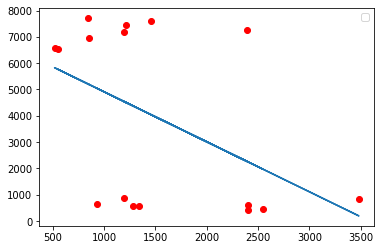

In [ ]:



crop_prod = pd.read_csv("Dataset/apy.csv",delimiter = ',')
crop_prod["production/Area"] = crop_prod.apply(lambda row : row["Production"]/row["Area"]*100 if row["Area"]!=0 else np.NaN,axis=1)

crop_prod=crop_prod.fillna(0)

# print(crop_prod.columns)


crops = set([])
districts = set([])
for i in range(crop_prod.shape[0]):
	crops.add(crop_prod.loc[i,"Crop"])
	districts.add(crop_prod.loc[i,"District_Name"])
# crop_prod =  crop_prod[crop_prod["District_Name"]=="UNA"]
print(districts)
print(crops)
# # crop_prod = crop_prod[crop_prod["Crop"]=="Jute"]
# # crop_prod = crop_prod.reset_index(drop=True)
# # print(crop_prod.head(10))
# crop_prod_sum = crop_prod.groupby(['Crop','Crop_Year'])['Production'].agg('sum').to_frame('total').reset_index()
# # crop_prod_sum.reset_index(level=0, inplace=True)
# # crop_prod_sum.columns = crop_prod_sum.columns.droplevel(0)

# crop_prod_sum["rate"] = crop_prod_sum.total.pct_change().mul(100).round(2)
# crop_prod_stats = crop_prod_sum.groupby(['Crop'])['total'].agg({'mean':'mean','std':'std','first':'first','last':'last'})
# # crop_prod_sum = crop_prod_sum[(crop_prod_sum.total!=0)]
# crop_prod_stats['overall_rate'] = crop_prod_stats.apply(lambda row : (row['last']-row['first'])/row['first']*100 if row['first']!=0 else np.NaN, axis = 1) 
# crop_prod_stats = crop_prod_stats.sort_values(by=['overall_rate'])
# print(crop_prod_stats)
# # print(crop_prod_sum["Crop_Year"])
# # plt.plot(crop_prod_sum["Crop_Year"],crop_prod_sum["rate"])
# # plt.show(1)


rainfall = pd.read_csv("Dataset/rainfall/rainfall1.csv")
# print(rainfall.head())
# print(rainfall.columns)
# print(result.head(10))
# print(result.columns)
crop_prod = crop_prod.groupby(['State_Name','Crop_Year','Crop'])['production/Area'].agg('sum').to_frame('total').reset_index()
result=pd.concat([crop_prod, rainfall.rename(columns={'STATES':'State_Name'})], axis=1, join='inner')
result = result[result["Crop"]=="Rice"]
print(result)
print(result.columns)
print(result["total"].corr(result["ANNUAL"]))
# plt.plot(result['ANNUAL'],result['total'],'ro')
# plt.show(1)


model = LinearRegression()
model.fit(pd.DataFrame(result["ANNUAL"]),pd.DataFrame(result["total"]))
print(model.coef_)

y_actual = pd.DataFrame(result["total"])
# print(y_actual)
y_pred = model.predict(pd.DataFrame(result["ANNUAL"]))
print(y_pred,y_actual)
ssr = np.sum((y_pred - y_actual)**2)
print(math.sqrt(ssr))


plt.plot(result["ANNUAL"],result["total"],'ro')
plt.plot(result["ANNUAL"],model.predict(pd.DataFrame(result["ANNUAL"])))

plt.legend(loc='best')
plt.show()

# find the optimal rainfall range, temperature range


In [ ]:
crop_prod = pd.read_csv('Dataset/apy.csv',delimiter = ',')
start_overall = 75.26 
end_overall = 82.14
start_men = 53.67
end_men = 65.46
start_women = 64.83
end_women = 74.04
diff_overall = (end_overall-start_overall)/10
diff_men = (end_men-start_men)/10
diff_women = (end_women-start_women)/10
pop_2001 = 1028737436
pop_2011 = 1210193422
rate = math.pow(pop_2011/pop_2001,0.1)-1
print(rate)
crop_prod['Literacy_overall'] = crop_prod.apply(lambda row : start_overall+diff_men*(row['Crop_Year']-2001),axis=1) 
crop_prod['Literacy_men'] = crop_prod.apply(lambda row : start_men+diff_men*(row['Crop_Year']-2001),axis=1)
crop_prod['Literacy_women'] = crop_prod.apply(lambda row : start_women+diff_women*(row['Crop_Year']-2001),axis=1)   
crop_prod['population'] = crop_prod.apply(lambda row :pop_2001*math.pow((1+rate),(row['Crop_Year']-2001)),axis=1)


0.0163774580258802


**Top5 crops whose production is most correlated to literacy rate**

                         State_Name District_Name  ...  Literacy_women    population
0       Andaman and Nicobar Islands      NICOBARS  ...          63.909  1.012161e+09
1       Andaman and Nicobar Islands      NICOBARS  ...          63.909  1.012161e+09
2       Andaman and Nicobar Islands      NICOBARS  ...          63.909  1.012161e+09
3       Andaman and Nicobar Islands      NICOBARS  ...          63.909  1.012161e+09
4       Andaman and Nicobar Islands      NICOBARS  ...          63.909  1.012161e+09
...                             ...           ...  ...             ...           ...
246086                  West Bengal       PURULIA  ...          76.803  1.270632e+09
246087                  West Bengal       PURULIA  ...          76.803  1.270632e+09
246088                  West Bengal       PURULIA  ...          76.803  1.270632e+09
246089                  West Bengal       PURULIA  ...          76.803  1.270632e+09
246090                  West Bengal       PURULIA  ...          7

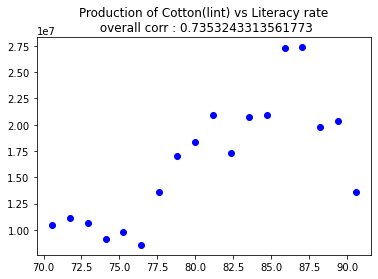

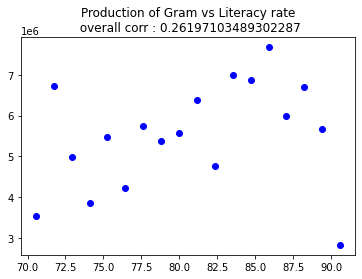

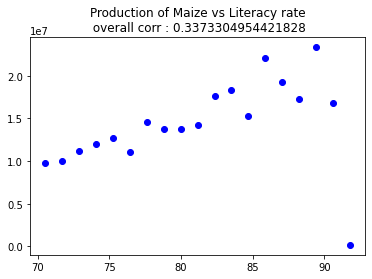

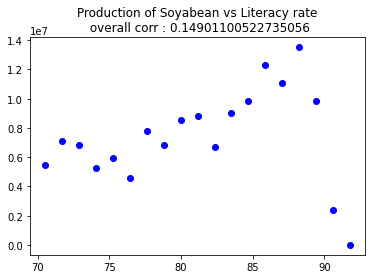

['Cotton(lint)', 'Maize', 'Gram', 'Moong', 'Soyabean']

In [ ]:
## Realtionship between production and literacy rate
# for crop in major_crops:
df = crop_prod.groupby(['Crop_Year','Crop'])['Production','Literacy_overall','Literacy_men','Literacy_women'].agg({'Production':'sum','Literacy_overall':'min','Literacy_men':'min','Literacy_women':'min'}).reset_index()
print(crop_prod)
lito_prod_corr = {}
litm_prod_corr = {}
litw_prod_corr = {}
for crop in major_crops:
  df1 = df[df['Crop']==crop].reset_index(drop=True)
  lito_prod_corr[crop] = df1['Production'].corr(df1['Literacy_overall'])
  litm_prod_corr[crop] = df1['Production'].corr(df1['Literacy_men'])
  litw_prod_corr[crop] = df1['Production'].corr(df1['Literacy_women'])
  if litw_prod_corr[crop]>0.1 or litm_prod_corr[crop] >0.1 or lito_prod_corr[crop]>0.1:
    plt.plot(df1['Literacy_overall'],df1['Production'],'bo')
    plt.title("Production of "+crop+" vs Literacy rate\n overall corr : "+str(lito_prod_corr[crop]))
    plt.show()  

l = list(lito_prod_corr.items())
l = sorted(l,key=lambda x:x[1],reverse=True)
top5_correlated_crops = [x[0] for x in l[:5]]
top5_correlated_crops
  


**Top 5 crops whose production is most correlated with population**

                         State_Name District_Name  ...  Literacy_women    population
0       Andaman and Nicobar Islands      NICOBARS  ...          63.909  1.012161e+09
1       Andaman and Nicobar Islands      NICOBARS  ...          63.909  1.012161e+09
2       Andaman and Nicobar Islands      NICOBARS  ...          63.909  1.012161e+09
3       Andaman and Nicobar Islands      NICOBARS  ...          63.909  1.012161e+09
4       Andaman and Nicobar Islands      NICOBARS  ...          63.909  1.012161e+09
...                             ...           ...  ...             ...           ...
246086                  West Bengal       PURULIA  ...          76.803  1.270632e+09
246087                  West Bengal       PURULIA  ...          76.803  1.270632e+09
246088                  West Bengal       PURULIA  ...          76.803  1.270632e+09
246089                  West Bengal       PURULIA  ...          76.803  1.270632e+09
246090                  West Bengal       PURULIA  ...          7

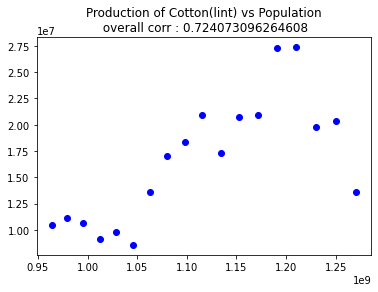

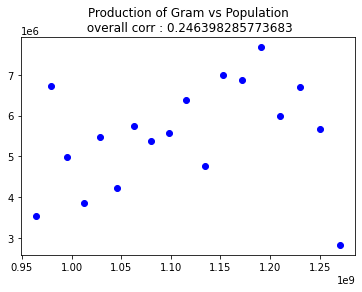

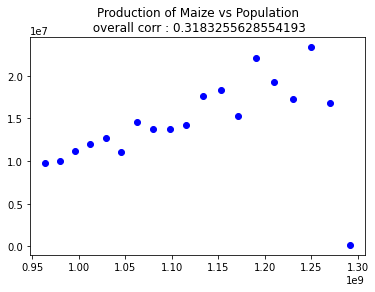

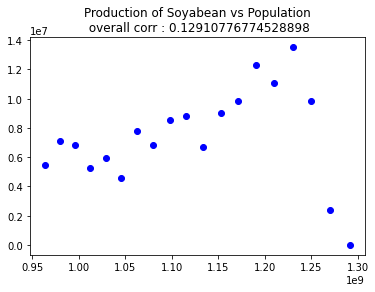

['Cotton(lint)', 'Maize', 'Gram', 'Moong', 'Soyabean']

In [ ]:
df = crop_prod.groupby(['Crop_Year','Crop','population'])['Production'].agg('sum').reset_index()
print(crop_prod)
pop_prod_corr = {}
for crop in major_crops:
  df1 = df[df['Crop']==crop].reset_index(drop=True)
  pop_prod_corr[crop] = df1['Production'].corr(df1['population'])
  if pop_prod_corr[crop]>0.1:
    plt.plot(df1['population'],df1['Production'],'bo')
    plt.title("Production of "+crop+" vs Population\n overall corr : "+str(pop_prod_corr[crop]))
    plt.show()  

l = list(pop_prod_corr.items())
l = sorted(l,key=lambda x:x[1],reverse=True)
top5_correlated_crops = [x[0] for x in l[:5]]
top5_correlated_crops
  


**Top 5 major crops whose production is correlated with rainfall**

     Crop_Year                 Crop   Production      rainfall
0         2002                Apple         0.00  32171.016667
1         2002  Arcanut (Processed)    192831.00  32171.016667
2         2002             Arecanut    183255.00  32171.016667
3         2002            Arhar/Tur   1795828.47  32171.016667
4         2002            Ash Gourd         0.00  32171.016667
..         ...                  ...          ...           ...
714       2012               Tomato    625411.00  35464.183333
715       2012             Turmeric    295269.00  35464.183333
716       2012                 Urad   1555020.60  35464.183333
717       2012                Wheat  88022121.40  35464.183333
718       2012       other oilseeds       383.00  35464.183333

[719 rows x 4 columns]


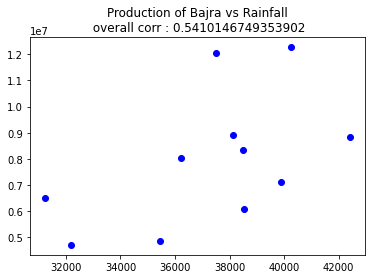

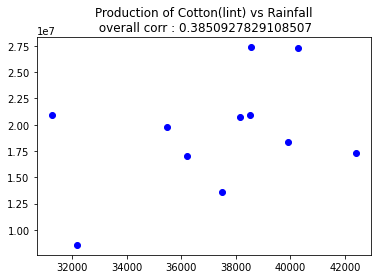

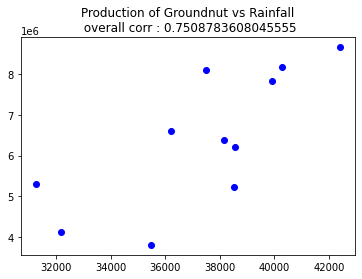

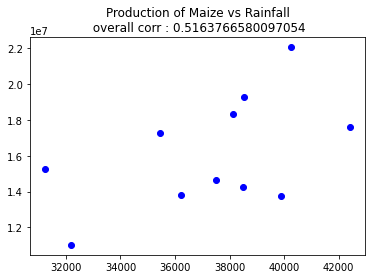

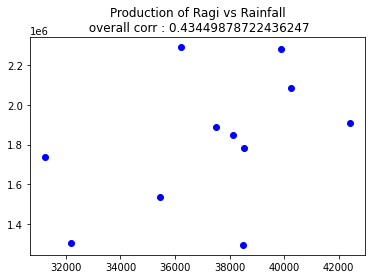

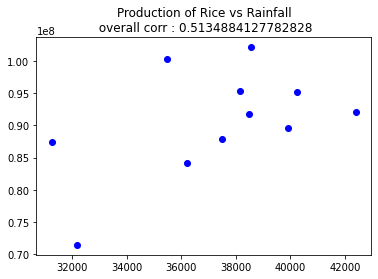

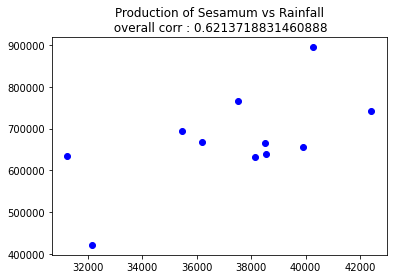

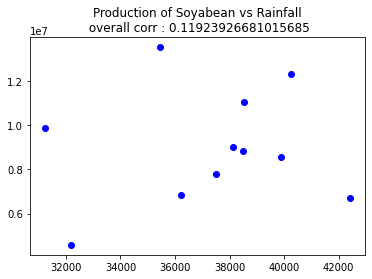

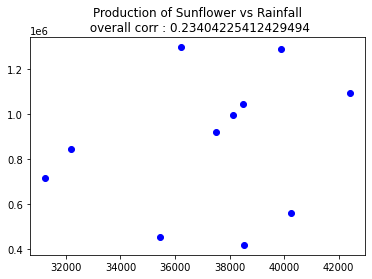

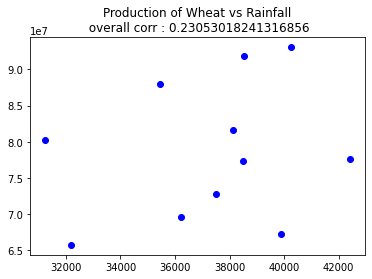

['Groundnut', 'Maize', 'Moong', 'Sesamum', 'Bajra']

In [ ]:
df = crop_prod.groupby(['Crop_Year','Crop'])['Production'].agg('sum').reset_index()
df = df[df['Crop_Year'].isin(range(2002,2013))].reset_index(drop=True)
rainfall = pd.read_csv('Dataset/rainfall/rainfall1.csv',delimiter=',')
rainfall = rainfall.groupby(['YEAR'])['ANNUAL'].agg('sum').reset_index()
df['rainfall'] = df.apply(lambda row : rainfall[rainfall['YEAR']==row['Crop_Year']].reset_index(drop=True).iloc[0,1],axis=1)
# print(crop_prod)
print(df)
rainfall_prod_corr = {}
for crop in major_crops:
  df1 = df[df['Crop']==crop].reset_index(drop=True)
  rainfall_prod_corr[crop] = df1['Production'].corr(df1['rainfall'])
  if rainfall_prod_corr[crop]>0.1:
    plt.plot(df1['rainfall'],df1['Production'],'bo')
    plt.title("Production of "+crop+" vs Rainfall\n overall corr : "+str(rainfall_prod_corr[crop]))
    plt.show()  

l = list(rainfall_prod_corr.items())
l = sorted(l,key=lambda x:x[1],reverse=True)
top5_correlated_crops = [x[0] for x in l[:5]]
top5_correlated_crops

**Top 5 crops with highest average cultivation area and production over years**

In [ ]:
df = crop_prod.groupby(['Crop_Year','Crop'])['Production','Area'].agg({'Production':'sum','Area':'sum'}).reset_index()
df = crop_prod.groupby(['Crop'])['Production','Area'].agg({'Production':'mean','Area':'mean'}).reset_index()

## Top 5 crops with highest average production over 15 years
df = df.sort_values(by=['Production'],ascending = False)
print(df.head(5))
##
df = df.sort_values(by=['Area'],ascending = False)
print(df.head(5))

                Crop    Production           Area
28          Coconut   6.638490e+07   14298.075728
106        Sugarcane  7.072546e+05    9680.088878
113  Total foodgrain  2.301636e+05  134626.595745
119            Wheat  1.691833e+05   59591.537152
49              Jute  1.289476e+05   10137.760496
                Crop     Production           Area
113  Total foodgrain  230163.601064  134626.595745
66    Oilseeds total  102975.492958  129968.500000
88      Pulses total   58929.902256   85534.075188
119            Wheat  169183.251688   59591.537152
95              Rice  106449.435312   49465.392035


**Top 5 crops with highest increase in production over years**

In [ ]:
df = crop_prod.groupby(['Crop_Year','Crop'])['Production'].agg('sum').reset_index()
df= df[df['Crop_Year'].isin(range(2002,2013))].reset_index(drop=True)
crop_prod_growth = {}
for crop in major_crops:
  df1 = df[df['Crop']==crop].reset_index(drop=True)
  df2 = df1[(df1['Crop_Year']<=2004) & (df1['Crop']==crop)].reset_index(drop=True)
  df2 = df2[~df2.isna()]
  start = df2['Production'].mean(axis=0)
  df3 = df1[(df1['Crop_Year']>=2010) & (df1['Crop']==crop)].reset_index(drop=True)
  df3 = df3[~df3.isna()]
  end = df3['Production'].mean(axis=0)
  a = (end-start)/start
  b = (end-start)/8
  crop_prod_growth[crop] = (a,b)

l = list(crop_prod_growth.items())
l = sorted(l,key=lambda x:x[1][0],reverse=True)
l = [x[0] for x in l[:5]]
print("Top 5 crops with highest increase in production relative to initial production b/w 2002-2004(percent-wise)",l)

l = list(crop_prod_growth.items())
l = sorted(l,key=lambda x:x[1][1],reverse=True)
l = [x[0] for x in l[:5]]
print("Top 5 crops with highest slope of production b/w 2002-2012",l)

  


Top 5 crops with highest increase in production relative to initial production b/w 2002-2004(percent-wise) ['Cotton(lint)', 'Maize', 'Moong', 'Soyabean', 'Sugarcane']
Top 5 crops with highest slope of production b/w 2002-2012 ['Moong', 'Sugarcane', 'Wheat', 'Rice', 'Cotton(lint)']


**Top 5 crops with highest increase in cultivation area over years**

In [ ]:
df = crop_prod.groupby(['Crop_Year','Crop'])['Area'].agg('sum').reset_index()
df= df[df['Crop_Year'].isin(range(2002,2013))].reset_index(drop=True)
crop_area_growth = {}
for crop in major_crops:
  df1 = df[df['Crop']==crop].reset_index(drop=True)
  df2 = df1[(df1['Crop_Year']<=2004) & (df1['Crop']==crop)].reset_index(drop=True)
  df2 = df2[~df2.isna()]
  start = df2['Area'].mean(axis=0)
  df3 = df1[(df1['Crop_Year']>=2010) & (df1['Crop']==crop)].reset_index(drop=True)
  df3 = df3[~df3.isna()]
  end = df3['Area'].mean(axis=0)
  a = (end-start)/start
  b = (end-start)/8
  crop_area_growth[crop] = (a,b)

l = list(crop_area_growth.items())
l = sorted(l,key=lambda x:x[1][0],reverse=True)
l = [x[0] for x in l[:5]]
print("Top 5 crops with highest increase in cultivation area relative to initial Area b/w 2002-2004(percent-wise)",l)

l = list(crop_prod_growth.items())
l = sorted(l,key=lambda x:x[1][1],reverse=True)
l = [x[0] for x in l[:5]]
print("Top 5 crops with highest slope of cultivation area b/w 2002-2012",l)


Top 5 crops with highest increase in cultivation area relative to initial Area b/w 2002-2004(percent-wise) ['Moong', 'Soyabean', 'Cotton(lint)', 'Arhar/Tur', 'Sugarcane']
Top 5 crops with highest slope of cultivation area b/w 2002-2012 ['Moong', 'Sugarcane', 'Wheat', 'Rice', 'Cotton(lint)']


**Top 5 district and state for each crop where production/Area is highest**

In [ ]:
crop_prod = pd.read_csv('Dataset/apy.csv',delimiter=',')
crop_prod = crop_prod[~crop_prod['Production'].isna()].reset_index(drop=True)
crop_prod['Production/Area'] = crop_prod.apply(lambda row: row['Production']/row['Area'] if row['Area']!=0 else np.nan, axis=1)
crop_prod = crop_prod.groupby(['Crop','District_Name','State_Name'])['Production/Area'].agg('mean').reset_index()
crop_state = {}
crop_district = {}
for crop in crops:
  df = crop_prod[crop_prod['Crop']==crop].reset_index(drop=True)
  df = df.sort_values(by=['Production/Area'],ascending=False)
  # print(df)
  for i in range(min(df.shape[0],20)):
    if i==0:
      crop_district[crop]=[df.loc[i,'District_Name']]
    else:
      crop_district[crop].append(df.loc[i,'District_Name'])


for crop in crops:
  df = crop_prod[crop_prod['Crop']==crop].reset_index(drop=True)
  df = df.groupby(['Crop','State_Name'])['Production/Area'].agg('mean').reset_index()
  df = df.sort_values(by=['Production/Area'],ascending=False)
  for i in range(min(df.shape[0],5)):
    if i==0:
      crop_state[crop]=[df.loc[i,'State_Name']]
    else:
      crop_state[crop].append(df.loc[i,'State_Name'])

print(crop_district)
print(crop_state)

{'Apple': ['DINDIGUL', 'THE NILGIRIS'], 'Arcanut (Processed)': ['BAGALKOT', 'BANGALORE RURAL', 'BELLARY', 'BENGALURU URBAN', 'CHAMARAJANAGAR', 'CHIKMAGALUR', 'CHITRADURGA', 'DAKSHIN KANNAD', 'DAVANGERE', 'DHARWAD', 'HASSAN', 'HAVERI', 'KODAGU', 'KOLAR', 'MANDYA', 'MYSORE', 'SHIMOGA', 'TUMKUR', 'UDUPI', 'UTTAR KANNAD'], 'Arecanut': ['24 PARAGANAS NORTH', '24 PARAGANAS SOUTH', 'ALAPPUZHA', 'ANANTAPUR', 'BAGALKOT', 'BAKSA', 'BANGALORE RURAL', 'BANKURA', 'BARDHAMAN', 'BARPETA', 'BELGAUM', 'BELLARY', 'BENGALURU URBAN', 'BIRBHUM', 'BONGAIGAON', 'CACHAR', 'CHAMARAJANAGAR', 'CHIKBALLAPUR', 'CHIKMAGALUR', 'CHIRANG'], 'Arhar/Tur': ['24 PARAGANAS NORTH', '24 PARAGANAS SOUTH', 'ADILABAD', 'AGAR MALWA', 'AGRA', 'AHMADABAD', 'AHMEDNAGAR', 'AIZAWL', 'AJMER', 'AKOLA', 'ALIGARH', 'ALIRAJPUR', 'ALLAHABAD', 'ALMORA', 'ALWAR', 'AMBALA', 'AMBEDKAR NAGAR', 'AMETHI', 'AMRAVATI', 'AMRELI'], 'Ash Gourd': ['COIMBATORE', 'CUDDALORE', 'DHARMAPURI', 'DINDIGUL', 'ERODE', 'KANCHIPURAM', 'KANNIYAKUMARI', 'KARUR', 'KR

**Crops with similarity in condition at which they are grown clustered together**

In [ ]:


crop_prod = pd.read_csv('Dataset/apy.csv',delimiter=',')
crop_prod = crop_prod[~crop_prod['Production'].isna()].reset_index(drop=True)
crop_prod['Production/Area'] = crop_prod.apply(lambda row: row['Production']/row['Area'] if row['Area']!=0 else np.nan, axis=1)
crop_prod = crop_prod[['Crop','Production/Area','Season','State_Name']]
states = set(crop_prod['State_Name'].tolist())
crop_prod = pd.get_dummies(crop_prod,columns = ["Season","State_Name"],prefix = ['Season_is','State_is'])
# crop_prod = crop_prod[~(crop_prod['Season_is_Whole Year ']==1)].reset_index(drop=True)
# print(crop_prod.columns)
crop_prod = crop_prod.groupby(['Crop'])[ 'Season_is_Autumn     ','Season_is_Kharif     ', 'Season_is_Rabi       ','Season_is_Summer     ','Season_is_Winter     ','Season_is_Whole Year ','State_is_Andaman and Nicobar Islands',
       'State_is_Andhra Pradesh', 'State_is_Arunachal Pradesh',
       'State_is_Assam', 'State_is_Bihar', 'State_is_Chandigarh',
       'State_is_Chhattisgarh', 'State_is_Dadra and Nagar Haveli',
       'State_is_Goa', 'State_is_Gujarat', 'State_is_Haryana',
       'State_is_Himachal Pradesh', 'State_is_Jammu and Kashmir ',
       'State_is_Jharkhand', 'State_is_Karnataka', 'State_is_Kerala',
       'State_is_Madhya Pradesh', 'State_is_Maharashtra', 'State_is_Manipur',
       'State_is_Meghalaya', 'State_is_Mizoram', 'State_is_Nagaland',
       'State_is_Odisha', 'State_is_Puducherry', 'State_is_Punjab',
       'State_is_Rajasthan', 'State_is_Sikkim', 'State_is_Tamil Nadu',
       'State_is_Telangana ', 'State_is_Tripura', 'State_is_Uttar Pradesh',
       'State_is_Uttarakhand', 'State_is_West Bengal'].agg('mean').reset_index()

# crops = crop_prod['Crop'].tolist()
# for crop in crops:
#   for i in states:
#     s= 'State_is_'+i
#     # print(crop_prod[crop_prod['Crop']==crop][s])
#     crop_prod.loc[crop_prod['Crop']==crop,s] = 0 
#     # print(crop_prod.loc[crop_prod['Crop']==crop,s])
#   for i in crop_state[crop]:
#     s = 'State_is_'+i
#     crop_prod.loc[crop_prod['Crop']==crop,s] = 1

df = crop_prod.drop(columns = ['Crop'],axis=0)
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=10000)
tsne_results = tsne.fit_transform(df)
tsne_results = pd.DataFrame(tsne_results,columns= ['x','y'])
model = KMeans(n_clusters=6).fit(df)
y_pred = model.labels_
cluster_crops = {}
crops = crop_prod['Crop'].tolist()
for i in range(len(y_pred)):
  if y_pred[i] in cluster_crops:
    cluster_crops[y_pred[i]].append(crops[i])
  else:
    cluster_crops[y_pred[i]] = [crops[i]]
# for i in range():
#   print(cluster_crops[i])
print(cluster_crops)
centroids  = model.cluster_centers_ 
print(centroids)

NameError: ignored

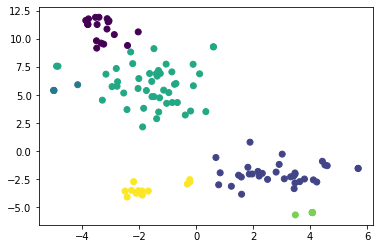

In [ ]:

plt.scatter(tsne_results['x'],tsne_results['y'],c=y_pred.astype('float'))
plt.show()

In [ ]:

for i in range(4):
  print(len(cluster_crops[i]))
  print(cluster_crops[i])

50
['Arcanut (Processed)', 'Arecanut', 'Atcanut (Raw)', 'Banana', 'Beans & Mutter(Vegetable)', 'Bhindi', 'Black pepper', 'Bottle Gourd', 'Brinjal', 'Cabbage', 'Cardamom', 'Carrot', 'Cashewnut', 'Cashewnut Processed', 'Cashewnut Raw', 'Cauliflower', 'Citrus Fruit', 'Coconut ', 'Coffee', 'Coriander', 'Dry chillies', 'Dry ginger', 'Garlic', 'Grapes', 'Guar seed', 'Mango', 'Oilseeds total', 'Onion', 'Orange', 'Other Dry Fruit', 'Other Fresh Fruits', 'Other Vegetables', 'Papaya', 'Peas  (vegetable)', 'Pineapple', 'Pome Fruit', 'Potato', 'Pulses total', 'Rubber', 'Sannhamp', 'Sugarcane', 'Sweet potato', 'Tapioca', 'Tea', 'Tobacco', 'Tomato', 'Turmeric', 'Turnip', 'Water Melon', 'other fibres']
40
['Arhar/Tur', 'Bajra', 'Bean', 'Castor seed', 'Colocosia', 'Cond-spcs other', 'Cotton(lint)', 'Cowpea(Lobia)', 'Groundnut', 'Horse-gram', 'Jobster', 'Jowar', 'Jute', 'Jute & mesta', 'Kapas', 'Korra', 'Lemon', 'Maize', 'Mesta', 'Moong(Green Gram)', 'Moth', 'Niger seed', 'Other Cereals & Millets', 'Ot

**Cluster similar district based on ph,soil type and rainfall and crops based on soil type and season in which it is grown**

In [ ]:
rainfall = pd.read_csv("Dataset/rainfall/district wise rainfall normal.csv")
rainfall_dict = {}
cols = list(rainfall.columns)
cols.remove('STATE_UT_NAME')
cols.remove('DISTRICT')
l= [cols.remove(x) for x in ['ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']]
print(cols)
for i in range(rainfall.shape[0]):
  st = rainfall.loc[i,"DISTRICT"]
  rainfall_dict[st] = rainfall.loc[i,"ANNUAL"]

crop_prod = pd.read_csv("Dataset/apy.csv",delimiter=',')
district1 = set(crop_prod["District_Name"].tolist())
district2 = set(rainfall['DISTRICT'].tolist())
map_rainfall_crop = {}
map_district_rainfall = {}
for i in district1:
  mn = 3
  mn_state = ""
  for j in district2:
    if i.lower()==j.lower():
      map_district_rainfall[i] = j
      break
    else:
      x = editDistDP(i.lower(),j.lower(),len(i),len(j))
      if x<=mn:
        mn = x 
        map_district_rainfall[i]=j



d = {'BID':'BEED',
'GANGANAGAR':'SRI GANGANAGA',
'HAORA':'HOWRAH',
'HUGLI' : 'HOOGHLY',
'KHERI' : 'KHERI LAKHIMP',
 'TIRUCHCHIRAPPALLI':'TIRUCHIRAPPAL',
 'TIRUNELVELI-KATTABO':'TIRUNELVELI',
 'SINGHBHUM':'WEST SINGHBHUM',
 'KACHCHH':'KUTCH',
 'VADODARA':'BARODA',
 'THE-DANGS':'DANGS',
 'KENDUJHAR':'KEONDJHARGARH',
 'PHULABANI':'KANDHAMAL/PHU',
 'KOCH-BIHAR':'COOCH BEHAR',
 'BARDDHAMAN':'BURDWAN'}



for dist in d.keys():
  map_district_rainfall[dist]=d[dist]

for k,v in map_district_rainfall.items():
	map_rainfall_crop[v] = k

multi_d = {'CHAMPARAN':['EAST CHAMPARAN','WEST CHAMPARAN'],
'KANPUR' : ['KANPUR NAGAR','KANPUR DEHAT'],
'MEDINIPUR':['EAST MIDNAPOR','WEST MIDNAPOR']
,'BANGLORE' : ['BANGALORE RUR','BANGALORE URB']
,'MUMBAI' : ['MUMBAI CITY','MUMBAI SUB']
}
dels = set(['KASGANJ','NUAPADA','RAMBAN','AMETHI','SHAMLI','SAMBHAL','NAVSARI','DHEMAJI','BOUDH','DOHAD','KHOWAI','MUMBAI','PATAN','SUKMA','KADAPA','SONIPAT','KONDAGAON','ANJAW','GANJAM','GORAKHPUR','BALOD','CHIRANG','AMROHA','HAPUR','ANAND','SHRAVASTI','TAPI','GARIYABAND','SURAJPUR','ALIRAJPUR','TAWANG','KANKER','ANUPPUR','BALESHWAR','NARMADA','PALWAL','NAMSAI','BEMTARA','PALGHAR','HATHRAS','RAMANAGARA'])
for i in dels:
  if i in map_district_rainfall:
    del map_district_rainfall[i]

residuals = set(crop_prod['District_Name'].tolist())-set(map_district_rainfall.keys())

['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']


In [ ]:
district_df = pd.read_csv("Dataset/district_soildata.csv",delimiter=',')
district_ph ={}
district_soil = {}
for i in range(district_df.shape[0]):
  district_ph[district_df.loc[i,"DISTNAME"]] = district_df.loc[i,"SoilPh"]
  district_soil[district_df.loc[i,"DISTNAME"]] = district_df.loc[i,"SoilType"]
district_df = pd.get_dummies(district_df,columns = ["SoilType"],prefix = ['SoilType_is'])
print(district_df.shape)
rainfall = pd.read_csv("Dataset/rainfall/district wise rainfall normal.csv",delimiter=',')

rainfall = rainfall[['DISTRICT','ANNUAL']]
# print(rainfall.shape)
dist_rainfall = {}
for i in range(rainfall.shape[0]):
  dist_rainfall[rainfall.loc[i,"DISTRICT"]] = rainfall.loc[i,"ANNUAL"]

# district_df['rainfall'] = district_df.apply(lambda row:dist_rainfall[row['DISTNAME']],axis=1)
# district_df


(271, 22)


In [ ]:
district1 = district_df['DISTNAME'].tolist()
district2 = rainfall['DISTRICT'].tolist()

map_district_rainfall = {}
for i in district1:
  mn = 3
  mn_state = ""
  for j in district2:
    if i.lower()==j.lower():
      map_district_rainfall[i] = j
      break
    else:
      x = editDistDP(i.lower(),j.lower(),len(i),len(j))
      if x<=mn:
        mn = x 
        map_district_rainfall[i]=j


d = {'BID':'BEED',
'GANGANAGAR':'SRI GANGANAGA',
'HAORA':'HOWRAH',
'HUGLI' : 'HOOGHLY',
'KHERI' : 'KHERI LAKHIMP',
 'TIRUCHCHIRAPPALLI':'TIRUCHIRAPPAL',
 'TIRUNELVELI-KATTABO':'TIRUNELVELI',
 'SINGHBHUM':'WEST SINGHBHUM',
 'KACHCHH':'KUTCH',
 'VADODARA':'BARODA',
 'THE-DANGS':'DANGS',
 'KENDUJHAR':'KEONDJHARGARH',
 'PHULABANI':'KANDHAMAL/PHU',
 'KOCH-BIHAR':'COOCH BEHAR',
 'BARDDHAMAN':'BURDWAN'}

for dist in d.keys():
  map_district_rainfall[dist]=d[dist]

multi_d = {'CHAMPARAN':['EAST CHAMPARAN','WEST CHAMPARAN'],
'KANPUR' : ['KANPUR NAGAR','KANPUR DEHAT'],
'MEDINIPUR':['EAST MIDNAPOR','WEST MIDNAPOR']
,'BANGLORE' : ['BANGALORE RUR','BANGALORE URB']
,'MUMBAI' : ['MUMBAI CITY','MUMBAI SUB']
}

print(len(map_district_rainfall))

263


In [ ]:
# map_district_rainfall['BANGLORE'] = 
rem = [dist for dist in district2 if dist not in map_district_rainfall.values()]
# rem

#  'WEST_DINAJPUR',
#  '24_PARGANAS',
# 'WEST_NIMAR',
#  'EAST_NIMAR',
#  'CHENGALPATTU',
#  'NORTH_ARCOT_AMBEDKAR',
#  'SOUTH_ARCOT',

# for k,v in district_ph.items():
#   if v==0:
#     print(k)
# print(district_ph)

In [ ]:
district_df = district_df[(district_df['DISTNAME'].isin(map_district_rainfall.keys()))].reset_index(drop=True)

               SoilType       Crop  Production/Area
0                        Arhar/Tur         0.932711
1        Red and Yellow  Arhar/Tur         0.566089
2         Shallow Black  Arhar/Tur         0.977776
3          Medium Black  Arhar/Tur         0.594040
4            Deep Black  Arhar/Tur         0.624768
5   Mixed Red and Black  Arhar/Tur         0.556602
6      Coastal Alluvial  Arhar/Tur         0.666158
7      Deltaic Alluvium  Arhar/Tur         0.882219
8             Calcerous  Arhar/Tur         1.143068
9            Gray Brown  Arhar/Tur         0.718443
10               Desert  Arhar/Tur         0.513329
11                Tarai  Arhar/Tur         0.821540
12       Black (Karail)  Arhar/Tur         0.479613
13  Saline and Alkaline  Arhar/Tur         0.905168
14       Alluvial River  Arhar/Tur         0.811005
15             Skeletal  Arhar/Tur         0.846681
16   Saline and Deltaic  Arhar/Tur         0.712247
17                  Red  Arhar/Tur         0.886201
18      Red 

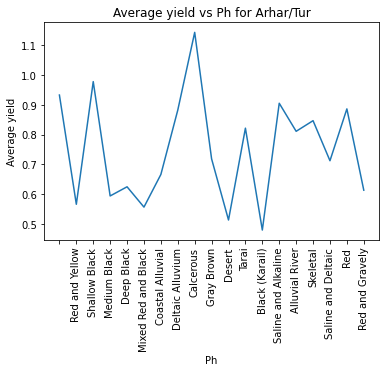

               SoilType   Crop  Production/Area
0                        Bajra         0.641551
1        Red and Yellow  Bajra         0.592308
2         Shallow Black  Bajra         0.810321
3          Medium Black  Bajra         0.865114
4            Deep Black  Bajra         0.827748
5   Mixed Red and Black  Bajra         0.780942
6      Coastal Alluvial  Bajra         1.692102
7      Deltaic Alluvium  Bajra         1.633051
8             Calcerous  Bajra         0.949488
9            Gray Brown  Bajra         0.772537
10               Desert  Bajra         0.478752
11                Tarai  Bajra         0.975000
12       Black (Karail)  Bajra         1.081447
13  Saline and Alkaline  Bajra         1.269921
14       Alluvial River  Bajra         1.324899
15             Skeletal  Bajra         0.616521
16                  Red  Bajra         1.174470
17      Red and Gravely  Bajra         0.493192


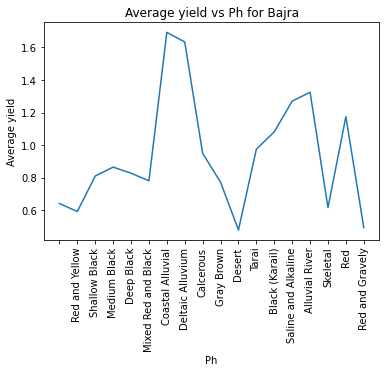

               SoilType    Crop  Production/Area
0                        Barley         1.101751
1        Red and Yellow  Barley         0.969972
2         Shallow Black  Barley         1.778686
3          Medium Black  Barley         1.343512
4            Deep Black  Barley         1.804905
5   Mixed Red and Black  Barley         1.544496
6      Coastal Alluvial  Barley         2.429944
7             Calcerous  Barley         1.303632
8            Gray Brown  Barley         2.414129
9                Desert  Barley         2.177853
10                Tarai  Barley         1.355496
11  Saline and Alkaline  Barley         2.301436
12       Alluvial River  Barley         2.230246
13                  Red  Barley         1.430974


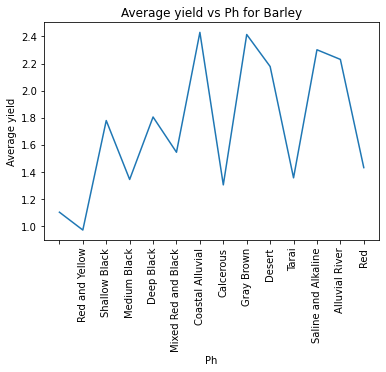

               SoilType          Crop  Production/Area
0                        Cotton(lint)         2.046823
1        Red and Yellow  Cotton(lint)         1.318677
2         Shallow Black  Cotton(lint)         1.357007
3          Medium Black  Cotton(lint)         1.484576
4            Deep Black  Cotton(lint)         1.756006
5   Mixed Red and Black  Cotton(lint)         1.498343
6      Coastal Alluvial  Cotton(lint)         2.607120
7      Deltaic Alluvium  Cotton(lint)         3.701954
8            Gray Brown  Cotton(lint)         1.000611
9                Desert  Cotton(lint)         1.114386
10       Black (Karail)  Cotton(lint)         1.900700
11  Saline and Alkaline  Cotton(lint)         0.434880
12       Alluvial River  Cotton(lint)         1.674213
13             Skeletal  Cotton(lint)         1.305003
14                  Red  Cotton(lint)         1.472422
15      Red and Gravely  Cotton(lint)         2.827551


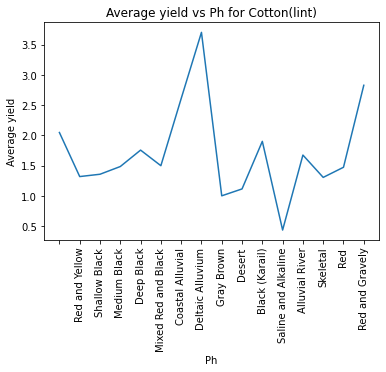

               SoilType  Crop  Production/Area
0                        Gram         1.027654
1        Red and Yellow  Gram         0.833121
2         Shallow Black  Gram         0.851134
3          Medium Black  Gram         0.796512
4            Deep Black  Gram         0.874000
5   Mixed Red and Black  Gram         0.784430
6      Coastal Alluvial  Gram         1.020875
7      Deltaic Alluvium  Gram         1.160352
8             Calcerous  Gram         0.936621
9            Gray Brown  Gram         0.915859
10               Desert  Gram         0.710981
11                Tarai  Gram         0.784510
12       Black (Karail)  Gram         1.239030
13  Saline and Alkaline  Gram         0.924380
14       Alluvial River  Gram         0.899882
15             Skeletal  Gram         0.653803
16   Saline and Deltaic  Gram         0.578495
17                  Red  Gram         0.822688
18      Red and Gravely  Gram         0.811643


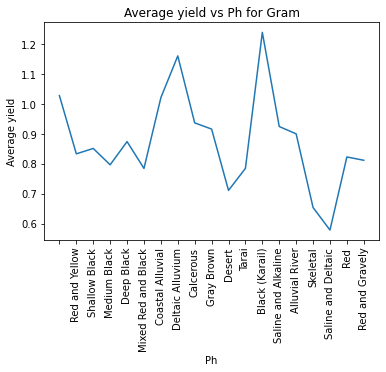

               SoilType       Crop  Production/Area
0                        Groundnut         1.119697
1        Red and Yellow  Groundnut         1.239916
2         Shallow Black  Groundnut         1.135209
3          Medium Black  Groundnut         1.203718
4            Deep Black  Groundnut         1.135126
5   Mixed Red and Black  Groundnut         0.863925
6      Coastal Alluvial  Groundnut         1.454159
7      Deltaic Alluvium  Groundnut         1.443548
8             Calcerous  Groundnut         1.043302
9            Gray Brown  Groundnut         1.440159
10               Desert  Groundnut         1.531471
11                Tarai  Groundnut         1.130039
12       Black (Karail)  Groundnut         1.406292
13  Saline and Alkaline  Groundnut         0.810183
14       Alluvial River  Groundnut         1.080006
15             Skeletal  Groundnut         1.036115
16   Saline and Deltaic  Groundnut         1.071704
17                  Red  Groundnut         1.234520
18      Red 

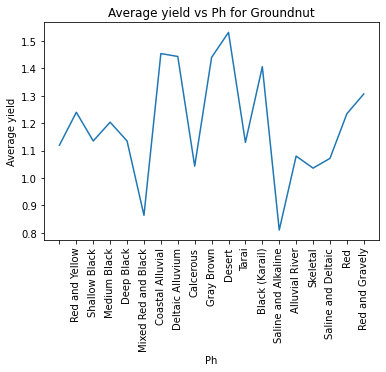

               SoilType   Crop  Production/Area
0                        Jowar         1.008754
1        Red and Yellow  Jowar         1.057438
2         Shallow Black  Jowar         1.168997
3          Medium Black  Jowar         1.191075
4            Deep Black  Jowar         1.079016
5   Mixed Red and Black  Jowar         1.009733
6      Coastal Alluvial  Jowar         1.332035
7      Deltaic Alluvium  Jowar         0.854668
8             Calcerous  Jowar         1.052624
9            Gray Brown  Jowar         0.456709
10               Desert  Jowar         0.509104
11                Tarai  Jowar         0.666667
12       Black (Karail)  Jowar         1.407427
13  Saline and Alkaline  Jowar         1.127948
14       Alluvial River  Jowar         1.095170
15             Skeletal  Jowar         0.721582
16   Saline and Deltaic  Jowar         0.694444
17                  Red  Jowar         0.834837
18      Red and Gravely  Jowar         0.729760


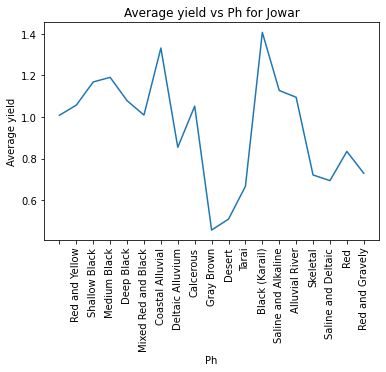

               SoilType  Crop  Production/Area
0                        Jute        10.041380
1        Red and Yellow  Jute         1.955882
2         Shallow Black  Jute         2.486525
3          Medium Black  Jute         1.611197
4            Deep Black  Jute         6.430180
5   Mixed Red and Black  Jute         1.639352
6             Calcerous  Jute         7.122032
7                 Tarai  Jute        11.322308
8   Saline and Alkaline  Jute         1.000000
9        Alluvial River  Jute         7.065770
10   Saline and Deltaic  Jute         7.069177
11                  Red  Jute        13.515185
12      Red and Gravely  Jute        19.545455


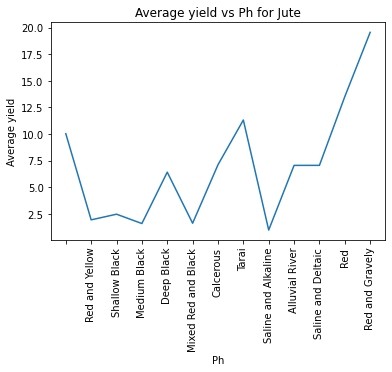

               SoilType   Crop  Production/Area
0                        Maize         3.240295
1        Red and Yellow  Maize         1.463462
2         Shallow Black  Maize         1.674443
3          Medium Black  Maize         2.386224
4            Deep Black  Maize         2.439298
5   Mixed Red and Black  Maize         1.749480
6      Coastal Alluvial  Maize         3.130540
7      Deltaic Alluvium  Maize         1.332407
8             Calcerous  Maize         2.259564
9            Gray Brown  Maize         1.305810
10               Desert  Maize         1.357318
11                Tarai  Maize         2.077268
12       Black (Karail)  Maize         4.858252
13  Saline and Alkaline  Maize         1.758649
14       Alluvial River  Maize         2.143914
15             Skeletal  Maize         1.864284
16   Saline and Deltaic  Maize         1.756732
17                  Red  Maize         2.038419
18      Red and Gravely  Maize         2.028020


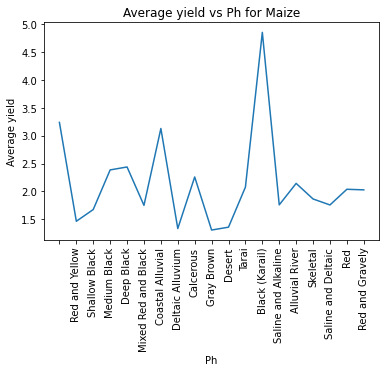

               SoilType        Crop  Production/Area
0                        Niger seed         0.394048
1        Red and Yellow  Niger seed         0.188176
2         Shallow Black  Niger seed         0.221098
3          Medium Black  Niger seed         0.320706
4            Deep Black  Niger seed         0.338406
5   Mixed Red and Black  Niger seed         0.171515
6      Coastal Alluvial  Niger seed         0.355847
7                 Tarai  Niger seed         0.802373
8        Alluvial River  Niger seed         0.275078
9              Skeletal  Niger seed         0.100000
10                  Red  Niger seed         0.287561
11      Red and Gravely  Niger seed         0.267515


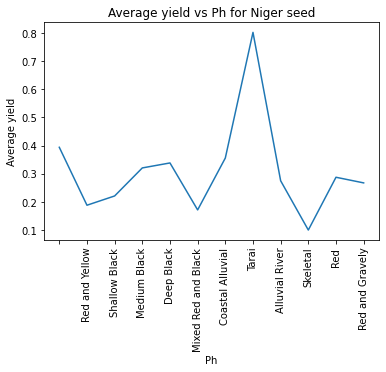

               SoilType  Crop  Production/Area
0                        Ragi         1.036981
1        Red and Yellow  Ragi         0.284930
2         Shallow Black  Ragi         0.268891
3          Medium Black  Ragi         1.282441
4            Deep Black  Ragi         0.999160
5   Mixed Red and Black  Ragi         0.751822
6      Coastal Alluvial  Ragi         1.363819
7             Calcerous  Ragi         1.066764
8                 Tarai  Ragi         1.365964
9        Black (Karail)  Ragi         1.544252
10  Saline and Alkaline  Ragi         1.466667
11       Alluvial River  Ragi         1.459330
12   Saline and Deltaic  Ragi         0.641701
13                  Red  Ragi         0.911188
14      Red and Gravely  Ragi         0.597407


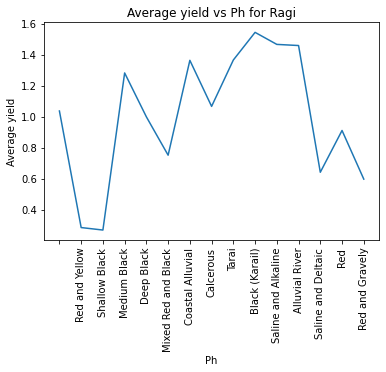

               SoilType  Crop  Production/Area
0                        Rice         1.762267
1        Red and Yellow  Rice         1.388827
2         Shallow Black  Rice         1.260211
3          Medium Black  Rice         2.106114
4            Deep Black  Rice         1.869938
5   Mixed Red and Black  Rice         1.473493
6      Coastal Alluvial  Rice         2.345713
7             Calcerous  Rice         1.332227
8            Gray Brown  Rice         1.523810
9                Desert  Rice         1.990415
10                Tarai  Rice         2.258988
11       Black (Karail)  Rice         2.981846
12  Saline and Alkaline  Rice         2.054806
13       Alluvial River  Rice         2.226897
14             Skeletal  Rice         1.303169
15   Saline and Deltaic  Rice         1.765657
16                  Red  Rice         1.999854
17      Red and Gravely  Rice         1.871795


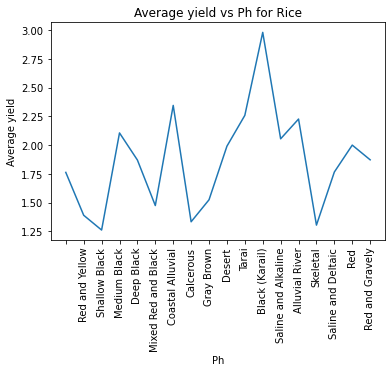

               SoilType       Crop  Production/Area
0                        Safflower         0.575341
1        Red and Yellow  Safflower         0.277958
2         Shallow Black  Safflower         0.302686
3          Medium Black  Safflower         0.618312
4            Deep Black  Safflower         0.528417
5   Mixed Red and Black  Safflower         0.559762
6      Coastal Alluvial  Safflower         1.000000
7             Calcerous  Safflower         0.827686
8                 Tarai  Safflower         1.093750
9        Black (Karail)  Safflower         0.456395
10       Alluvial River  Safflower         0.519279
11             Skeletal  Safflower         0.742222
12   Saline and Deltaic  Safflower         0.866667
13                  Red  Safflower         0.645884
14      Red and Gravely  Safflower         0.414666


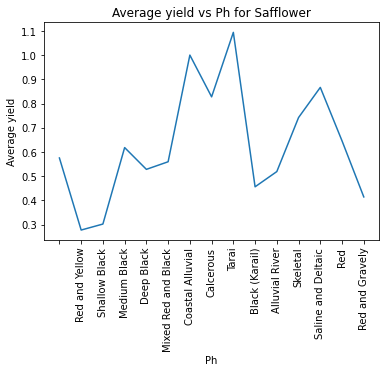

               SoilType     Crop  Production/Area
0                        Sesamum         0.538221
1        Red and Yellow  Sesamum         0.405819
2         Shallow Black  Sesamum         0.331961
3          Medium Black  Sesamum         0.564643
4            Deep Black  Sesamum         0.358530
5   Mixed Red and Black  Sesamum         0.279318
6      Coastal Alluvial  Sesamum         1.072123
7      Deltaic Alluvium  Sesamum         3.599151
8             Calcerous  Sesamum         0.623056
9            Gray Brown  Sesamum         0.262794
10               Desert  Sesamum         0.236120
11                Tarai  Sesamum         0.376473
12       Black (Karail)  Sesamum         0.281661
13  Saline and Alkaline  Sesamum         0.216760
14       Alluvial River  Sesamum         0.421643
15             Skeletal  Sesamum         0.330409
16   Saline and Deltaic  Sesamum         0.313002
17                  Red  Sesamum         0.378318
18      Red and Gravely  Sesamum         0.367117


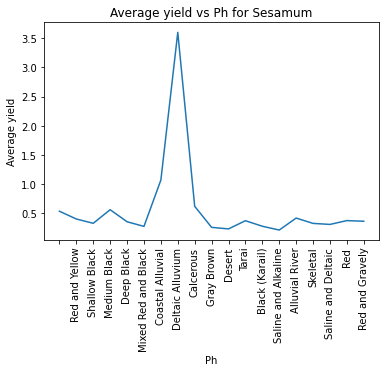

               SoilType      Crop  Production/Area
0                        Soyabean         1.184782
1        Red and Yellow  Soyabean         1.092041
2         Shallow Black  Soyabean         1.081139
3          Medium Black  Soyabean         1.179823
4            Deep Black  Soyabean         1.267629
5   Mixed Red and Black  Soyabean         0.763903
6      Coastal Alluvial  Soyabean         0.759420
7      Deltaic Alluvium  Soyabean         1.000000
8             Calcerous  Soyabean         0.938907
9            Gray Brown  Soyabean         1.111111
10               Desert  Soyabean         1.065866
11                Tarai  Soyabean         1.011261
12       Black (Karail)  Soyabean         1.386670
13  Saline and Alkaline  Soyabean         0.666667
14       Alluvial River  Soyabean         0.945432
15             Skeletal  Soyabean         0.994613
16                  Red  Soyabean         0.826162
17      Red and Gravely  Soyabean         1.433740


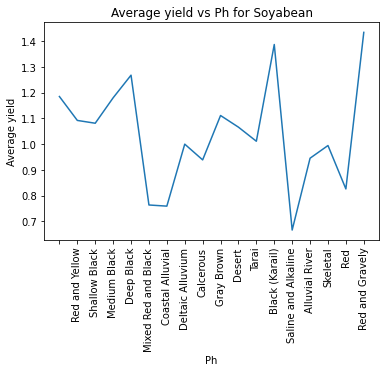

               SoilType       Crop  Production/Area
0                        Sugarcane        59.492641
1        Red and Yellow  Sugarcane         9.607829
2         Shallow Black  Sugarcane        46.710820
3          Medium Black  Sugarcane        64.900986
4            Deep Black  Sugarcane        66.682311
5   Mixed Red and Black  Sugarcane        41.223280
6      Coastal Alluvial  Sugarcane        73.630251
7      Deltaic Alluvium  Sugarcane        73.204082
8             Calcerous  Sugarcane        45.330855
9            Gray Brown  Sugarcane        54.841528
10               Desert  Sugarcane        52.707833
11                Tarai  Sugarcane        69.913166
12       Black (Karail)  Sugarcane        83.376409
13  Saline and Alkaline  Sugarcane        62.304265
14       Alluvial River  Sugarcane       534.882841
15             Skeletal  Sugarcane        61.527778
16   Saline and Deltaic  Sugarcane        51.214441
17                  Red  Sugarcane        69.155194
18      Red 

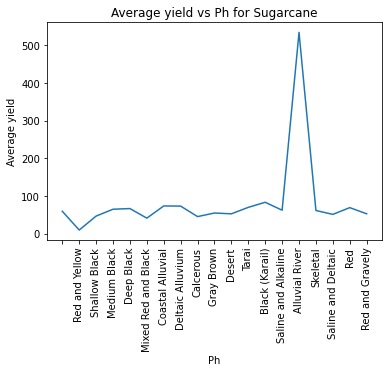

               SoilType       Crop  Production/Area
0                        Sunflower         1.351005
1        Red and Yellow  Sunflower         0.369399
2         Shallow Black  Sunflower         0.416462
3          Medium Black  Sunflower         0.696541
4            Deep Black  Sunflower         0.654061
5   Mixed Red and Black  Sunflower         0.764454
6      Coastal Alluvial  Sunflower         1.024799
7             Calcerous  Sunflower         1.410104
8            Gray Brown  Sunflower         4.000000
9                Desert  Sunflower         1.263203
10                Tarai  Sunflower         0.970308
11       Black (Karail)  Sunflower         0.787840
12  Saline and Alkaline  Sunflower         1.722350
13       Alluvial River  Sunflower         1.068820
14             Skeletal  Sunflower         0.682000
15   Saline and Deltaic  Sunflower         0.597053
16                  Red  Sunflower         1.227705
17      Red and Gravely  Sunflower         0.608072


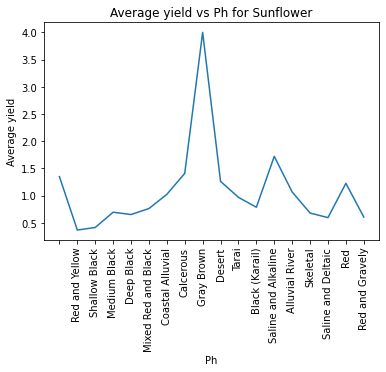

               SoilType  Crop  Production/Area
0                        Urad         0.684382
1        Red and Yellow  Urad         0.310037
2         Shallow Black  Urad         0.283430
3          Medium Black  Urad         0.495729
4            Deep Black  Urad         0.544046
5   Mixed Red and Black  Urad         0.323394
6      Coastal Alluvial  Urad         0.547173
7      Deltaic Alluvium  Urad         0.650683
8             Calcerous  Urad         0.742953
9            Gray Brown  Urad         0.416230
10               Desert  Urad         0.484928
11                Tarai  Urad         0.624268
12       Black (Karail)  Urad         0.605374
13  Saline and Alkaline  Urad         0.515333
14       Alluvial River  Urad         0.490232
15             Skeletal  Urad         0.538486
16   Saline and Deltaic  Urad         0.364409
17                  Red  Urad         0.426584
18      Red and Gravely  Urad         0.458330


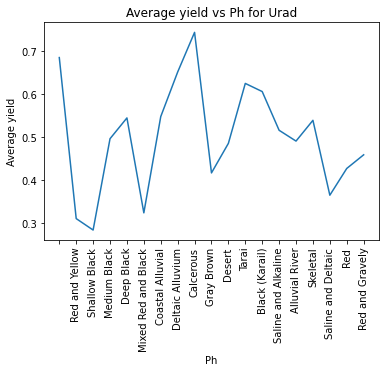

               SoilType   Crop  Production/Area
0                        Wheat         1.629953
1        Red and Yellow  Wheat         1.294254
2         Shallow Black  Wheat         1.745870
3          Medium Black  Wheat         1.492746
4            Deep Black  Wheat         1.688668
5   Mixed Red and Black  Wheat         1.791944
6      Coastal Alluvial  Wheat         2.585529
7      Deltaic Alluvium  Wheat         3.259345
8             Calcerous  Wheat         1.991250
9            Gray Brown  Wheat         2.726929
10               Desert  Wheat         2.114112
11                Tarai  Wheat         2.030732
12       Black (Karail)  Wheat         0.751841
13  Saline and Alkaline  Wheat         3.044447
14       Alluvial River  Wheat         2.788288
15             Skeletal  Wheat         1.171116
16   Saline and Deltaic  Wheat         1.184315
17                  Red  Wheat         1.797418
18      Red and Gravely  Wheat         1.651227


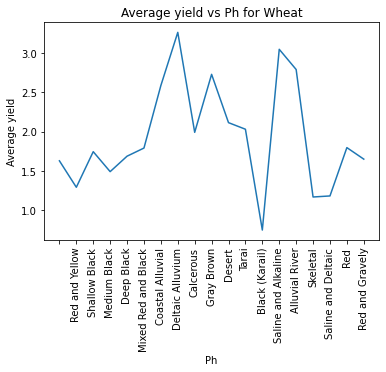

   Ph       Crop  Production/Area
0   4  Arhar/Tur         0.656374
1   5  Arhar/Tur         0.668443
2   6  Arhar/Tur         0.764807
3   7  Arhar/Tur         0.773207
4   8  Arhar/Tur         0.961380


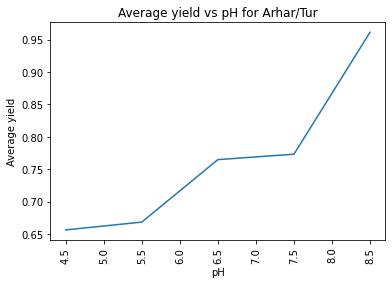

0.6563738313198605
4
0 4.5
0.6684434799388279
5
1 5.5
0.7648072820238533
6
2 6.5
0.7732074175727025
7
3 7.5
0.9613800172346834
8
4 8.5
   Ph   Crop  Production/Area
0   4  Bajra         1.059509
1   5  Bajra         1.007168
2   6  Bajra         1.134833
3   7  Bajra         1.146327
4   8  Bajra         1.330548


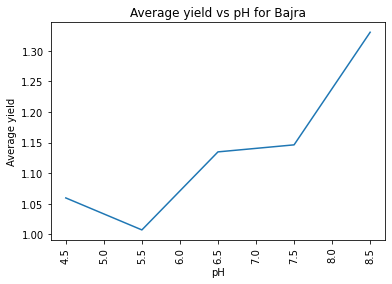

1.059509137374111
4
0 4.5
1 4.5
1.134833253190832
6
2 6.5
1.1463272643372338
7
3 7.5
1.3305477884657402
8
4 8.5
   Ph    Crop  Production/Area
0   4  Barley         1.731563
1   5  Barley         1.831609
2   6  Barley         1.913399
3   7  Barley         2.017212
4   8  Barley         2.199182


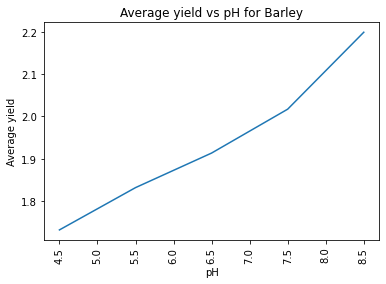

1.731563135470257
4
0 4.5
1.8316087362502642
5
1 5.5
1.9133989505823852
6
2 6.5
2.017211870791008
7
3 7.5
2.199182308630052
8
4 8.5
   Ph          Crop  Production/Area
0   4  Cotton(lint)         1.894856
1   5  Cotton(lint)         1.526983
2   6  Cotton(lint)         1.506502
3   7  Cotton(lint)         1.672074
4   8  Cotton(lint)         1.904982


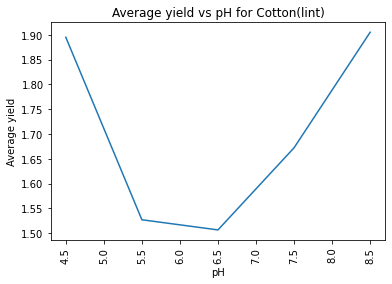

1.8948559479760798
4
0 4.5
1 4.5
2 4.5
3 4.5
1.9049822895606612
8
4 8.5
   Ph  Crop  Production/Area
0   4  Gram         0.800284
1   5  Gram         0.903721
2   6  Gram         0.885488
3   7  Gram         0.850802
4   8  Gram         0.983280


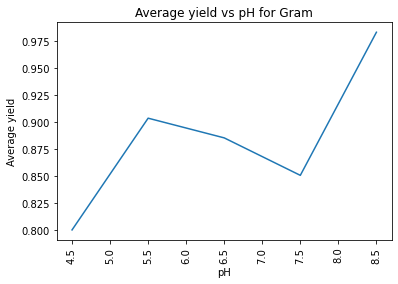

0.800283779249861
4
0 4.5
0.9037207399194418
5
1 5.5
2 5.5
3 5.5
0.9832798562478606
8
4 8.5
   Ph       Crop  Production/Area
0   4  Groundnut         1.200235
1   5  Groundnut         1.189549
2   6  Groundnut         1.068266
3   7  Groundnut         1.139153
4   8  Groundnut         1.222146


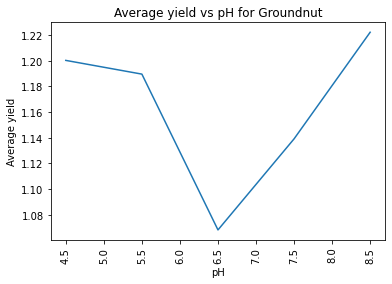

1.2002352318637162
4
0 4.5
1 4.5
2 4.5
3 4.5
1.2221462059578214
8
4 8.5
   Ph   Crop  Production/Area
0   4  Jowar         1.127513
1   5  Jowar         1.052938
2   6  Jowar         0.943503
3   7  Jowar         1.070302
4   8  Jowar         1.179402


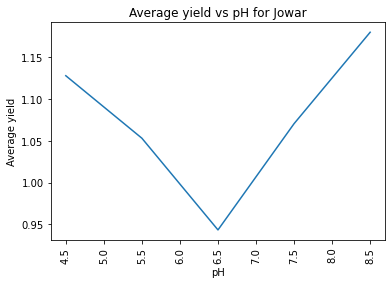

1.1275127892227148
4
0 4.5
1 4.5
2 4.5
3 4.5
1.1794018598133902
8
4 8.5
   Ph  Crop  Production/Area
0   4  Jute         8.007765
1   5  Jute        13.468363
2   6  Jute        12.586695
3   7  Jute         9.273104
4   8  Jute         6.877239


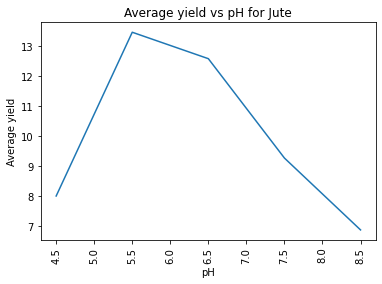

8.007764847061345
4
0 4.5
13.468362643038146
5
1 5.5
2 5.5
3 5.5
4 5.5
   Ph   Crop  Production/Area
0   4  Maize         2.363433
1   5  Maize         2.347149
2   6  Maize         2.182103
3   7  Maize         2.050282
4   8  Maize         2.319531


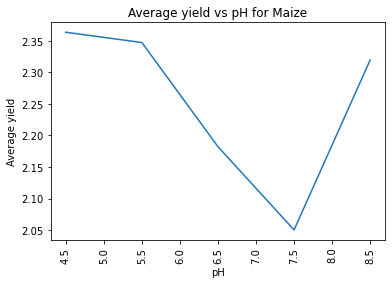

2.363432933727022
4
0 4.5
1 4.5
2 4.5
3 4.5
4 4.5
   Ph        Crop  Production/Area
0   4  Niger seed         0.308682
1   5  Niger seed         0.239570
2   6  Niger seed         0.254250
3   7  Niger seed         0.314412
4   8  Niger seed         0.333333


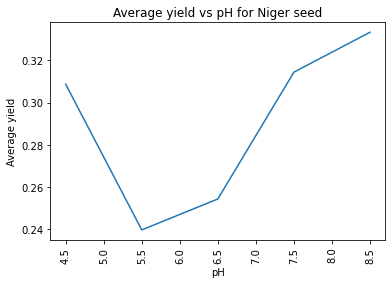

0.30868206539608295
4
0 4.5
1 4.5
2 4.5
0.31441219180263774
7
3 7.5
0.3333333333333333
8
4 8.5
   Ph  Crop  Production/Area
0   4  Ragi         1.066033
1   5  Ragi         1.151042
2   6  Ragi         1.630786
3   7  Ragi         0.997025
4   8  Ragi         1.154761


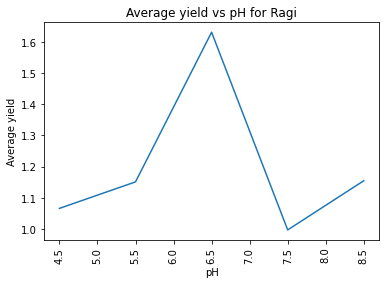

1.0660328389537719
4
0 4.5
1.15104216190096
5
1 5.5
1.6307857295070507
6
2 6.5
3 6.5
4 6.5
   Ph  Crop  Production/Area
0   4  Rice         2.060140
1   5  Rice         2.113842
2   6  Rice         2.313743
3   7  Rice         1.807671
4   8  Rice         2.089805


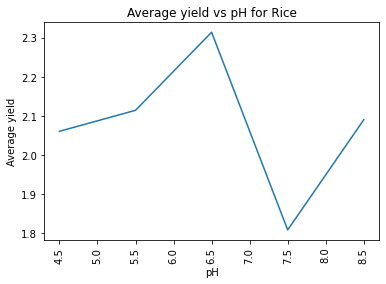

2.060139704872674
4
0 4.5
2.113841686005148
5
1 5.5
2.313742847522125
6
2 6.5
3 6.5
4 6.5
   Ph       Crop  Production/Area
0   4  Safflower         0.508624
1   5  Safflower         0.553536
2   6  Safflower         0.537813
3   7  Safflower         0.517772
4   8  Safflower         0.626398


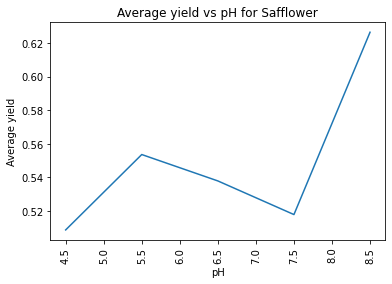

0.5086238036153153
4
0 4.5
0.5535356290418229
5
1 5.5
2 5.5
3 5.5
0.6263984550689042
8
4 8.5
   Ph     Crop  Production/Area
0   4  Sesamum         0.326277
1   5  Sesamum         0.445826
2   6  Sesamum         0.419506
3   7  Sesamum         0.617912
4   8  Sesamum         0.322348


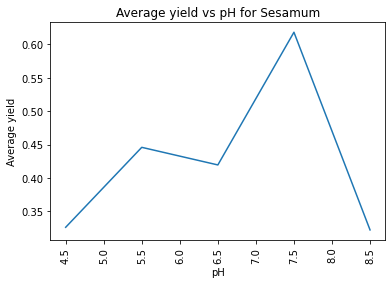

0.3262765607200631
4
0 4.5
0.4458262690162505
5
1 5.5
2 5.5
0.6179118630747573
7
3 7.5
4 7.5
   Ph      Crop  Production/Area
0   4  Soyabean         1.227978
1   5  Soyabean         0.881531
2   6  Soyabean         0.930982
3   7  Soyabean         1.061424
4   8  Soyabean         1.105601


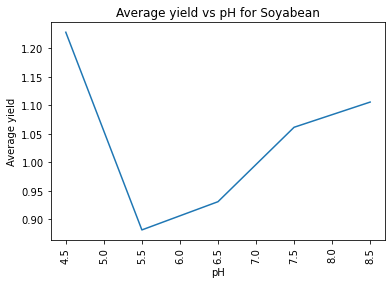

1.227978146201086
4
0 4.5
1 4.5
2 4.5
3 4.5
4 4.5
   Ph       Crop  Production/Area
0   4  Sugarcane       270.392956
1   5  Sugarcane       165.627891
2   6  Sugarcane        62.572115
3   7  Sugarcane       414.945144
4   8  Sugarcane       254.963420


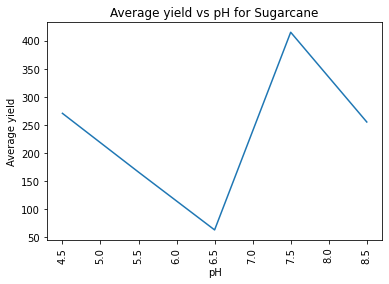

270.39295616762985
4
0 4.5
1 4.5
2 4.5
414.9451436780785
7
3 7.5
4 7.5
   Ph       Crop  Production/Area
0   4  Sunflower         0.844892
1   5  Sunflower         0.795868
2   6  Sunflower         1.311544
3   7  Sunflower         0.745106
4   8  Sunflower         1.427243


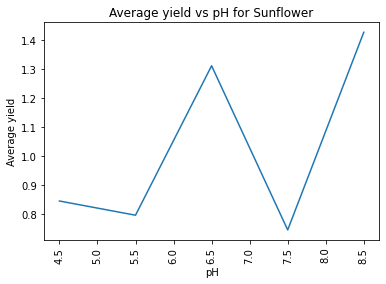

0.8448921938834524
4
0 4.5
1 4.5
1.3115444516592427
6
2 6.5
3 6.5
1.4272432639304022
8
4 8.5
   Ph  Crop  Production/Area
0   4  Urad         0.424627
1   5  Urad         0.443540
2   6  Urad         0.523759
3   7  Urad         0.494448
4   8  Urad         0.601013


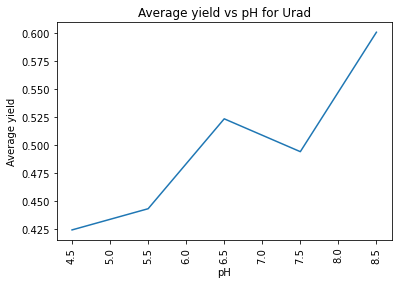

0.4246273577092724
4
0 4.5
0.44354039424831126
5
1 5.5
0.5237593851193796
6
2 6.5
3 6.5
0.6010127419564864
8
4 8.5
   Ph   Crop  Production/Area
0   4  Wheat         1.874671
1   5  Wheat         2.007624
2   6  Wheat         2.474869
3   7  Wheat         2.197055
4   8  Wheat         2.940366


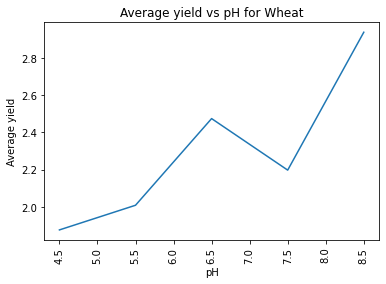

1.874671453603294
4
0 4.5
2.007623614334816
5
1 5.5
2.4748686498079078
6
2 6.5
3 6.5
2.9403656884475096
8
4 8.5
{'Arhar/Tur': 8.5, 'Bajra': 8.5, 'Barley': 8.5, 'Cotton(lint)': 8.5, 'Gram': 8.5, 'Groundnut': 8.5, 'Jowar': 8.5, 'Jute': 5.5, 'Maize': 4.5, 'Moong': 4.5, 'Niger seed': 8.5, 'Ragi': 6.5, 'Rice': 6.5, 'Safflower': 8.5, 'Sesamum': 7.5, 'Soyabean': 4.5, 'Sugarcane': 7.5, 'Sunflower': 8.5, 'Urad': 8.5, 'Wheat': 8.5}


In [ ]:
df = merged_csv
map_district_crop = {}
map_crop_district = {}

for k,v in map_district_rainfall.items():
  if v in map_rainfall_crop:
    map_district_crop[k] = map_rainfall_crop[v]
    map_crop_district[map_rainfall_crop[v]] = k
l = district_df["DISTNAME"].tolist()
l1 = list(map_crop_district.keys())
for crop in l1:
  if map_crop_district[crop] not in l:
    del map_crop_district[crop] 

del map_crop_district['ETAH']
df = df[(df['District_Name'].isin(map_crop_district.keys()))].reset_index(drop=True)
df['Ph'] = df.apply(lambda row: district_ph[map_crop_district[row['District_Name']]] ,axis = 1)
df['SoilType'] = df.apply(lambda row: district_soil[map_crop_district[row['District_Name']]],axis = 1)
# map_crop_district["VALSAD"]

df['Production/Area'] = df.apply(lambda row:row['Production']/row['Area'],axis=1)
df_ = df.groupby(['SoilType','Crop'])['Production/Area'].agg('mean').reset_index()
crops = set(df_["Crop"].tolist())
optim_soil = {}

opt_cat = ""
labels = ["","","Laterite","Red and Yellow","Shallow Black","Medium Black","Deep Black","Mixed Red and Black","Coastal Alluvial","Deltaic Alluvium","Calcerous","Gray Brown","Desert","Tarai","Black (Karail)","Saline and Alkaline","Alluvial River","Skeletal","Saline and Deltaic","Red","Red and Gravely"]
df_['SoilType'] = df_.apply(lambda row : labels[row["SoilType"]],axis=1)
for crop in major_crops:
  if "Moong"==crop:
    continue
    
  mx_prod = 0
  df1 = df_[df_["Crop"]==crop].reset_index(drop=True)
  if df1.shape[0]!=0:
    print(df1)
    # y = [df1.loc[df1["SoilType"]==x,:].reset_index().loc[0,"Production/Area"] for x in labels[2:]]
    plt.plot(df1["SoilType"],df1["Production/Area"])
    plt.xticks(rotation='vertical')
    plt.title("Average yield vs Ph for "+str(crop))
    plt.ylabel("Average yield")
    plt.xlabel("Ph")
    plt.show()
  soil_yield = []
  for i in range(df1.shape[0]):
    soil_yield.append((df1.loc[i,"SoilType"],df1.loc[i,"Production/Area"]))
  
  sorted_soil_type = sorted(soil_yield,key = lambda x: x[1],reverse=True)
  opt_soils = [x[0] for x in sorted_soil_type[:3] if x[0]!='']
  s="\&".join(opt_soils)
  optim_soil[crop] = s
  # for i in range(df1.shape[0]):
  #   if df1.loc[i,"Production/Area"]>mx_prod:
  #     mx_prod=df1.loc[i,"Production/Area"]
  #     opt_cat = df1.loc[i,"SoilType"]
  
  # optim_soil[crop] = opt_cat


df_ = df.groupby(['Ph','Crop'])['Production/Area'].agg('mean').reset_index()
crops = set(df_["Crop"].tolist())
optim_ph = {}
ph_dict = { 4 :"4-5",5:"5-6",6:"6-7",7:"7-8",8:"8-9"}
opt_cat = ""
labels = ["","","Laterite","Red and Yellow","Shallow Black","Medium Black","Deep Black","Mixed Red and Black","Coastal Alluvial","Deltaic Alluvium","Calcerous","Gray Brown","Desert","Tarai","Black (Karail)","Saline and Alkaline","Alluvial River","Skeletal","Saline and Deltaic","Red","Red and Gravely"]

for crop in major_crops:
  mx_prod = 0
  df1 = df_[df_["Crop"]==crop].reset_index(drop=True)
  if df1.shape[0]!=0:
    print(df1)
    df1["ph_r"] = df1.apply(lambda row: row["Ph"]+0.5,axis=1)
    # y = [df1.loc[df1["SoilType"]==x,:].reset_index().loc[0,"Production/Area"] for x in labels[2:]]
    plt.plot(df1["ph_r"],df1["Production/Area"])
    plt.xticks(rotation='vertical')
    plt.title("Average yield vs pH for "+str(crop))
    plt.ylabel("Average yield")
    plt.xlabel("pH")
    plt.show()
  
  for i in range(df1.shape[0]):
    
    if df1.loc[i,"Production/Area"]>mx_prod:
      mx_prod=df1.loc[i,"Production/Area"]
      opt_cat = df1.loc[i,"Ph"]+0.5
      print(df1.loc[i,"Production/Area"])
      print(df1.loc[i,"Ph"])
    print(i,opt_cat)
  
  optim_ph[crop] = opt_cat

# df1 = merged_csv.groupby(['rain_cat','Crop'])['Production'].agg('median').reset_index()
# df1 = df1[df1["Crop"]=="Jute"]
# plt.plot(df["rain_cat"],df["Production"])
# plt.xticks(range(1,cat_max+1))
# plt.show()
# sns.boxplot(x="rain_cat", y="Production", data=df1,showfliers=False)
# merged_csv
print(optim_ph)
# print(crops)
l = [[a,optim_soil[a],optim_ph[a]] for a in list(optim_soil.keys())]
df2 = pd.DataFrame(l,columns=["Crop","Soil Type","PH"])
df2.to_csv("Dataset/ph.csv")


In [ ]:
df3 = merged_csv 

map_district_crop = {}
map_crop_district = {}

for k,v in map_district_rainfall.items():
  if v in map_rainfall_crop:
    map_district_crop[k] = map_rainfall_crop[v]
    map_crop_district[map_rainfall_crop[v]] = k
l = district_df["DISTNAME"].tolist()
l1 = list(map_crop_district.keys())
for crop in l1:
  if map_crop_district[crop] not in l:
    del map_crop_district[crop] 

del map_crop_district['ETAH']
df3 = df3[(df3['District_Name'].isin(map_crop_district.keys()))].reset_index(drop=True)

df3 = df3[(df3['District_Name'].isin(map_crop_district.keys()))].reset_index(drop=True)
df3['Production/Area'] = df3.apply(lambda row: row['Production']/row['Area'] if row['Area']!=0 else np.nan, axis=1)
df3['SoilType'] = df3.apply(lambda row: district_soil[map_crop_district[row['District_Name']]],axis = 1)
# df3['SoilType'] = df3.apply(lambda row : labels[row["SoilType"]],axis=1)
labels = ["","","Laterite","Red and Yellow","Shallow Black","Medium Black","Deep Black","Mixed Red and Black","Coastal Alluvial","Deltaic Alluvium","Calcerous","Gray Brown","Desert","Tarai","Black (Karail)","Saline and Alkaline","Alluvial River","Skeletal","Saline and Deltaic","Red","Red and Gravely"]
df3['SoilType'] = df3.apply(lambda row : labels[row["SoilType"]],axis=1)

df3 = df3[['Crop','Production/Area','Season','SoilType','rainfall']]
# states = set(crop_prod['State_Name'].tolist())
df3 = pd.get_dummies(df3,columns = ["Season","SoilType"],prefix = ['Season_is','SoilType_is'])
# crop_prod = crop_prod[~(crop_prod['Season_is_Whole Year ']==1)].reset_index(drop=True)
print(df3.columns)

df3 = df3.groupby(['Crop'])[ 'Season_is_Autumn     ',
       'Season_is_Kharif     ', 'Season_is_Rabi       ',
       'Season_is_Summer     ', 'Season_is_Whole Year ',
       'Season_is_Winter     ', 'SoilType_is_', 'SoilType_is_Alluvial River',
       'SoilType_is_Black (Karail)', 'SoilType_is_Calcerous',
       'SoilType_is_Coastal Alluvial', 'SoilType_is_Deep Black',
       'SoilType_is_Deltaic Alluvium', 'SoilType_is_Desert',
       'SoilType_is_Gray Brown', 'SoilType_is_Medium Black',
       'SoilType_is_Mixed Red and Black', 'SoilType_is_Red',
       'SoilType_is_Red and Gravely', 'SoilType_is_Red and Yellow',
       'SoilType_is_Saline and Alkaline', 'SoilType_is_Saline and Deltaic',
       'SoilType_is_Shallow Black', 'SoilType_is_Skeletal',
       'SoilType_is_Tarai','rainfall'].agg('mean').reset_index()

print(df3.shape)
df3
# # crops = crop_prod['Crop'].tolist()
# # for crop in crops:
# #   for i in states:
# #     s= 'State_is_'+i
# #     # print(crop_prod[crop_prod['Crop']==crop][s])
# #     crop_prod.loc[crop_prod['Crop']==crop,s] = 0 
# #     # print(crop_prod.loc[crop_prod['Crop']==crop,s])
# #   for i in crop_state[crop]:
# #     s = 'State_is_'+i
# #     crop_prod.loc[crop_prod['Crop']==crop,s] = 1

df_ = df3.drop(columns = ['Crop'],axis=0)
mm_scaler = preprocessing.MinMaxScaler()
l = mm_scaler.fit_transform(df_)
df_ = pd.DataFrame(l, index=df_.index, columns=df_.columns)
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=10000)
tsne_results = tsne.fit_transform(df_)
tsne_results = pd.DataFrame(tsne_results,columns= ['x','y'])
model = KMeans(n_clusters=8).fit(df_)
y_pred = model.labels_
cluster_crops = {}
crops = df3['Crop'].tolist()
for i in range(len(y_pred)):
  if y_pred[i] in cluster_crops:
    cluster_crops[y_pred[i]].append(crops[i])
  else:
    cluster_crops[y_pred[i]] = [crops[i]]
# for i in range():
#   print(cluster_crops[i])
print(cluster_crops)
centroids  = model.cluster_centers_ 
print(centroids)

Index(['Crop', 'Production/Area', 'rainfall', 'Season_is_Autumn     ',
       'Season_is_Kharif     ', 'Season_is_Rabi       ',
       'Season_is_Summer     ', 'Season_is_Whole Year ',
       'Season_is_Winter     ', 'SoilType_is_', 'SoilType_is_Alluvial River',
       'SoilType_is_Black (Karail)', 'SoilType_is_Calcerous',
       'SoilType_is_Coastal Alluvial', 'SoilType_is_Deep Black',
       'SoilType_is_Deltaic Alluvium', 'SoilType_is_Desert',
       'SoilType_is_Gray Brown', 'SoilType_is_Medium Black',
       'SoilType_is_Mixed Red and Black', 'SoilType_is_Red',
       'SoilType_is_Red and Gravely', 'SoilType_is_Red and Yellow',
       'SoilType_is_Saline and Alkaline', 'SoilType_is_Saline and Deltaic',
       'SoilType_is_Shallow Black', 'SoilType_is_Skeletal',
       'SoilType_is_Tarai'],
      dtype='object')
(106, 27)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 106 samples in 0.000s...
[t-SNE] Computed neighbors for 106 samples in 0.003s...
[t-SNE] Computed condit

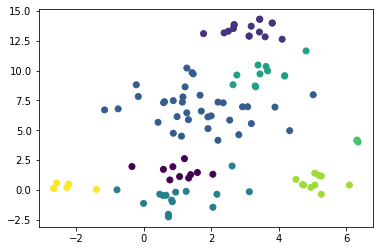

In [ ]:
plt.scatter(tsne_results['x'],tsne_results['y'],c=y_pred.astype('float'))
plt.show()

In [ ]:
for i in range(8):
  print(cluster_crops[i])
# df3[df3["Crop"].isin(cluster_crops[1])]

['Bottle Gourd', 'Cucumber', 'Grapes', 'Peas  (vegetable)', 'other fibres']
['Korra', 'Lemon', 'Pome Granet', 'Samai', 'Sapota', 'Varagu']
['Barley', 'Gram', 'Khesari', 'Linseed', 'Masoor', 'Other  Rabi pulses', 'Peas & beans (Pulses)', 'Rapeseed &Mustard', 'Safflower', 'Wheat', 'other oilseeds']
['Ash Gourd', 'Beet Root', 'Ber', 'Bitter Gourd', 'Carrot', 'Drum Stick', 'Jack Fruit', 'Lab-Lab', 'Litchi', 'Pear', 'Pineapple', 'Pump Kin', 'Redish', 'Ribed Guard', 'Snak Guard', 'Yam']
['Arhar/Tur', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Cowpea(Lobia)', 'Groundnut', 'Horse-gram', 'Jowar', 'Jute', 'Maize', 'Mesta', 'Moong(Green Gram)', 'Moth', 'Niger seed', 'Other Cereals & Millets', 'Other Kharif pulses', 'Ragi', 'Rice', 'Sesamum', 'Small millets', 'Soyabean', 'Sunflower', 'Urad', 'other misc. pulses']
['Ginger', 'Lentil', 'Pulses total', 'Total foodgrain']
['Arcanut (Processed)', 'Arecanut', 'Atcanut (Raw)', 'Black pepper', 'Cardamom', 'Cashewnut', 'Cashewnut Processed', 'Cashewnut Raw',

In [ ]:
df3[df3["Crop"].isin(cluster_crops[2])]

Crop  ...     rainfall
7                   Barley  ...   836.064859
35                    Gram  ...   959.180502
43                 Khesari  ...  1308.358200
48                 Linseed  ...  1018.260359
52                  Masoor  ...   944.388556
60      Other  Rabi pulses  ...  1048.974163
69   Peas & beans (Pulses)  ...  1022.986396
77       Rapeseed &Mustard  ...   956.268154
82               Safflower  ...  1195.927892
101                  Wheat  ...   938.709170
105         other oilseeds  ...   835.695567

[11 rows x 27 columns]

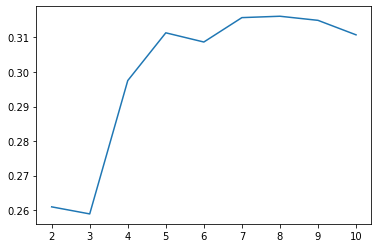

In [ ]:

sil = []
kmax = 10
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k,max_iter=10000).fit(df_)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_, labels, metric = 'euclidean'))
plt.plot(range(2,kmax+1),sil)
plt.xlabel("No. of clusters")
plt.ylabel("Silhouette score")
plt.show()


In [ ]:
df3 = merged_csv 

map_district_crop = {}
map_crop_district = {}

for k,v in map_district_rainfall.items():
  if v in map_rainfall_crop:
    map_district_crop[k] = map_rainfall_crop[v]
    map_crop_district[map_rainfall_crop[v]] = k
l = district_df["DISTNAME"].tolist()
l1 = list(map_crop_district.keys())
for crop in l1:
  if map_crop_district[crop] not in l:
    del map_crop_district[crop] 

del map_crop_district['ETAH']
df3 = df3[(df3['District_Name'].isin(map_crop_district.keys()))].reset_index(drop=True)

df3 = df3[(df3['District_Name'].isin(map_crop_district.keys()))].reset_index(drop=True)
df3['Production/Area'] = df3.apply(lambda row: row['Production']/row['Area'] if row['Area']!=0 else np.nan, axis=1)
df3['SoilType'] = df3.apply(lambda row: district_soil[map_crop_district[row['District_Name']]],axis = 1)
df3['Ph'] = df3.apply(lambda row: district_ph[map_crop_district[row['District_Name']]] ,axis = 1)
# df3['SoilType'] = df3.apply(lambda row : labels[row["SoilType"]],axis=1)
labels = ["","","Laterite","Red and Yellow","Shallow Black","Medium Black","Deep Black","Mixed Red and Black","Coastal Alluvial","Deltaic Alluvium","Calcerous","Gray Brown","Desert","Tarai","Black (Karail)","Saline and Alkaline","Alluvial River","Skeletal","Saline and Deltaic","Red","Red and Gravely"]
df3['SoilType'] = df3.apply(lambda row : labels[row["SoilType"]],axis=1)
min_rain = df3['rainfall'].min(axis=0)
max_rain = df3['rainfall'].max(axis=0)
diff = (max_rain-min_rain)/10
cats = [(min_rain+i*diff,min_rain+(i+1)*diff) for i in range(10)]
print(cats)
df3['rain_cat'] = df3.apply(lambda row:get_rain_category(row["rainfall"],min_rain,max_rain,10),axis=1)
df3 = df3[['State_Name','Production/Area','SoilType','Ph','rain_cat']]
df3 = pd.get_dummies(df3,columns = ["rain_cat","SoilType"],prefix = ['rain_cat_is','SoilType_is'])
print(df3.columns)
df3 = df3.groupby(['State_Name'])[ 'Production/Area', 'Ph', 'rain_cat_is_1', 'rain_cat_is_2',
       'rain_cat_is_3', 'rain_cat_is_4', 'rain_cat_is_5', 'rain_cat_is_6',
       'rain_cat_is_7', 'rain_cat_is_8', 'rain_cat_is_9', 'rain_cat_is_10',
       'rain_cat_is_11',
       'SoilType_is_', 'SoilType_is_Alluvial River',
       'SoilType_is_Black (Karail)', 'SoilType_is_Calcerous',
       'SoilType_is_Coastal Alluvial', 'SoilType_is_Deep Black',
       'SoilType_is_Deltaic Alluvium', 'SoilType_is_Desert',
       'SoilType_is_Gray Brown', 'SoilType_is_Medium Black',
       'SoilType_is_Mixed Red and Black', 'SoilType_is_Red',
       'SoilType_is_Red and Gravely', 'SoilType_is_Red and Yellow',
       'SoilType_is_Saline and Alkaline', 'SoilType_is_Saline and Deltaic',
       'SoilType_is_Shallow Black', 'SoilType_is_Skeletal',
       'SoilType_is_Tarai'].agg('mean').reset_index()


df_ = df3.drop(columns = ['State_Name'],axis=0)
mm_scaler = preprocessing.MinMaxScaler()
l = mm_scaler.fit_transform(df_)
df_ = pd.DataFrame(l, index=df_.index, columns=df_.columns)
tsne = TSNE(n_components=2, verbose=1, perplexity=8, n_iter=10000)
tsne_results = tsne.fit_transform(df_)
tsne_results = pd.DataFrame(tsne_results,columns= ['x','y'])
model = KMeans(n_clusters=10,max_iter=100000000).fit(df_)
print(model.get_params)
y_pred = model.labels_
cluster_crops = {}
crops = df3['State_Name'].tolist()
for i in range(len(y_pred)):
  if y_pred[i] in cluster_crops:
    cluster_crops[y_pred[i]].append(crops[i])
  else:
    cluster_crops[y_pred[i]] = [crops[i]]
# for i in range():
#   print(cluster_crops[i])
print(cluster_crops)
centroids  = model.cluster_centers_ 
print(centroids)


[(188.85, 518.925), (518.925, 849.0), (849.0, 1179.0749999999998), (1179.0749999999998, 1509.1499999999999), (1509.1499999999999, 1839.225), (1839.225, 2169.2999999999997), (2169.2999999999997, 2499.375), (2499.375, 2829.45), (2829.45, 3159.5249999999996), (3159.5249999999996, 3489.6)]
Index(['State_Name', 'Production/Area', 'Ph', 'rain_cat_is_1', 'rain_cat_is_2',
       'rain_cat_is_3', 'rain_cat_is_4', 'rain_cat_is_5', 'rain_cat_is_6',
       'rain_cat_is_7', 'rain_cat_is_8', 'rain_cat_is_9', 'rain_cat_is_10',
       'rain_cat_is_11', 'SoilType_is_', 'SoilType_is_Alluvial River',
       'SoilType_is_Black (Karail)', 'SoilType_is_Calcerous',
       'SoilType_is_Coastal Alluvial', 'SoilType_is_Deep Black',
       'SoilType_is_Deltaic Alluvium', 'SoilType_is_Desert',
       'SoilType_is_Gray Brown', 'SoilType_is_Medium Black',
       'SoilType_is_Mixed Red and Black', 'SoilType_is_Red',
       'SoilType_is_Red and Gravely', 'SoilType_is_Red and Yellow',
       'SoilType_is_Saline and Al

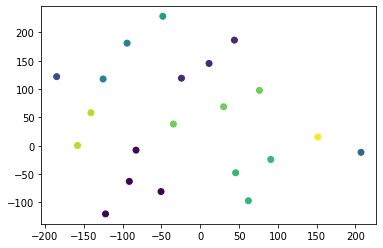

In [ ]:
plt.scatter(tsne_results['x'],tsne_results['y'],c=y_pred.astype('float'))
plt.show()

In [ ]:
for i in range(10):
  print(cluster_crops[i])

['Haryana', 'Punjab', 'Rajasthan', 'Uttar Pradesh']
['Jharkhand', 'Odisha', 'Tamil Nadu']
['Maharashtra']
['Kerala']
['Bihar', 'Telangana ']
['Uttarakhand']
['Karnataka', 'Tripura', 'West Bengal']
['Chhattisgarh', 'Himachal Pradesh', 'Madhya Pradesh']
['Andhra Pradesh', 'Gujarat']
['Arunachal Pradesh']


cluster 0 - rainfall - 1,2, soil majorly - alluvial, ph - 6-8
cluster 1 - rainfall - 3,4 , soil majorly - red, ph - 4-6
cluster 2 - rainfall - 2,3, soil majorly - deep black,ph - 5-7
cluster 3 - rainfall - 7,8,9,10, soil majorly - saline and alkaline
cluster 4 - rainfall - 2,3,4
cluster 5 - rainfall - 4,5 , soil type - calcerous, tarai, ph - 5-6
cluster 6 - rainfall - 4,5,6,7, soil type - alluvial, deep black, ,ph - 5-8 
cluster 7 - rainfall - 3,4, soil type majorly - red and yellow, ph - 4-7
cluster 8 - rainfall - 2,3, soil type majorly alluvial, ph - 5.5-7.5
cluster 9 - rainfall - 7,8,9 , soil type majorly red, ph - 4-5 

In [ ]:
df3[df3["State_Name"].isin(cluster_crops[9])]
print(cluster_crops)



{8: ['Andhra Pradesh', 'Gujarat'], 9: ['Arunachal Pradesh'], 4: ['Bihar', 'Telangana '], 7: ['Chhattisgarh', 'Himachal Pradesh', 'Madhya Pradesh'], 0: ['Haryana', 'Punjab', 'Rajasthan', 'Uttar Pradesh'], 1: ['Jharkhand', 'Odisha', 'Tamil Nadu'], 6: ['Karnataka', 'Tripura', 'West Bengal'], 3: ['Kerala'], 2: ['Maharashtra'], 5: ['Uttarakhand']}


In [ ]:
cluster_crops = {8: ['Andhra Pradesh', 'Gujarat'], 9: ['Arunachal Pradesh'], 4: ['Bihar', 'Telangana '], 7: ['Chhattisgarh', 'Himachal Pradesh', 'Madhya Pradesh'], 0: ['Haryana', 'Punjab', 'Rajasthan', 'Uttar Pradesh'], 1: ['Jharkhand', 'Odisha', 'Tamil Nadu'], 6: ['Karnataka', 'Tripura', 'West Bengal'], 3: ['Kerala'], 2: ['Maharashtra'], 5: ['Uttarakhand']}

crop_prod = pd.read_csv("Dataset/apy.csv",delimiter=',')
crop_prod = crop_prod[~crop_prod['Production'].isna()].reset_index(drop=True)
crop_prod = crop_prod.groupby(['Crop_Year','State_Name','Crop'])['Production','Area'].agg('sum').reset_index()
crop_prod['yield'] = crop_prod.apply(lambda row: row['Production']/row['Area'],axis=1)
crop_prod = crop_prod.groupby(['State_Name','Crop'])['yield'].agg('mean').reset_index()
top20_crops = {}
top10_crops = {}
states = set(crop_prod["State_Name"].tolist())
for st in states:
  df = crop_prod[crop_prod["State_Name"]==st].reset_index(drop=True)
  l = []
  for i in range(df.shape[0]):
    l.append((df.loc[i,"Crop"],df.loc[i,"yield"]))
  l = sorted(l,key=lambda x: x[1],reverse=True)
  l = l[:20]
  top20_crops[st] = l
  top10_crops[st] = l[:10]

print(top20_crops) 

# for i in range(10):
#   states = cluster_crops[i]
#   print(states)
#   print("cluster "+str(i)+" starts")
#   crops = [a for (a,b) in top20_crops[states[0]]]
#   s= set(crops)
#   for st in states:
#     crops = [a for (a,b) in top20_crops[st]]
#     s=s.intersection(crops)

#   print(s)
  
#   print("cluster "+str(i)+" ends")
state_crops ={}
for i in range(10):
  states = cluster_crops[i]
  x=len(states)
  n=0
  if x == 2:
    n=6
  elif x==1:
    n=10
  elif x==3:
    n=5
  elif x==4:
    n=5
  print(n)
  print(states)
  print("cluster "+str(i)+" starts")
  crops = [a for (a,b) in top10_crops[states[0]][:n]]
  s= set(crops)
  for st in states:
    crops = [a for (a,b) in top10_crops[st][:n]]
    s=s.union(crops)

  for st in states:
    state_crops[st] = s
  print(s)
  
  print("cluster "+str(i)+" ends")

print(state_crops)

{'Tamil Nadu': [('Coconut ', 2587.479976582552), ('Sugarcane', 165.27838137647382), ('Cabbage', 61.13508082214483), ('Banana', 42.316564793510445), ('Tapioca', 36.63146253897627), ('Pineapple', 31.158421110379635), ('Dry ginger', 19.76791312423058), ('Grapes', 19.352197105666114), ('Potato', 17.264585497516215), ('Sweet potato', 15.686652849933662), ('Tomato', 11.233330998428892), ('Guar seed', 10.574826298510786), ('Jack Fruit', 10.491388186940469), ('Brinjal', 9.402119553089802), ('Onion', 9.185871784413065), ('Bhindi', 7.226290308720181), ('Pome Fruit', 6.126568544341227), ('Mango', 6.055721237967239), ('Garlic', 5.836191577867946), ('Turmeric', 5.189748561675844)], 'Karnataka': [('Sugarcane', 89.1521552672612), ('Grapes', 29.524784451881693), ('Banana', 18.450958230630146), ('Dry ginger', 16.587386227581206), ('Citrus Fruit', 16.58388558472793), ('Sweet potato', 10.038958111202836), ('Tapioca', 8.884926734755455), ('Coconut ', 8.361815549586385), ('Potato', 8.177601699732854), ('Pe

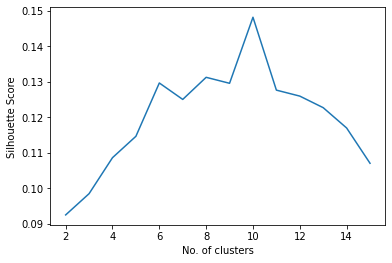

In [ ]:
# sil = []
# kmax = 15
# for k in range(2, kmax+1):
#   kmeans = KMeans(n_clusters = k,max_iter=1000000000).fit(df_)
#   labels = kmeans.labels_
#   sil.append(silhouette_score(df_, labels, metric = 'euclidean'))

plt.plot(range(2,kmax+1),sil)
plt.xlabel("No. of clusters")
plt.ylabel("Silhouette Score")
plt.show()


In [ ]:
df3[df3['State_Name'].isin(cluster_crops[7])]

State_Name  Production/Area  ...  SoilType_is_Skeletal  SoilType_is_Tarai
2      Chhattisgarh         2.233750  ...                   0.0                0.0
5  Himachal Pradesh         1.997578  ...                   0.0                0.0

[2 rows x 28 columns]

In [ ]:
district_df['rainfall'] = district_df.apply(lambda row:dist_rainfall[map_district_rainfall[row['DISTNAME']]],axis=1)
district_df = district_df.drop(['Unnamed: 0'],axis=1)
district_df

DISTNAME  SoilPh  ...  SoilType_is_21  rainfall
0      ADILABAD       7  ...               0    1120.0
1     NIZAMABAD       5  ...               0    1091.9
2    KARIMNAGAR       5  ...               0     979.8
3         MEDAK       6  ...               0     922.3
4      WARANGAL       4  ...               0     986.9
..          ...     ...  ...             ...       ...
258       HUGLI       6  ...               0    1418.7
259     BANKURA       5  ...               0    1330.9
260    PURULIYA       5  ...               0    1363.3
261  BARDDHAMAN       5  ...               0    1315.2
262     BIRBHUM       5  ...               0    1392.8

[263 rows x 23 columns]

In [ ]:
df = district_df.drop(['DISTNAME'],axis=1)
mm_scaler = preprocessing.MinMaxScaler()
l = mm_scaler.fit_transform(df)
df = pd.DataFrame(l, index=df.index, columns=df.columns)
# mm_scaler.transform(X_test)
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=10000)
tsne_results = tsne.fit_transform(df)
tsne_results = pd.DataFrame(tsne_results,columns= ['x','y'])
model = KMeans(n_clusters=13).fit(df)
y_pred = model.labels_
cluster_crops = {}
crops = crop_prod['Crop'].tolist()
for i in range(len(y_pred)):
  if y_pred[i] in cluster_crops:
    cluster_crops[y_pred[i]].append(district_df.loc[i,"DISTNAME"])
  else:
    cluster_crops[y_pred[i]] = [district_df.loc[i,"DISTNAME"]]
# for i in range():
#   print(cluster_crops[i])
print(cluster_crops)
centroids  = model.cluster_centers_ 
print(centroids)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 263 samples in 0.001s...
[t-SNE] Computed neighbors for 263 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 263 / 263
[t-SNE] Mean sigma: 0.177761
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.147766
[t-SNE] KL divergence after 1250 iterations: 0.232453
{2: ['ADILABAD', 'KARIMNAGAR', 'WARANGAL', 'MAHBUBNAGAR', 'KHAMMAM', 'HOSHANGABAD', 'NARSIMHAPUR', 'DHULE', 'JALGAON', 'NASHIK', 'AURANGABAD', 'PARBHANI', 'AHMADNAGAR', 'BID', 'NANDED', 'SATARA', 'SOLAPUR', 'GULBARGA', 'BIJAPUR', 'VADODARA', 'BUNDI', 'KOTA', 'JHALAWAR'], 5: ['NIZAMABAD', 'KURNOOL', 'SIDHI', 'SHAHDOL', 'BULDANA', 'AKOLA', 'AMRAVATI', 'NAGPUR', 'OSMANABAD', 'KOLHAPUR', 'SANGLI', 'BIDAR', 'PANCH-MAHALS', 'THE-DANGS'], 11: ['MEDAK', 'HYDERABAD', 'CHAMPARAN', 'MUZZAFFARPUR', 'DARBHANGA', 'SAHARSA', 'PURNEA', 'SARAN'], 10: ['NALGONDA', 'GUNTUR', 'ANANTAPUR', 'CUDDAPAH', 'NELLORE', 'CHITTOOR'], 4: ['KRISHNA', 'EAST_GOD

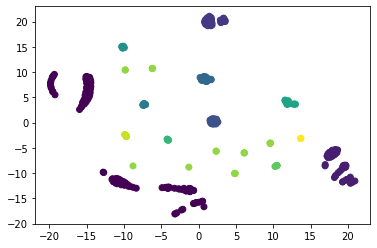

In [ ]:

plt.scatter(tsne_results['x'],tsne_results['y'],c=y_pred.astype('float'))
plt.show()

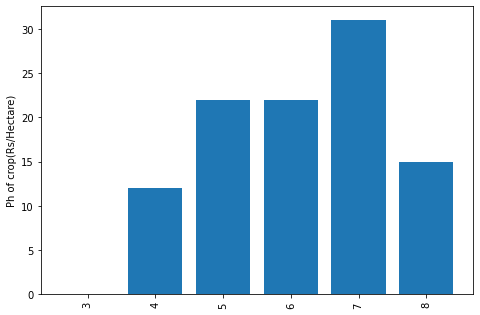

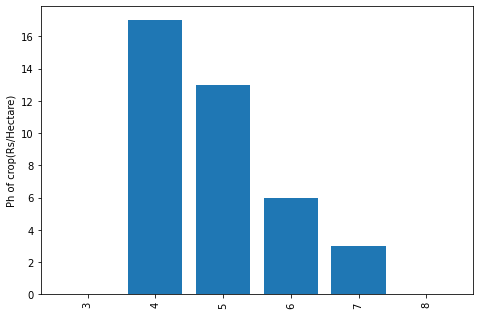

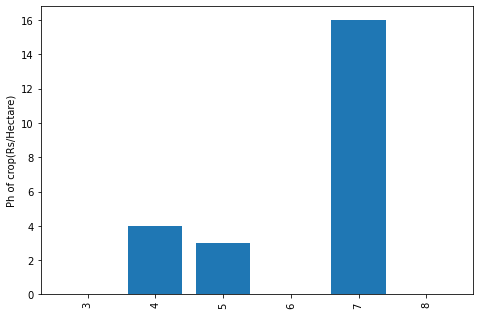

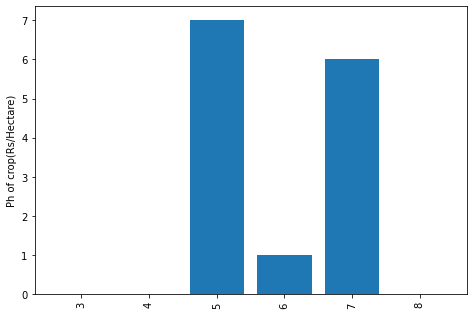

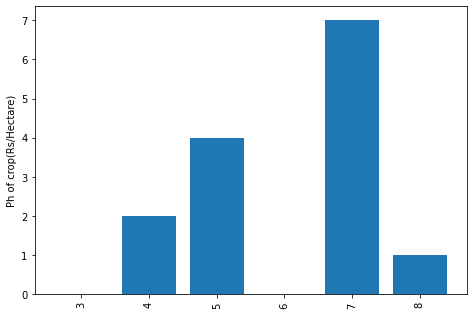

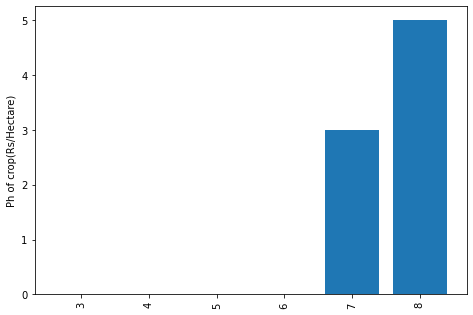

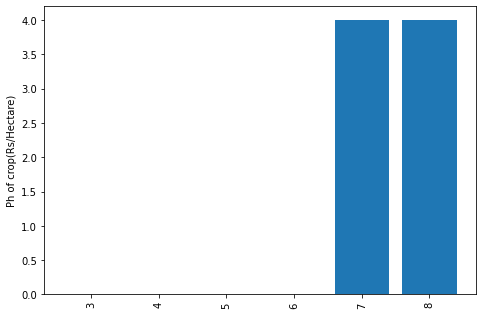

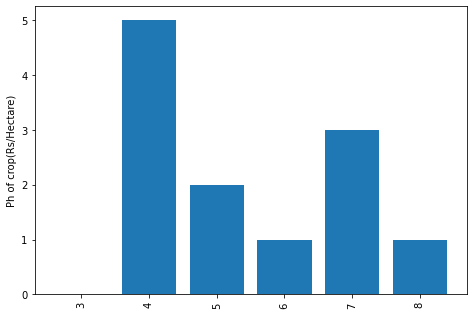

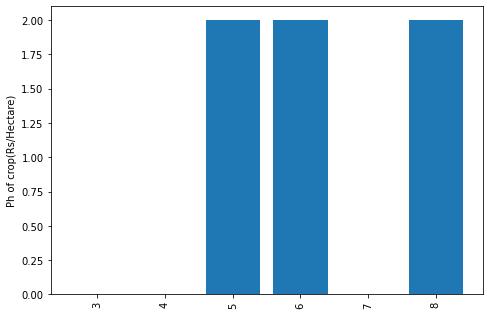

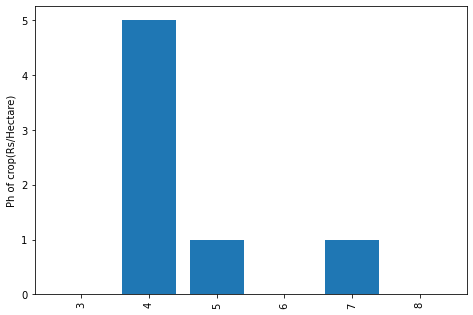

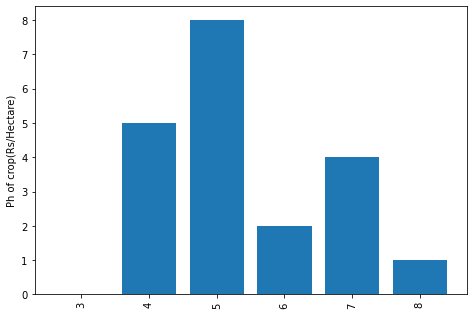

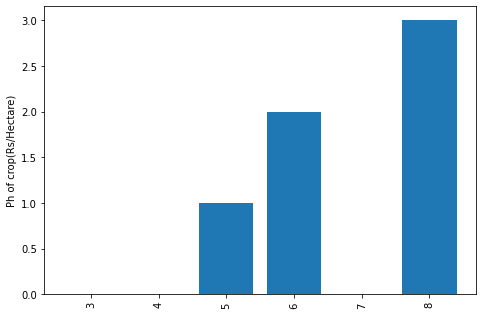

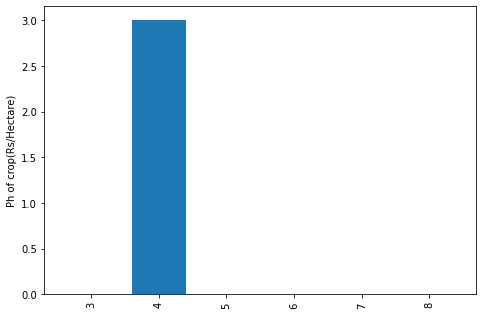

In [ ]:
for i in range(13):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  phs = range(3,9)
  df = district_df[(district_df['DISTNAME'].isin(cluster_crops[i]))].reset_index(drop=True)
  dists = [df[df['SoilPh']==x].shape[0] for x in range(3,9)]

  bars =ax.bar(phs,dists)
  plt.xticks(rotation='vertical')
  plt.ylabel('Ph of crop(Rs/Hectare)')
  plt.show()


**Production share of each crop category in India**

{'Safflower', 'Cardamom', 'Rubber', 'Ash Gourd', 'Oilseeds total', 'Ginger', 'Sunflower', 'Linseed', 'Jobster', 'Garlic', 'Coconut ', 'Cond-spcs other', 'Perilla', 'Coriander', 'Rapeseed &Mustard', 'Dry ginger', 'Sesamum', 'Dry chillies', 'Colocosia', 'Sannhamp', 'Black pepper', 'Turmeric', 'Tobacco'}


([<matplotlib.patches.Wedge at 0x7f2c4dc87ba8>,
 [Text(3.2825635562273905, 0.33878680512645143, 'Beans'),
  Text(1.1917472320594549, 3.0772940280185495, 'Cereal'),
  Text(-2.282505054707015, 2.383310864162904, 'Fibres'),
  Text(-2.6886321341422303, 1.913441205592113, 'Fruits'),
  Text(-2.847927550427, 1.6671258703285938, 'Nuts'),
  Text(-2.963105964639526, 1.4525849518419445, 'Pulses'),
  Text(-3.0218005372489345, 1.3261679807181486, 'Seeds'),
  Text(-1.3638128609558433, -3.0049982496320093, 'Sugarcane'),
  Text(2.9788462297652196, -1.420026457293503, 'Tea-Coffee'),
  Text(3.0793223978421755, -1.1864963422394164, 'Totals'),
  Text(3.2651406893379367, -0.478389254509114, 'Vegetables')],
 [Text(1.7904892124876672, 0.18479280279624619, '3.3%'),
  Text(0.6500439447597026, 1.678524015282845, '31.7%'),
  Text(-1.245002757112917, 1.2999877440888565, '4.4%'),
  Text(-1.4665266186230344, 1.0436952030502433, '1.6%'),
  Text(-1.553415027505636, 0.9093413838155965, '1.2%'),
  Text(-1.6162396170761

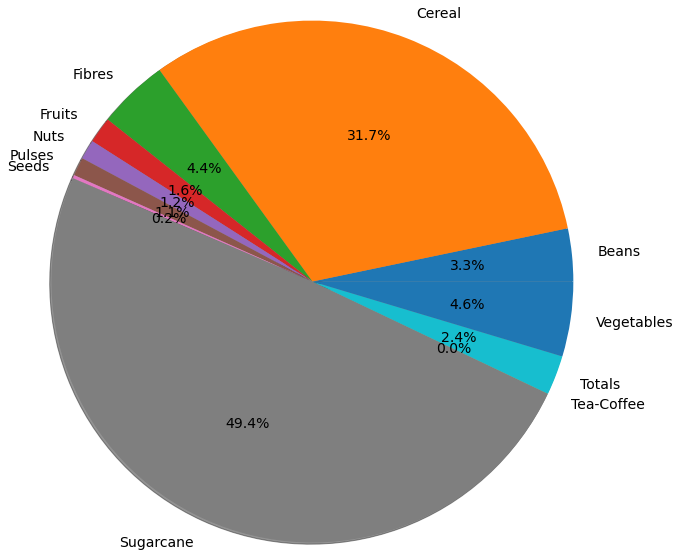

In [ ]:
residuals = set([])
def get_cat(crop):
  if crop in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar','Paddy']:
    return 'Cereal'
  if crop in ['Moong','Moong(Green Gram)','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total']:
    return 'Pulses'
  if crop in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana','Other Dry Fruit']:
    return 'Fruits'
  if crop in ['Bean','Lab-Lab','Moth','Guar seed','Tapioca','Soyabean','Horse-gram','Gram']:
    return 'Beans'
  if crop in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Other Vegetables','Peas  (vegetable)']:
    return 'Vegetables'
  if crop in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)']:
    return 'Fibres'
  if crop in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
    return 'Nuts'
  if crop in ['Tea','Coffee']:
    return 'Tea-Coffee'
  if crop in ['Castor seed','Niger seed','other oilseeds']:
    return "Seeds"
  if crop=='Sugarcane':
    return 'Sugarcane'
  if crop =='Coconut':
    return 'Coconut'
  if "Total" in crop:
    return "Totals"
  else:
    # print(crop)
    residuals.add(crop)
    return "Others"
  

crop_prod = pd.read_csv('Dataset/apy.csv',delimiter=',')
crop_prod['crop_cat'] = crop_prod.apply(lambda row: get_cat(row['Crop']),axis=1)
df = crop_prod.groupby(['crop_cat','Crop_Year'])['Production'].agg('sum').reset_index()
df = df.groupby(['crop_cat'])['Production'].agg('mean').reset_index()
df = df[~(df['crop_cat']=='Others')].reset_index()
type_cnt = df['Production']
type_labels = df['crop_cat']
print(residuals)
plt.rcParams['font.size'] = 14.0
plt.pie(type_cnt, labels=type_labels,radius = 3, autopct='%1.1f%%', shadow=True)
# plt.savefig('Dataset/Prod_share.jpg')

{'Safflower', 'Cardamom', 'Rubber', 'Ash Gourd', 'Oilseeds total', 'Ginger', 'Sunflower', 'Linseed', 'Jobster', 'Garlic', 'Coconut ', 'Cond-spcs other', 'Perilla', 'Coriander', 'Rapeseed &Mustard', 'Dry ginger', 'Sesamum', 'Dry chillies', 'Colocosia', 'Sannhamp', 'Black pepper', 'Turmeric', 'Tobacco'}


([<matplotlib.patches.Wedge at 0x7f2c4e18c0f0>,
 [Text(3.09742453117958, 1.138402948716736, 'Beans'),
  Text(-2.7934186997401356, 1.7569325450745488, 'Cereal'),
  Text(-0.21122835599983286, -3.2932328465539165, 'Fibres'),
  Text(0.4575322593838248, -3.2681285518815097, 'Fruits'),
  Text(0.9040270900151434, -3.1737572403255347, 'Nuts'),
  Text(2.01271797205229, -2.6151417485439903, 'Pulses'),
  Text(2.6467141322622667, -1.9710160583017073, 'Seeds'),
  Text(2.8459152064197326, -1.6705587801298498, 'Sugarcane'),
  Text(2.979145181880723, -1.4193991634761787, 'Tea-Coffee'),
  Text(3.184454761898302, -0.8655910520697591, 'Totals'),
  Text(3.296874702102261, -0.14358690273882693, 'Vegetables')],
 [Text(1.6895042897343162, 0.6209470629364013, '11.2%'),
  Text(-1.5236829271309829, 0.9583268427679356, '59.7%'),
  Text(-0.11521546690899973, -1.796308825393045, '6.1%'),
  Text(0.24956305057299533, -1.7826155737535505, '0.3%'),
  Text(0.49310568546280537, -1.7311403129048368, '4.1%'),
  Text(1.097

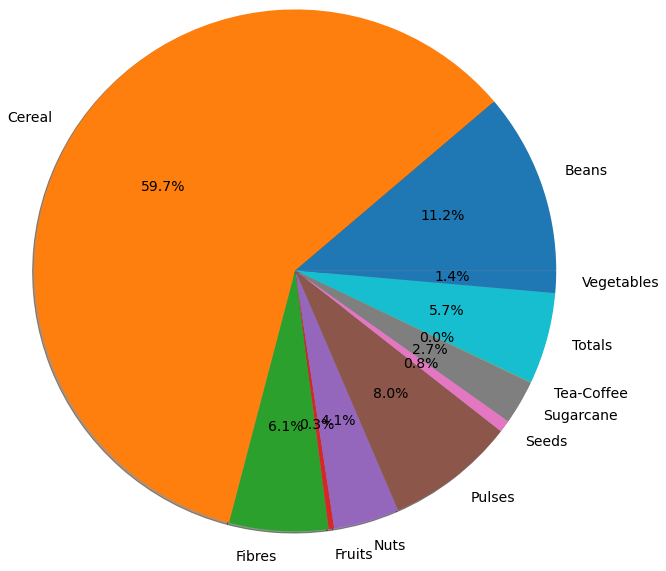

In [ ]:
residuals = set([])
crop_prod = pd.read_csv('Dataset/apy.csv',delimiter=',')
crop_prod['crop_cat'] = crop_prod.apply(lambda row: get_cat(row['Crop']),axis=1)
df = crop_prod.groupby(['crop_cat','Crop_Year'])['Area'].agg('sum').reset_index()
df = df.groupby(['crop_cat'])['Area'].agg('mean').reset_index()
df = df[~(df['crop_cat']=='Others')].reset_index()
type_cnt = df['Area']
type_labels = df['crop_cat']
print(residuals)
plt.rcParams['font.size'] = 14.0
plt.pie(type_cnt, labels=type_labels,radius = 3, autopct='%1.1f%%', shadow=True)
# plt.savefig('Dataset/Prod_share.jpg')

**Crop Price over years**

['Arhar/Tur', 'Bajra', 'Barley', 'Cotton(lint)', 'Gram', 'Groundnut', 'Jowar', 'Jute', 'Maize', 'Moong(Green Gram)', 'Niger seed', 'Ragi', 'Rapeseed &Mustard', 'Rice', 'Safflower', 'Sesamum', 'Soyabean', 'Sugarcane', 'Sunflower', 'Urad', 'Wheat']


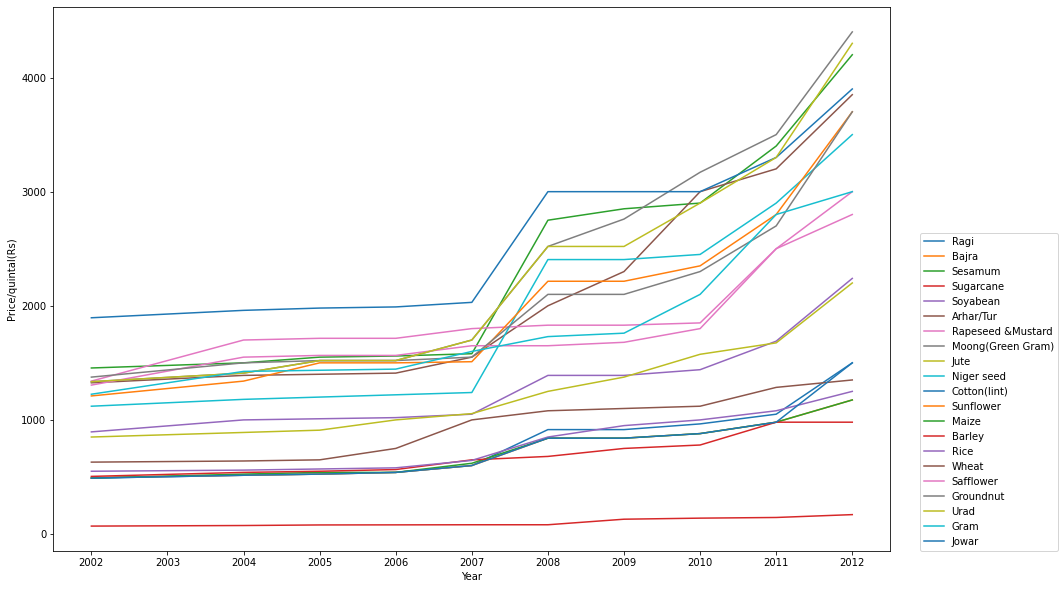

21
{'Ragi': 101.0, 'Bajra': 68.0, 'Sesamum': 274.5, 'Sugarcane': 10.05, 'Soyabean': 134.5, 'Arhar/Tur': 252.5, 'Rapeseed &Mustard': 166.0, 'Moong(Green Gram)': 306.5, 'Jute': 135.0, 'Niger seed': 238.0, 'Cotton(lint)': 200.5, 'Sunflower': 249.0, 'Maize': 68.5, 'Barley': 47.5, 'Rice': 70.0, 'Wheat': 72.0, 'Safflower': 149.5, 'Groundnut': 232.5, 'Urad': 296.5, 'Gram': 177.5, 'Jowar': 101.0}


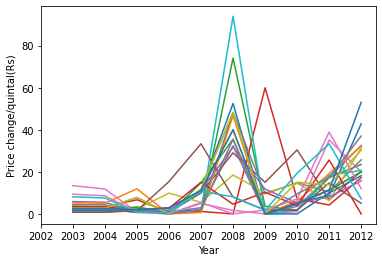

In [ ]:
revenue = pd.read_csv('Dataset/revenue.csv',delimiter=',')
revenue['Revenue per hectare'] = revenue.apply(lambda row: row['Revenue per hectare']*10, axis=1)
plts = []
leg = []
price_slope = {}
crops = set(revenue['Crop'].tolist())
print(sorted(list(crops)))
plt.figure(figsize=(15,10))
for crop in crops:
  df = revenue[revenue['Crop']==crop].reset_index(drop=True)
  # print(df.loc[df['Crop_Year']==2002,'Price per quintal'])
  st = df.loc[df['Crop_Year']==2002,:].reset_index().loc[0,'Price per quintal']
  fin = df.loc[df['Crop_Year']==2012,:].reset_index().loc[0,'Price per quintal']
  # print(st)
  price_slope[crop] =  (fin - st)/10
  x, = plt.plot(df['Crop_Year'],df['Price per quintal'])
  plts.append(x)
  leg.append(crop)
# plt
plt.xticks(range(2002, 2013))
plt.xlabel('Year')
plt.ylabel('Price/quintal(Rs)')
plt.legend(plts,leg,loc='lower right',borderaxespad=0.,bbox_to_anchor=(1.2, 0))
plt.savefig('Dataset/crop_prices.png')
plt.show()

print(len(crops))
print(price_slope)


for crop in crops:
  df = revenue[revenue['Crop']==crop].reset_index(drop=True)
  df['price change%'] = df['Price per quintal'].pct_change().mul(100).round(2)
  # print(df.loc[df['Crop_Year']==2002,'Price per quintal'])
  st = df.loc[df['Crop_Year']==2002,:].reset_index().loc[0,'Price per quintal']
  fin = df.loc[df['Crop_Year']==2012,:].reset_index().loc[0,'Price per quintal']
  # print(st)
  price_slope[crop] =  (fin - st)/10
  x, = plt.plot(df['Crop_Year'],df['price change%'])
  plts.append(x)
  leg.append(crop)
plt.xticks(range(2002, 2013))
plt.xlabel('Year')
plt.ylabel('Price change/quintal(Rs)')
plt.savefig('Dataset/crop_price_chng.png')
plt.show()


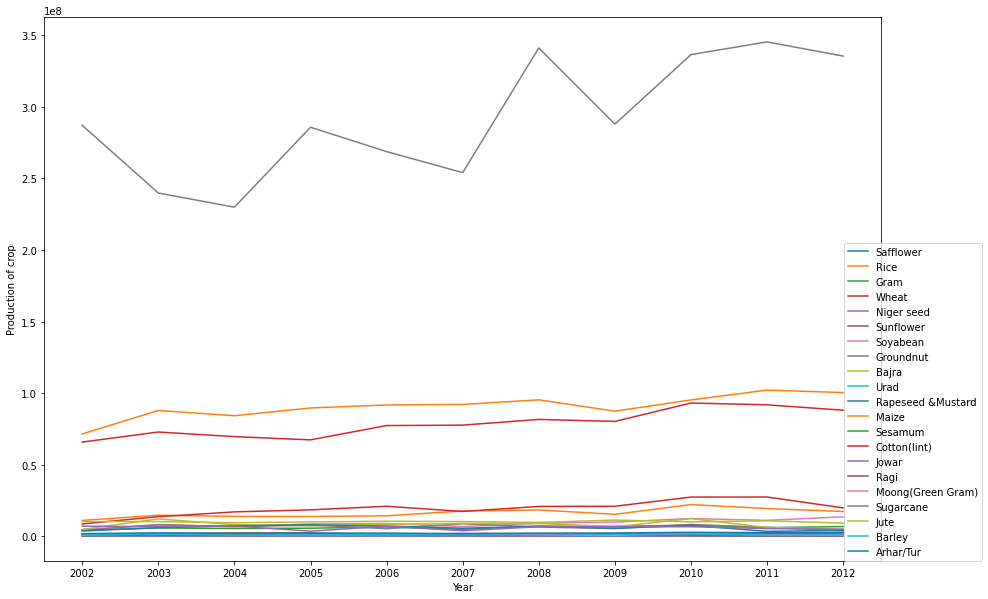

In [ ]:
revenue = pd.read_csv('Dataset/revenue.csv',delimiter=',')
plts = []
leg = []
crops = set(revenue['Crop'].tolist())
plt.figure(figsize=(15,10))
for crop in crops:
  
  df = revenue[revenue['Crop']==crop].reset_index(drop=True)
  # print(df)
  if crop in ['Sugarcane','Wheat','Rice']:
    x, =plt.plot(df['Crop_Year'],df['Production in quintals'])
    plts.append(x)
    leg.append(crop)
  else:
    x, =plt.plot(df['Crop_Year'],df['Production in quintals'])
    plts.append(x)
    leg.append(crop)

plt.ylabel('Production of crop')
plt.xlabel('Year')
plt.xticks(range(2002,2013))
plt.legend(plts,leg,loc='lower right',borderaxespad=0.,bbox_to_anchor = (1.12,0))

plt.show()

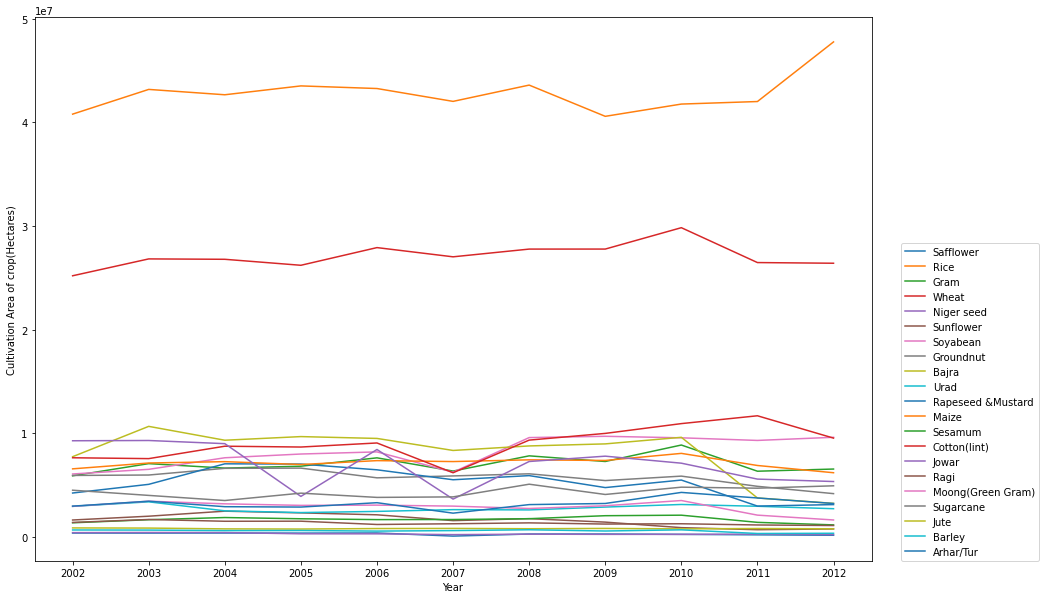

In [ ]:
revenue = pd.read_csv('Dataset/revenue.csv',delimiter=',')
plts = []
leg = []
crops = set(revenue['Crop'].tolist())
plt.figure(figsize=(15,10))
for crop in crops:
  
  df = revenue[revenue['Crop']==crop].reset_index(drop=True)
  # print(df)
  if crop in ['Sugarcane','Wheat','Rice']:
    x, =plt.plot(df['Crop_Year'],df['Area in Hectares'])
    plts.append(x)
    leg.append(crop)
  else:
    x, =plt.plot(df['Crop_Year'],df['Area in Hectares'])
    plts.append(x)
    leg.append(crop)

plt.ylabel('Cultivation Area of crop(Hectares)')
plt.xlabel('Year')
plt.xticks(range(2002,2013))
plt.legend(plts,leg,loc='lower right',borderaxespad=0.,bbox_to_anchor = (1.2,0))

plt.show()


In [ ]:
revenue

Area in Hectares        Crop  ...  Production in quintals  Revenue per hectare
0         40795160.29        Rice  ...             71453399.67               963.33
1         43181631.06        Rice  ...             87835972.97              1128.93
2         42664665.23        Rice  ...             84172521.28              1104.82
3         43519563.58        Rice  ...             89587185.75              1173.37
4         43266797.59        Rice  ...             91676287.34              1228.94
..                ...         ...  ...                     ...                  ...
226         259498.00  Niger seed  ...                67192.00               622.73
227         242010.00  Niger seed  ...                57231.00               568.74
228         240962.00  Niger seed  ...                57060.00               580.16
229         262029.00  Niger seed  ...                58165.90               643.75
230         215159.00  Niger seed  ...                63848.00              1038.62

[231 rows x 6 columns]

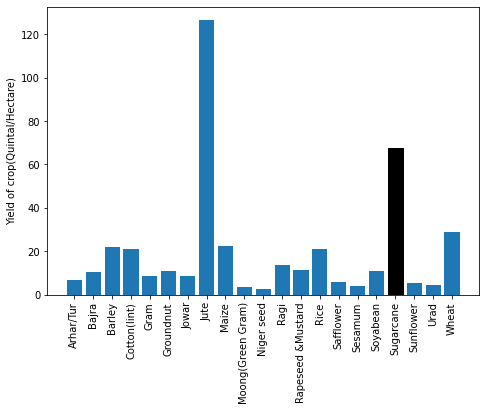

Index(['Area in Hectares', 'Crop', 'Crop_Year', 'Price per quintal',
       'Production in quintals', 'Revenue per hectare', 'yield'],
      dtype='object')

In [ ]:
revenue = pd.read_csv('Dataset/revenue.csv',delimiter=',')
revenue['Revenue per hectare'] = revenue.apply(lambda row: row['Revenue per hectare']*10, axis=1)

revenue['yield'] = revenue.apply(lambda row: row['Production in quintals']*10/row['Area in Hectares'] if row['Crop']!='Sugarcane' else row['Production in quintals']*10/(10*row['Area in Hectares']),axis=1)
df = revenue.groupby(['Crop'])['yield'].agg('mean').reset_index()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
crop = df['Crop'].tolist()
yld = df['yield'].tolist()
bars =ax.bar(crop,yld)
bars[-4].set_color('black')
plt.xticks(rotation='vertical')
plt.ylabel('Yield of crop(Quintal/Hectare)')
plt.show()
revenue.columns

{'Gram', 'Ragi', 'Groundnut', 'Rice', 'Sunflower', 'Jowar', 'Safflower', 'Rapeseed &Mustard', 'Bajra', 'Niger seed', 'Sugarcane', 'Arhar/Tur', 'Maize', 'Moong(Green Gram)', 'Urad', 'Sesamum', 'Soyabean', 'Wheat', 'Cotton(lint)', 'Jute', 'Barley'}


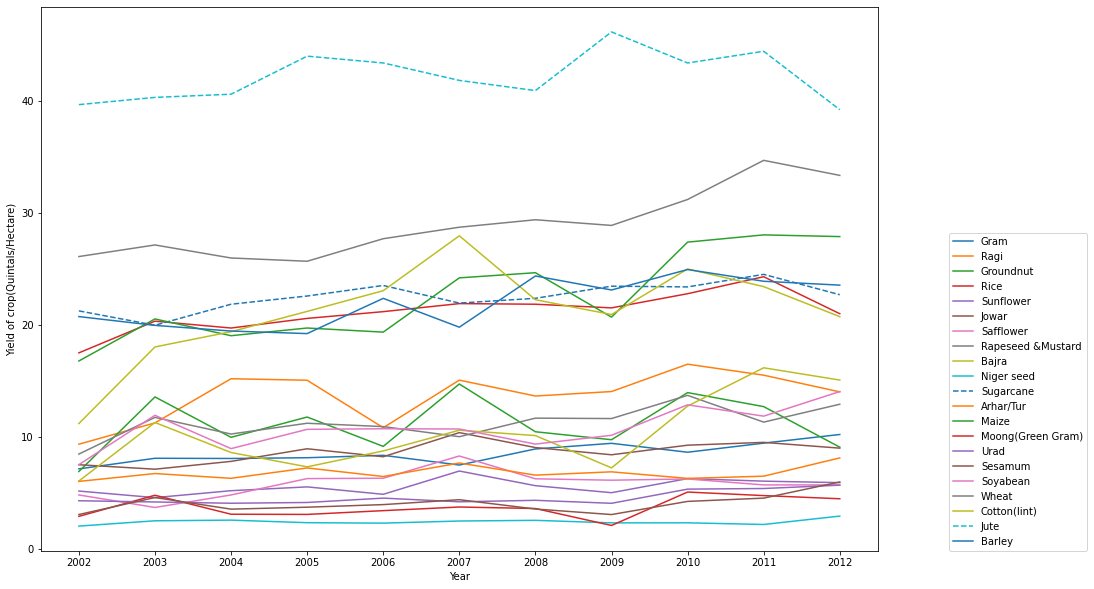

In [ ]:
plts = []
leg = []
crops = set(revenue['Crop'].tolist())
print(crops)
plt.figure(figsize=(15,10))
for crop in crops:
  
  df = revenue[revenue['Crop']==crop].reset_index(drop=True)
  # print(df)
  if crop in ['Sugarcane','Jute']:
    x, =plt.plot(df['Crop_Year'],df['yield']/3,'--')
    plts.append(x)
    leg.append(crop)
  else:
    x, =plt.plot(df['Crop_Year'],df['yield'])
    plts.append(x)
    leg.append(crop)

plt.ylabel('Yield of crop(Quintals/Hectare)')
plt.xlabel('Year')
plt.xticks(range(2002,2013))
plt.legend(plts,leg,loc='lower right',borderaxespad=0.,bbox_to_anchor = (1.25,0))

plt.show()

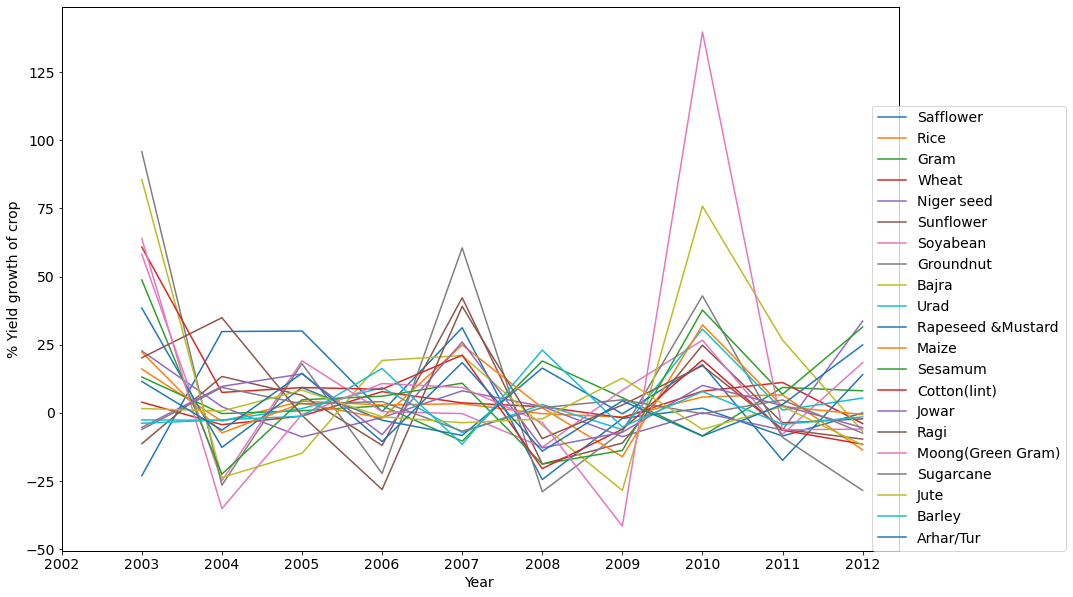

In [ ]:

plts = []
leg = []
crops = set(revenue['Crop'].tolist())
plt.figure(figsize=(15,10))
for crop in crops:
  
  df = revenue[revenue['Crop']==crop].reset_index(drop=True)
  df['yield change%'] = df['yield'].pct_change().mul(100).round(2)
  # print(df)
  if crop in ['Sugarcane','Wheat','Rice']:
    x, =plt.plot(df['Crop_Year'],df['yield change%'])
    plts.append(x)
    leg.append(crop)
  else:
    x, =plt.plot(df['Crop_Year'],df['yield change%'])
    plts.append(x)
    leg.append(crop)

plt.ylabel('% Yield growth of crop')
plt.xlabel('Year')
plt.xticks(range(2002,2013))
plt.legend(plts,leg,loc='lower right',borderaxespad=0.,bbox_to_anchor = (1.2,0))

plt.show()

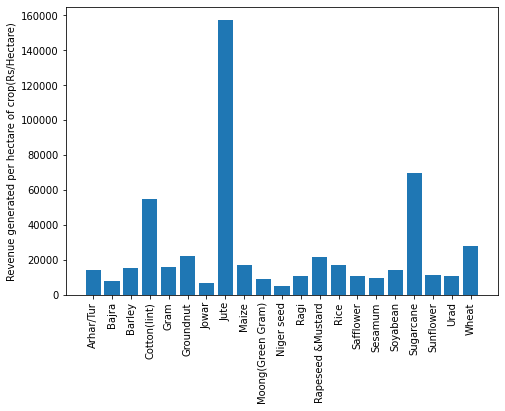

Index(['Area in Hectares', 'Crop', 'Crop_Year', 'Price per quintal',
       'Production in quintals', 'Revenue per hectare', 'yield'],
      dtype='object')

In [ ]:

df = revenue.groupby(['Crop'])['Revenue per hectare'].agg('mean').reset_index()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
crop = df['Crop'].tolist()
yld = df['Revenue per hectare'].tolist()
bars =ax.bar(crop,yld)
plt.xticks(rotation='vertical')
plt.ylabel('Revenue generated per hectare of crop(Rs/Hectare)')
plt.show()
revenue.columns

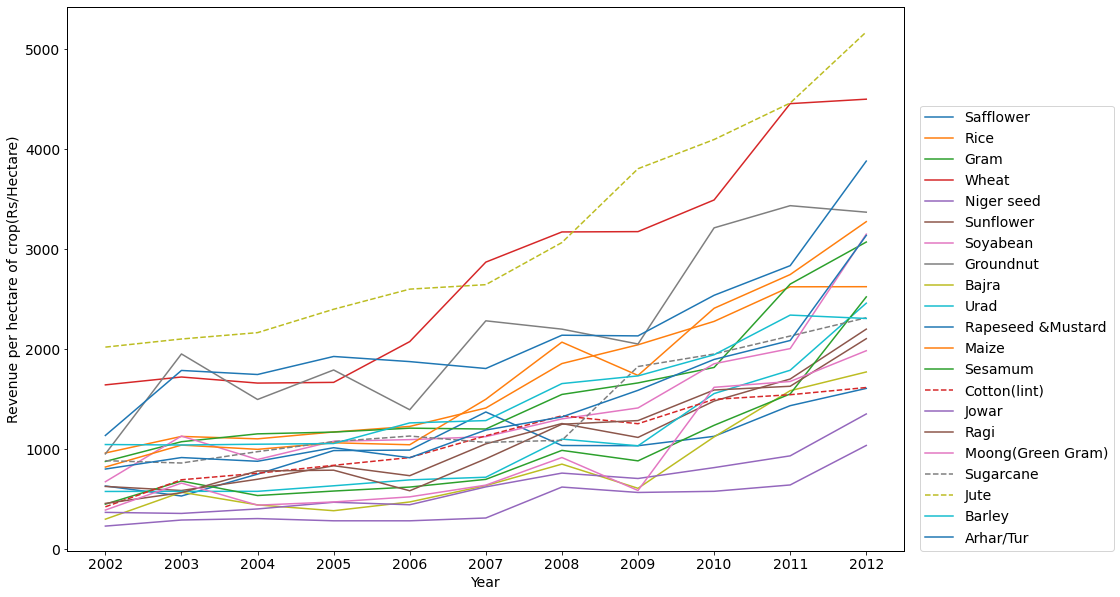

In [ ]:
plts = []
leg = []
crops = set(revenue['Crop'].tolist())
plt.figure(figsize=(15,10))
for crop in crops:
  
  df = revenue[revenue['Crop']==crop].reset_index(drop=True)
  # print(df)
  if crop in ['Cotton(lint)','Jute','Sugarcane']:
    x, =plt.plot(df['Crop_Year'],df['Revenue per hectare']/5,'--')
    plts.append(x)
    leg.append(crop)
  else:
    x, =plt.plot(df['Crop_Year'],df['Revenue per hectare'])
    plts.append(x)
    leg.append(crop)

plt.ylabel('Revenue per hectare of crop(Rs/Hectare)')
plt.xlabel('Year')
plt.xticks(range(2002,2013))
plt.legend(plts,leg,loc='lower right',borderaxespad=0.,bbox_to_anchor = (1.25,0))

plt.show()

975.86
1662.2600000000002
2193.27
2855.8
806.0699999999999
1572.3700000000001
2474.88
2416.29
1471.67
1882.1599999999999
2742.58
2452.93
2071.79
5963.37
983.75
1646.4900000000002
1592.6
7143.28
15754.490000000002
1260.2600000000002
2335.56


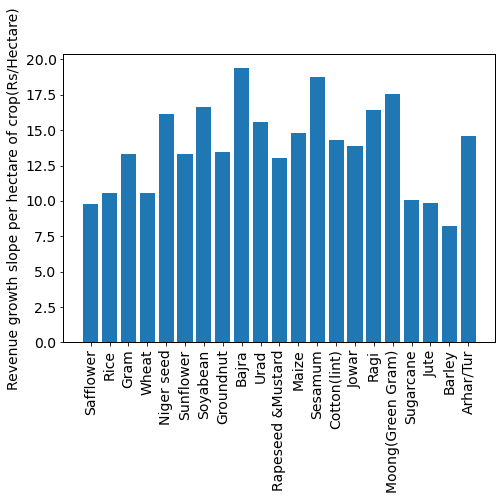

In [ ]:
slope_rev = {}
crops = set(revenue['Crop'].tolist())
for crop in crops:
  df = revenue.loc[revenue['Crop']==crop,:].reset_index()
  st = df.loc[df['Crop_Year']==2002,:].reset_index().loc[0,"Revenue per hectare"]
  fn = df.loc[df['Crop_Year']==2012,:].reset_index().loc[0,"Revenue per hectare"]
  slope_rev[crop] = (math.pow(fn/st,0.1)-1)*100#((fn-st)/st)*100
  print(fn-st)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
crops_l = list(crops)
slopes = [slope_rev[crop] for crop in crops_l]
bars =ax.bar(crops_l,slopes)
plt.xticks(rotation='vertical')
plt.ylabel('Revenue growth slope per hectare of crop(Rs/Hectare)')
plt.show()